In [6]:
# 读取数据
import pandas as pd

# 读取 Excel 
df = pd.read_excel("20250825cpet+blood+basic+计算结果最全.xlsx", sheet_name="Sheet1")

df.tail()

,Unnamed: 0,卧位心室率,峰值心率,峰值功率,峰值氧脉,VE/VCO2斜率.1,静息血压-收缩压,静息血压-舒张压,FVC,VCmax,...,acAge_HR_z,acAge_z,cpAge_z,Age_z,BMI_z,卧位心室率_z,峰值心率_z,FEV1/FVC_z,峰值公斤氧耗_z,acAge_HR_spline_z
2547,2565,69.0,145.0,77.0,6.2,NaN,121.0,85.0,2.07,2.06,...,-0.363675,-0.625186,0.870265,1.188069,0.082535,-0.982590,0.095680,0.531603,-1.026298,-0.367022
2548,2566,63.0,161.0,179.0,12.9,NaN,116.0,86.0,5.72,5.72,...,-1.666614,-1.497883,-1.391216,-0.625082,-1.290244,-1.475644,0.881887,-1.733133,0.746625,-1.657568
2549,2567,90.0,169.0,140.0,9.6,NaN,103.0,69.0,4.27,4.24,...,-0.143113,0.410149,-2.188036,-2.418772,0.823959,0.759274,1.276648,-0.535334,0.768776,-0.638134
2550,2568,79.0,135.0,162.0,14.6,NaN,116.0,73.0,5.21,5.20,...,0.796115,1.013606,-0.580808,-1.141544,0.205745,-0.228133,-0.540595,-0.916369,0.238156,0.730632
2551,2569,68.0,119.0,163.0,16.7,NaN,162.0,98.0,3.92,3.90,...,1.379904,1.156006,1.503625,0.924302,2.601891,-1.085797,-1.415969,-0.916369,-1.017128,1.433107


In [6]:
# 统计CPET变量的基线表格 未划分性别
import pandas as pd
from tableone import TableOne

# 假设 df 是你的数据框
# 你已经把心肺运动变量打包成 cpet_vars
# 另外有 Sex, Age, BMI
# 例如：
# cpet_vars = ['VO2peak', 'FEV1', 'FVC', 'HRmax', ...]
# baseline_vars = ['Sex', 'Age', 'BMI'] + cpet_vars
# 标签分组 这个是根据上面的下血液指标清洗后得到的，直接定义就可以
blood_vars=[ '白细胞[WBC]', '红细胞[RBC]', '血红蛋白(HGB)', '红细胞压积(HCT)', '平均红细胞体积(MCV)', '平均血红蛋白含量(MCH)', '平均血红蛋白浓度(MCHC)', '血小板计数[PLT]',
            '平均血小板体积(MPV)', '血小板分布宽度(PDW)', '血小板容积(PCT)', 'RBC分布宽度CV(RDW-CV)', 'RBC分布宽度SD(RDW-SD)', '中性粒细胞比率(GRAN%)', '中性粒细胞绝对值(GRAN#)', 
            '淋巴细胞百分比(LYMP%)', '淋巴细胞绝对值(LYMP#)', '单核细胞比率(MON%)', '单核细胞数(MON#)', '嗜酸粒比率(EOS%)', '嗜酸性粒细胞数(EOS#)', '嗜碱粒比率(BASO%)', '嗜碱性粒细胞数(BAS#)',
            '幼稚粒细胞(IG%)', '幼稚粒细胞绝对值(IG#)', '尿酸[UA]', '肌酐[Cr]', '尿素[Urea]', '丙氨酸氨基转移酶[ALT]', '天门冬氨酸氨基转移酶[AST]', 'γ-谷氨酰转肽酶[GGT]', '碱性磷酸酶[ALP]',
            '总胆红素[TBIL]', '直接胆红素[DBIL]', '间接胆红素[IBIL]', '总蛋白[TP]', '白蛋白[ALB]', '球蛋白[GLB]', '白球比[A/G]', '葡萄糖[GLU]', '甘油三脂[TG]', '总胆固醇[CHO]', 
            '高密度脂蛋白胆固醇[HDL-C]', '低密度脂蛋白胆固醇[LDL-C]', '总胆汁酸[TBA]', '乳酸脱氢酶[LDH]', '肌酸激酶[CK]', 'α-羟丁酸脱氢酶[HBDH]', '酸碱度(PH)', '比重(SG)']

cpet_vars=['卧位心室率',
       '峰值心率', '峰值功率', '峰值氧脉', 'VE/VCO2斜率.1', '静息血压-收缩压', '静息血压-舒张压', 'FVC',
       'VCmax', 'FEV1', 'FEV1/FVC', 'MVV', '运动中最高收缩压', '运动终止后3分钟收缩压',
       '运动中最高舒张压', '运动终止后3分钟舒张压', '运动终止后1分钟心率', '运动终止后2分钟心率', '运动终止后3分钟心率',
       '峰值氧耗', '峰值公斤氧耗', '峰值分钟通气量', '呼吸商', '每分钟通气量(毫升)', 'load-maxload',
       'VO2-AT', 'VCO2-AT', 'VCO2-Max.Load', 'VCO2/kg-AT', 'VCO2/kg-Max.Load',
       'HR-AT', 'HR-Max.Load', 'BPsys-AT', 'BPsys-Max.Load', 'BPdia_AT',
       'BPdia-Max.Load', 'VE-AT', 'VT-AT', 'f-ergo-AT', 'BR-AT',
       'EQO2-Max.Load', 'EQCO2-Max.Load', 'PETO2-AT', 'PETO2-Max.Load',
       'PETCO2-AT', 'PETCO2-Max.Load', 'MAX BP*HR', 'Threshold Power']

TARGET=['Age']

basic_vars=['Sex', 'Weight', 'Height']

baseline_vars = ['Sex', 'Age', 'BMI'] + cpet_vars

# 分类变量
cat_vars = ['Sex']   # 这里假设 Sex 是分类，其余为连续

# 生成 Table 1（不分组，如果你有疾病标签，可以传入 groupby 参数）
table1 = TableOne(df, columns=baseline_vars, categorical=cat_vars, groupby=None, pval=False)

# 输出表格到终端
print(table1.tabulate(tablefmt="github"))

# 保存为 Excel
table1.to_excel("2025082501_baseline_table.xlsx")
print("✅ 基线表格已保存：baseline_table.xlsx")


|                                  |    | Missing   | Overall          |
|----------------------------------|----|-----------|------------------|
| n                                |    |           | 2552             |
| Sex, n (%)                       | 0  |           | 1084 (42.5)      |
|                                  | 1  |           | 1468 (57.5)      |
| Age, mean (SD)                   |    | 0         | 44.3 (14.2)      |
| BMI, mean (SD)                   |    | 4         | 24.0 (3.7)       |
| 卧位心室率, mean (SD)            |    | 169       | 84.3 (13.8)      |
| 峰值心率, mean (SD)              |    | 7         | 144.7 (22.0)     |
| 峰值功率, mean (SD)              |    | 9         | 107.5 (37.9)     |
| 峰值氧脉, mean (SD)              |    | 9         | 10.2 (3.3)       |
| VE/VCO2斜率.1, mean (SD)         |    | 316       | 26.2 (4.7)       |
| 静息血压-收缩压, mean (SD)       |    | 150       | 123.9 (19.0)     |
| 静息血压-舒张压, mean (SD)       |    | 152       | 80.3 (11.1)      |
| FVC, mean

In [ ]:
老师好，我把这几篇文章都看了，自己总结了一下他们的思路，我的标题应该改成：基于CPET结果构建心肺年龄及其与心血管及代谢疾病关联的研究。
故事主要是验证患病人群与健康人群的心肺年龄差异以及评估衰老人群与正常人群的患病率、血液指标对比，帮助患者识别疾病风险与心血管健康状态

In [111]:
list(df.columns)

['Unnamed: 0',
 '卧位心室率',
 '峰值心率',
 '峰值功率',
 '峰值氧脉',
 'VE/VCO2斜率.1',
 '静息血压-收缩压',
 '静息血压-舒张压',
 'FVC',
 'VCmax',
 'FEV1',
 'FEV1/FVC',
 'MVV',
 '运动中最高收缩压',
 '运动终止后3分钟收缩压',
 '运动中最高舒张压',
 '运动终止后3分钟舒张压',
 '运动终止后1分钟心率',
 '运动终止后2分钟心率',
 '运动终止后3分钟心率',
 '峰值氧耗',
 '峰值公斤氧耗',
 '峰值分钟通气量',
 '呼吸商',
 '每分钟通气量(毫升)',
 'load-maxload',
 'VO2-AT',
 'VCO2-AT',
 'VCO2-Max.Load',
 'VCO2/kg-AT',
 'VCO2/kg-Max.Load',
 'HR-AT',
 'HR-Max.Load',
 'BPsys-AT',
 'BPsys-Max.Load',
 'BPdia_AT',
 'BPdia-Max.Load',
 'VE-AT',
 'VT-AT',
 'f-ergo-AT',
 'BR-AT',
 'EQO2-Max.Load',
 'EQCO2-Max.Load',
 'PETO2-AT',
 'PETO2-Max.Load',
 'PETCO2-AT',
 'PETCO2-Max.Load',
 'MAX BP*HR',
 'Threshold Power',
 'Age',
 'Sex',
 'Weight',
 'Height',
 '白细胞[WBC]',
 '红细胞[RBC]',
 '血红蛋白(HGB)',
 '红细胞压积(HCT)',
 '平均红细胞体积(MCV)',
 '平均血红蛋白含量(MCH)',
 '平均血红蛋白浓度(MCHC)',
 '血小板计数[PLT]',
 '平均血小板体积(MPV)',
 '血小板分布宽度(PDW)',
 '血小板容积(PCT)',
 'RBC分布宽度CV(RDW-CV)',
 'RBC分布宽度SD(RDW-SD)',
 '中性粒细胞比率(GRAN%)',
 '中性粒细胞绝对值(GRAN#)',
 '淋巴细胞百分比(LYMP%)',
 '淋巴细胞绝对值(LYMP#)',
 '单

In [85]:
# 诊断编码
import re
import pandas as pd
import numpy as np
from collections import defaultdict
# ========== 0) 轻量规范化 ==========
# ========= 改进要点 =========
# 1) 罗马数字替换：先长后短，覆盖大小写与全角
# 2) 否定/不确定语境：遇到“否认/未见/无/排除/？”不计入；“疑/待查/考虑/拟”可打标
# 3) 瓣膜上下文：统一用正则判断上下文窗口更稳健
# 4) 正则预编译：症状/手术史/瓣膜上下文/否定不确定词
# 5) 追加保留列：原始/规范化诊断文本，便于追溯

import re

# —— 保存原文与规范化文本 —— 
if '诊断_原文' not in df.columns:
    df['诊断_原文'] = df['诊断']

def normalize_text(s: str) -> str:
    if pd.isna(s): return ''
    s = str(s).strip()
    # 全角→半角
    out = []
    for ch in s:
        oc = ord(ch)
        if oc == 0x3000: oc = 0x20
        elif 0xFF01 <= oc <= 0xFF5E: oc -= 0xFEE0
        out.append(chr(oc))
    s = ''.join(out)
    s = re.sub(r'\s+', '', s)

    # 罗马数字统一（先长后短；含全角/大小写）
    roman_pairs = [
        ('Ⅲ','III'), ('Ⅳ','IV'), ('Ⅱ','II'), ('Ⅰ','I'), ('Ⅴ','V'),
        ('III','III'), ('IV','IV'), ('II','II'), ('I','I'), ('V','V'),
    ]
    for k, v in roman_pairs:
        s = s.replace(k, v)

    # 词形统一
    s = (s.replace('髙血压','高血压')
           .replace('冠脉','冠状动脉')
           .replace('梗塞','梗死')
           .replace('主动肪瓣','主动脉瓣')
           .replace('反流','返流'))  # 两个都能匹配，但统一为“返流”
    return s

df['诊断_规范化'] = df['诊断'].map(normalize_text)

# —— 语境词：否定 & 不确定 —— 
NEG_PAT = re.compile(r'(否认|未见|无(明显)?|排除|exclude)', re.I)
UNCERT_PAT = re.compile(r'(疑|待查|考虑|拟|\?)')

# —— 瓣膜上下文 —— 
VALVE_CTX_PAT = re.compile(r'(二尖|三尖|主动脉|瓣膜)')
# ========== 1) 关键词 → (ICD10, 疾病大类) ==========
ICD_MAP = {
    # —— 循环系统（I00–I99, Q20–Q28）——
    '冠心病': ('I20–I25', '冠心病/缺血性心脏病'),
    '冠状动脉粥样硬化': ('I25', '冠心病/缺血性心脏病'),
    '冠状动脉硬化': ('I25', '冠心病/缺血性心脏病'),
    '冠脉微循环障碍': ('I25', '冠心病/缺血性心脏病'),
    '心绞痛': ('I20', '冠心病/缺血性心脏病'),
    '稳定型心绞痛': ('I20.8', '冠心病/缺血性心脏病'),
    '不稳定型心绞痛': ('I20.0', '冠心病/缺血性心脏病'),
    '心肌梗死': ('I21–I22', '冠心病/缺血性心脏病'),
    '急性非ST段抬高型心肌梗死': ('I21.4', '冠心病/缺血性心脏病'),
    '急性冠脉综合征': ('I24.9', '冠心病/缺血性心脏病'),
    '陈旧性心肌梗死': ('I25.2', '冠心病/缺血性心脏病'),

    '心律失常': ('I44–I49', '心律失常'),
    '房颤': ('I48', '心律失常'),
    '心房颤动': ('I48', '心律失常'),
    '心房纤颤': ('I48', '心律失常'),
    '房扑': ('I48.3', '心律失常'),
    '预激综合征': ('I45.6', '心律失常'),
    '病态窦房结': ('I49.5', '心律失常'),
    '阵发性心房纤颤': ('I48.0', '心律失常'),
    '阵发性室上性心动过速': ('I47.1', '心律失常'),
    '室性早搏': ('I49.3', '心律失常'),
    '频发室性期前收缩': ('I49.3', '心律失常'),
    '频发室早': ('I49.3', '心律失常'),
    '房性早搏': ('I49.1', '心律失常'),
    '频发房早': ('I49.1', '心律失常'),

    '心功能不全': ('I50', '心力衰竭'),
    '心力衰竭': ('I50', '心力衰竭'),

    '瓣膜病': ('I05–I09,I34–I39', '瓣膜病'),
    '二尖瓣': ('I34/I05', '瓣膜病'),
    '主动脉瓣': ('I35/I06', '瓣膜病'),
    '三尖瓣': ('I36/I07', '瓣膜病'),
    # ★“关闭不全/返流/成形术”下方做上下文限定，见匹配逻辑

    '风湿性心脏病': ('I05–I09', '瓣膜病'),

    '扩张性心肌病': ('I42.0', '心肌病'),
    '肥厚性心肌病': ('I42.1', '心肌病'),
    '法洛四联症': ('Q20.4', '先天性心脏病'),
    '房间隔缺损': ('Q21.0', '先天性心脏病'),
    '室间隔缺损': ('Q21.1', '先天性心脏病'),
    '先天性心脏病术后': ('Q24.9/Z95.*', '先天性心脏病'),
    '先心病术后': ('Q24.9/Z95.*', '先天性心脏病'),
    '卵圆孔未闭': ('Q21.1', '先天性心脏病'),

    # —— 代谢性疾病/血压血脂尿酸等 —— 
    '高血压': ('I10–I15', '高血压'),
    '糖尿病': ('E11', '糖尿病'),
    '2型糖尿病': ('E11', '糖尿病'),
    'II型糖尿病': ('E11', '糖尿病'),  # Ⅱ/II 均可，已在规范化处理
    '血糖异常': ('R73', '糖代谢异常/前期'),
    '高脂血症': ('E78.5', '高脂血症'),
    '高血脂症': ('E78.5', '高脂血症'),
    '高尿酸血症': ('E79.0', '高尿酸血症'),
    '代谢综合征': ('E88.*', '代谢综合征'),  # ★ICD版本依赖，不用死写 E88.81
    '高同型半胱氨酸血症': ('E72.1', '高同型半胱氨酸血症'),
    '肥胖': ('E66', '肥胖'),
    '重度肥胖': ('E66.0', '肥胖'),
    '病理性肥胖': ('E66.9', '肥胖'),
    '动脉硬化': ('I70.9', '动脉粥样硬化'),

    # —— 呼吸系统 —— 
    '慢性阻塞性肺病': ('J44', '呼吸系统疾病'),
    '慢性肺源性心脏病': ('I27.9', '呼吸系统疾病'),  # ★ICD修正为 I27.9；分类仍入呼吸系统（可按你策略）
    'II型呼吸衰竭': ('J96.1', '呼吸系统疾病'),

    # —— 消化/肿瘤/血液/甲状腺等 —— 
    '直肠恶性肿瘤': ('C20', '消化道肿瘤'),
    '直肠肿物': ('D12.8', '消化道良性/待定'),
    '胃癌': ('C16', '消化道肿瘤'),
    '胆囊息肉': ('K82.8', '胆囊疾病'),
    '慢性阑尾炎急性发作': ('K36', '阑尾疾病'),
    '甲状腺功能亢进性心脏病': ('E05.8', '甲状腺疾病'),
    '甲状腺功能亢进症': ('E05.9', '甲状腺疾病'),
    '白细胞减少': ('D72.8', '血液系统疾病'),
    '贫血': ('D64.9', '血液系统疾病'),

    # —— 精神/神经 —— 
    '心血管性神经官能症': ('F45.3', '神经官能症'),
    '心脏神经官能症': ('F45.3', '神经官能症'),

    # —— 非心血管疾病 —— 
    '妊娠状态': ('Z33.1', '妊娠相关'),
    '睡眠障碍': ('G47.9', '睡眠障碍'),

    # —— 症状/检查/体检（R/Z 类）——
    '胸痛': ('R07.4', '症状/体征'),
    '胸痛查因': ('R07.4', '症状/体征'),
    '胸闷': ('R07.8', '症状/体征'),
    '胸闷查因': ('R07.8', '症状/体征'),
    '心悸': ('R00.2', '症状/体征'),
    '心悸查因': ('R00.2', '症状/体征'),
    '心悸待查': ('R00.2', '症状/体征'),
    '心动过速': ('R00.0', '症状/体征'),
    '心动过缓': ('R00.1', '症状/体征'),
    '心律不齐': ('R00.8', '症状/体征'),
    '头晕': ('R42', '症状/体征'),
    '头晕查因': ('R42', '症状/体征'),
    '头晕待查': ('R42', '症状/体征'),
    '眩晕': ('R42', '症状/体征'),
    '晕厥查因': ('R55', '症状/体征'),
    '晕厥': ('R55', '症状/体征'),
    '头痛': ('R51', '症状/体征'),
    '呼吸困难': ('R06.0', '症状/体征'),
    '气喘查因': ('R06.2', '症状/体征'),
    '背痛': ('M54.9', '症状/体征'),
    '胸背痛查因': ('M54.9', '症状/体征'),
    '胸段背痛查因': ('M54.9', '症状/体征'),
    '下肢水肿': ('R60.0', '症状/体征'),
    '下肢水肿查因': ('R60.0', '症状/体征'),
    '心电图异常': ('R94.3', '临床检查异常'),
    '心电向量图异常': ('R94.3', '临床检查异常'),
    '右束支传导阻滞': ('I45.0', '心律失常'),

    '健康查体': ('Z00.0', '体检/就诊原因'),
    '体检': ('Z00.0', '体检/就诊原因'),
    '健康检查': ('Z00.0', '体检/就诊原因'),
    '耐力下降': ('R53', '症状/体征'),

    # —— 手术/操作史 ——（不强求具体小码一致）
    'PCI术后': ('Z95.5', '手术/介入史'),
    '支架植入': ('Z95.5', '手术/介入史'),
    'PTCA术后': ('Z95.5', '手术/介入史'),
    'CABG术后': ('Z95.1', '手术/介入史'),  # ★补：搭桥术后（版本依赖，可宽松写 Z95.*）
    '冠状动脉旁路移植术后': ('Z95.1', '手术/介入史'),
    '卵圆孔未闭封堵术后': ('Z98.89', '手术/介入史'),  # ★由 Z95.2 → Z98.89/或 Z95.8x
    '动脉导管未闭封堵术后': ('Z98.89', '手术/介入史'),
    '射频消融术后': ('Z98.89', '手术/介入史'),
    '心脏射频消融术后': ('Z98.89', '手术/介入史'),

    # —— 模糊泛指 —— 
    '心血管疾病': ('I00–I99(泛指)', 'CVD泛指'),
}

MAJOR_CATEGORIES = [
    '冠心病/缺血性心脏病','心律失常','心力衰竭','瓣膜病','心肌病','先天性心脏病',
    '高血压','糖尿病','高脂血症','高尿酸血症','代谢综合征','高同型半胱氨酸血症','肥胖','动脉粥样硬化',
    '呼吸系统疾病','消化道肿瘤','消化道良性/待定','胆囊疾病','阑尾疾病','甲状腺疾病','血液系统疾病','神经官能症','妊娠相关',
    '症状/体征','临床检查异常','体检/就诊原因','手术/介入史','CVD泛指','睡眠障碍'
]

# —— 辅助：在文本中寻找关键词（按降序） —— 
KEYS_SORTED = sorted(ICD_MAP.keys(), key=len, reverse=True)

# —— 初始化列（与你原来保持一致） —— 
for cat in MAJOR_CATEGORIES:
    if cat not in df.columns:
        df[cat] = pd.Series(0, index=df.index, dtype="UInt8")
for col in ['ICD10_命中列表','关键词_命中列表']:
    if col not in df.columns:
        df[col] = pd.Series(pd.NA, index=df.index, dtype="object")
for col in ['高血压等级','诊断缺失','未识别','疑似_标记']:
    if col not in df.columns:
        if col == '高血压等级':
            df[col] = pd.Series(pd.NA, index=df.index, dtype="Int8")
        else:
            df[col] = pd.Series(0, index=df.index, dtype="UInt8")

unmappable_terms = set()

# —— 主循环（逐行，但用已规范化文本、预编译正则） —— 
for i, text in df['诊断_规范化'].items():
    if text == '':
        df.at[i, '诊断缺失'] = 1
        continue

    # 记录命中
    hit_terms, hit_icds = [], []

    # 否定/不确定语境（全局作用）
    is_neg = bool(NEG_PAT.search(text))
    is_unc = bool(UNCERT_PAT.search(text))
    if is_unc:
        df.at[i, '疑似_标记'] = 1

    for kw in KEYS_SORTED:
        if kw not in text:
            continue

        icd, cat = ICD_MAP[kw]

        # 瓣膜上下文保护
        if kw in {'关闭不全','返流','成形术'}:
            if not VALVE_CTX_PAT.search(text):
                continue

        # 否定优先：如“否认房颤/未见心衰证据”，则不计入
        if is_neg and cat in {'心律失常','心力衰竭','冠心病/缺血性心脏病','瓣膜病','心肌病'}:
            continue

        # 命中记录
        hit_terms.append(kw)
        hit_icds.append(icd)
        if cat in df.columns:
            df.at[i, cat] = 1
        else:
            unmappable_terms.add((kw, icd, cat))

    # 高血压分级（先把 III/II/I → 3/2/1，再抓级别；注意先长后短）
    if '高血压' in text:
        t = (text
             .replace('III','3').replace('II','2').replace('I','1')  # 英文罗马
             .replace('Ⅲ','3').replace('Ⅱ','2').replace('Ⅰ','1')  # 全角罗马
             .replace('三','3').replace('二','2').replace('一','1'))
        m = re.search(r'高血压.{0,4}?([123])[级期]?', t)
        if m:
            df.at[i, '高血压等级'] = int(m.group(1))

    if hit_terms:
        # 去重保序
        hit_terms_uniq = list(dict.fromkeys(hit_terms))
        hit_icds_uniq = list(dict.fromkeys(hit_icds))
        df.at[i, '关键词_命中列表'] = ' | '.join(hit_terms_uniq)
        df.at[i, 'ICD10_命中列表'] = ' | '.join(hit_icds_uniq)
    else:
        df.at[i, '未识别'] = 1

# —— 主要疾病汇总 —— 
major_only = [
    '冠心病/缺血性心脏病','心律失常','心力衰竭','瓣膜病','心肌病','先天性心脏病',
    '高血压','糖尿病','高脂血症','高尿酸血症','代谢综合征','高同型半胱氨酸血症',
    '肥胖','动脉粥样硬化','呼吸系统疾病','消化道肿瘤','消化道良性/待定',
    '胆囊疾病','阑尾疾病','甲状腺疾病','血液系统疾病','神经官能症','妊娠相关','睡眠障碍'
]
df['任何主要疾病'] = (df[major_only].fillna(0).sum(axis=1) > 0).astype("UInt8")

# —— 未纳入类别的提醒 —— 
if unmappable_terms:
    print('⚠️ 发现未纳入 MAJOR_CATEGORIES 的映射，请审阅是否新增大类：')
    for kw, icd, cat in sorted(unmappable_terms):
        print(f'  - 关键词: {kw}  → ICD: {icd}  → 分类: {cat}')
else:
    print('✅ 所有关键词均已归入相应大类（含R/Z/手术史）。')


# 准备列（★设置更合适的 dtypes）
for cat in MAJOR_CATEGORIES:
    if cat not in df.columns:
        df[cat] = pd.Series(0, index=df.index, dtype="UInt8")
for col in ['ICD10_命中列表','关键词_命中列表']:
    if col not in df.columns:
        df[col] = pd.Series(pd.NA, index=df.index, dtype="object")
for col in ['高血压等级','诊断缺失','未识别']:
    if col not in df.columns:
        df[col] = pd.Series(pd.NA if col=='高血压等级' else 0, index=df.index, dtype="Int8" if col=='高血压等级' else "UInt8")

unmappable_terms = set()

# ★按关键词长度降序，提高特异性
KEYS_SORTED = sorted(ICD_MAP.keys(), key=len, reverse=True)

# 逐行匹配
for i, raw in df['诊断'].items():
    text = normalize_text(raw)
    if text == '':
        df.at[i, '诊断缺失'] = 1
        continue

    hit_terms, hit_icds = [], []

    for kw in KEYS_SORTED:
        icd, cat = ICD_MAP[kw]
        if kw in text:
            # ★阀膜相关上下文限制：只有同时出现“瓣/二尖/三尖/主动脉/瓣膜”时，才认定这些泛词为瓣膜病
            if kw in {'关闭不全','返流','成形术'}:
                if not re.search(r'二尖|三尖|主动脉|瓣膜', text):
                    continue  # 跳过非瓣膜上下文
            hit_terms.append(kw)
            hit_icds.append(icd)
            if cat in df.columns:
                df.at[i, cat] = 1
            else:
                unmappable_terms.add((kw, icd, cat))

    # 高血压分级：1/2/3（Ⅰ/Ⅱ/Ⅲ、中文一二三都已规范化为 I/II/III，但这里用数字）
    if '高血压' in text:
        t = (text.replace('Ⅰ','1').replace('Ⅱ','2').replace('Ⅲ','3')
                 .replace('I','1').replace('II','2').replace('III','3')
                 .replace('一','1').replace('二','2').replace('三','3'))
        m = re.search(r'高血压.{0,3}?([123])[级期]?', t)
        if m:
            df.at[i, '高血压等级'] = int(m.group(1))

    if hit_terms:
        df.at[i, '关键词_命中列表'] = ' | '.join(dict.fromkeys(hit_terms))  # 去重保持次序
        df.at[i, 'ICD10_命中列表'] = ' | '.join(dict.fromkeys(hit_icds))
    else:
        df.at[i, '未识别'] = 1

# （可选）主要疾病优先：若命中主要疾病，可选择把 R/Z 类不计入“主要疾病”统计（不清零列，仅统计时排除）
major_only = [
    '冠心病/缺血性心脏病','心律失常','心力衰竭','瓣膜病','心肌病','先天性心脏病',
    '高血压','糖尿病','高脂血症','高尿酸血症','代谢综合征','高同型半胱氨酸血症','肥胖','动脉粥样硬化',
    '呼吸系统疾病','消化道肿瘤','消化道良性/待定','胆囊疾病','阑尾疾病','甲状腺疾病','血液系统疾病','神经官能症','妊娠相关','睡眠障碍'
]
df['任何主要疾病'] = (df[major_only].fillna(0).sum(axis=1) > 0).astype("UInt8")

if unmappable_terms:
    print('⚠️ 发现未纳入 MAJOR_CATEGORIES 的映射，请审阅是否新增大类：')
    for kw, icd, cat in sorted(unmappable_terms):
        print(f'  - 关键词: {kw}  → ICD: {icd}  → 分类: {cat}')
else:
    print('✅ 所有关键词均已归入相应大类（含R/Z/手术史）。')

# ===== 症状/体征 · 关键词 → 主标签（去“查因/待查”后再合并同义） =====
import re
import pandas as pd

THRESH = 50   # 频次阈值，可改

# 反向索引：关键词 -> 大类
KW2CAT = {kw: cat for kw, (icd, cat) in ICD_MAP.items()}
SYMPTOM_KWS = {kw for kw, cat in KW2CAT.items() if cat == '症状/体征'}

# 1) 规则：去掉尾缀 & 合并同义
SUFFIX_PAT = re.compile(r'(查因|待查)$')

# 明确同义映射（优先应用）
# - 左边写“去尾缀后”的词形；右边是主标签
SYNONYM_MAP = {
    '眩晕': '头晕',
    '胸背痛': '背痛',
    '胸段背痛': '背痛',
    # 如有新变体，按需继续加
}

def to_canon_symptom(kw: str) -> str:
    """将症状关键词映射到主标签：去尾缀 → 同义合并 → 规则兜底"""
    base = SUFFIX_PAT.sub('', kw)  # 去掉 结尾的“查因/待查”
    # 明确同义
    if base in SYNONYM_MAP:
        base = SYNONYM_MAP[base]
    # 兜底规则（包含式）
    if '背痛' in base:
        return '背痛'
    if base in {'心悸','胸痛','胸闷','头晕','晕厥','下肢水肿','气喘','呼吸困难','心动过速','心动过缓','心律不齐'}:
        return base
    # 没命中就返回去尾缀后的原词
    return base

# 2) 拆“关键词_命中列表”为列表
kw_lists = (
    df['关键词_命中列表']
      .apply(lambda s: [] if pd.isna(s) else [x.strip() for x in re.split(r'\s*\|\s*', str(s)) if x.strip()])
)

# 3) 仅取“症状/体征”的关键词 → 映射到主标签 → 计数
symptom_canon_series = (
    kw_lists
    .explode()
    .dropna()
    .astype(str)
)
symptom_canon_series = symptom_canon_series[symptom_canon_series.isin(SYMPTOM_KWS)]
symptom_canon_series = symptom_canon_series.map(to_canon_symptom)

symptom_counts = symptom_canon_series.value_counts().sort_values(ascending=False)

# 4) 选出高频（≥阈值）的主标签
highfreq_labels = [lab for lab, n in symptom_counts.items() if n >= THRESH]
print(f'“症状/体征”主标签共 {symptom_counts.size} 个；≥{THRESH} 的有 {len(highfreq_labels)} 个：')
print(highfreq_labels)

# 5) 为每个高频主标签新增 0/1 列：症状_<主标签>
canon_lists = kw_lists.apply(
    lambda L: list({to_canon_symptom(x) for x in L if x in SYMPTOM_KWS})
)

for lab in highfreq_labels:
    col = f'症状_{lab}'
    df[col] = canon_lists.apply(lambda L: 1 if lab in L else 0).astype('UInt8')

# 6) 汇总表（含主标签的样本数）
symptom_counts_df = symptom_canon_series.rename('主标签').to_frame() \
    .value_counts().rename('样本数').reset_index()
symptom_counts_df = symptom_counts_df.sort_values('样本数', ascending=False, ignore_index=True)

# 便于查看高频部分
symptom_counts_top = symptom_counts_df[symptom_counts_df['样本数'] >= THRESH].reset_index(drop=True)
print(symptom_counts_top.head(20))
# ===== 补丁：新增分类“糖代谢异常/前期”，并补回已命中的样本 =====

NEW_CAT = '糖代谢异常/前期'

# 1) 把新分类加进 MAJOR_CATEGORIES（若不存在）
if 'MAJOR_CATEGORIES' in globals():
    if NEW_CAT not in MAJOR_CATEGORIES:
        MAJOR_CATEGORIES.append(NEW_CAT)
else:
    MAJOR_CATEGORIES = [NEW_CAT]

# 2) 确保有对应的数据列
if NEW_CAT not in df.columns:
    df[NEW_CAT] = pd.Series(0, index=df.index, dtype='UInt8')

# 3) 根据“关键词_命中列表”补回该标签（无需重跑整段匹配）
import re
kw_lists = df['关键词_命中列表'].apply(
    lambda s: [] if pd.isna(s) else [x.strip() for x in re.split(r'\s*\|\s*', str(s)) if x.strip()]
)
df.loc[kw_lists.apply(lambda L: '血糖异常' in L), NEW_CAT] = 1

# 4) 是否让它计入“任何主要疾病”？默认不计（更像前期/异常）
INCLUDE_PREDIABETES_AS_MAJOR = False

major_only = [
    '冠心病/缺血性心脏病','心律失常','心力衰竭','瓣膜病','心肌病','先天性心脏病',
    '高血压','糖尿病','高脂血症','高尿酸血症','代谢综合征','高同型半胱氨酸血症',
    '肥胖','动脉粥样硬化','呼吸系统疾病','消化道肿瘤','消化道良性/待定','胆囊疾病',
    '阑尾疾病','甲状腺疾病','血液系统疾病','神经官能症','妊娠相关','睡眠障碍'
]
if INCLUDE_PREDIABETES_AS_MAJOR and NEW_CAT not in major_only:
    major_only.append(NEW_CAT)

df['任何主要疾病'] = (df[major_only].fillna(0).sum(axis=1) > 0).astype('UInt8')

print(f"✅ 已新增分类列：{NEW_CAT}；计入“任何主要疾病” = {INCLUDE_PREDIABETES_AS_MAJOR}")


⚠️ 发现未纳入 MAJOR_CATEGORIES 的映射，请审阅是否新增大类：
  - 关键词: 血糖异常  → ICD: R73  → 分类: 糖代谢异常/前期
⚠️ 发现未纳入 MAJOR_CATEGORIES 的映射，请审阅是否新增大类：
  - 关键词: 血糖异常  → ICD: R73  → 分类: 糖代谢异常/前期
“症状/体征”主标签共 14 个；≥50 的有 3 个：
['胸痛', '胸闷', '心悸']
  主标签  样本数
0  胸痛  608
1  胸闷  446
2  心悸  306
✅ 已新增分类列：糖代谢异常/前期；计入“任何主要疾病” = False


In [93]:
df.tail()

,Unnamed: 0,卧位心室率,峰值心率,峰值功率,峰值氧脉,VE/VCO2斜率.1,静息血压-收缩压,静息血压-舒张压,FVC,VCmax,FEV1,FEV1/FVC,MVV,运动中最高收缩压,运动终止后3分钟收缩压,运动中最高舒张压,运动终止后3分钟舒张压,运动终止后1分钟心率,运动终止后2分钟心率,运动终止后3分钟心率,峰值氧耗,峰值公斤氧耗,峰值分钟通气量,呼吸商,每分钟通气量(毫升),load-maxload,VO2-AT,VCO2-AT,VCO2-Max.Load,VCO2/kg-AT,VCO2/kg-Max.Load,HR-AT,HR-Max.Load,BPsys-AT,BPsys-Max.Load,BPdia_AT,BPdia-Max.Load,VE-AT,VT-AT,f-ergo-AT,BR-AT,EQO2-Max.Load,EQCO2-Max.Load,PETO2-AT,PETO2-Max.Load,PETCO2-AT,PETCO2-Max.Load,MAX BP*HR,Threshold Power,Age,Sex,Weight,Height,白细胞[WBC],红细胞[RBC],血红蛋白(HGB),红细胞压积(HCT),平均红细胞体积(MCV),平均血红蛋白含量(MCH),平均血红蛋白浓度(MCHC),血小板计数[PLT],平均血小板体积(MPV),血小板分布宽度(PDW),血小板容积(PCT),RBC分布宽度CV(RDW-CV),RBC分布宽度SD(RDW-SD),中性粒细胞比率(GRAN%),中性粒细胞绝对值(GRAN#),淋巴细胞百分比(LYMP%),淋巴细胞绝对值(LYMP#),单核细胞比率(MON%),单核细胞数(MON#),嗜酸粒比率(EOS%),嗜酸性粒细胞数(EOS#),嗜碱粒比率(BASO%),嗜碱性粒细胞数(BAS#),幼稚粒细胞(IG%),幼稚粒细胞绝对值(IG#),尿酸[UA],肌酐[Cr],尿素[Urea],丙氨酸氨基转移酶[ALT],天门冬氨酸氨基转移酶[AST],γ-谷氨酰转肽酶[GGT],碱性磷酸酶[ALP],总胆红素[TBIL],直接胆红素[DBIL],间接胆红素[IBIL],总蛋白[TP],白蛋白[ALB],球蛋白[GLB],白球比[A/G],葡萄糖[GLU],甘油三脂[TG],总胆固醇[CHO],高密度脂蛋白胆固醇[HDL-C],低密度脂蛋白胆固醇[LDL-C],总胆汁酸[TBA],乳酸脱氢酶[LDH],肌酸激酶[CK],α-羟丁酸脱氢酶[HBDH],酸碱度(PH),比重(SG),BMI,cpAge,acAge,冠心病/缺血性心脏病,心律失常,心力衰竭,瓣膜病,心肌病,先天性心脏病,高血压,糖尿病,高脂血症,高尿酸血症,代谢综合征,高同型半胱氨酸血症,肥胖,动脉粥样硬化,呼吸系统疾病,消化道肿瘤,消化道良性/待定,胆囊疾病,阑尾疾病,甲状腺疾病,血液系统疾病,神经官能症,妊娠相关,症状/体征,临床检查异常,体检/就诊原因,手术/介入史,CVD泛指,睡眠障碍,ICD10_命中列表,关键词_命中列表,高血压等级,诊断缺失,未识别,诊断,任何主要疾病,其他（稀有）,健康人群,Accel_resid,Accel_delta,Accel_z5y,acAge_HR,acAge_HR_spline,acAge_HR_z,acAge_z,cpAge_z,Age_z,BMI_z,卧位心室率_z,峰值心率_z,FEV1/FVC_z,峰值公斤氧耗_z,acAge_HR_spline_z,共病数,Group,诊断_原文,诊断_规范化,疑似_标记,症状_胸痛,症状_胸闷,症状_心悸,糖代谢异常/前期
2547,2565,69.0,145.0,77.0,6.2,NaN,121.0,85.0,2.07,2.06,1.91,92.0,99.0,158.0,123.0,94.0,82.0,115.0,106.0,102.0,0.90,17.0,21.62,0.92,0.83,77.0,0.64,0.50,0.83,9.4,15.7,118.0,145.0,153.0,158.0,90.0,94.0,14.33,0.75,19.0,86.0,23.0,25.0,94.6,99.3,42.0,45.4,22910.0,57.0,61,0,53.0,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.244595,53.328350,-3.548736,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,I25,冠状动脉粥样硬化,NaN,0,0,冠状动脉粥样硬化性心脏病,1,0,0,-3.548736,-7.671650,NaN,-1.319308,-1.691043,-0.363675,-0.625186,0.870265,1.188069,0.082535,-0.982590,0.095680,0.531603,-1.026298,-0.367022,1,Decelerated,冠状动脉粥样硬化性心脏病,冠状动脉粥样硬化性心脏病,0,0,0,0,0
2548,2566,63.0,161.0,179.0,12.9,NaN,116.0,86.0,5.72,5.72,4.24,74.0,178.0,177.0,134.0,77.0,71.0,144.0,130.0,118.0,2.08,31.0,61.06,1.07,2.22,179.0,1.14,1.12,2.22,16.8,33.2,124.0,161.0,142.0,177.0,86.0,77.0,29.98,1.11,27.0,83.0,29.0,27.0,105.4,111.9,44.3,41.1,28497.0,123.0,38,1,67.0,181.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.025,20.451146,31.644451,-8.118662,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,I44–I49 | R00.1,心律失常 | 心动过缓,NaN,0,0,心律失常[窦性心动过缓],1,0,0,-8.118662,-6.355549,NaN,-7.792514,-8.019897,-1.666614,-1.497883,-1.391216,-0.625082,-1.290244,-1.475644,0.881887,-1.733133,0.746625,-1.657568,2,Decelerated,心律失常[窦性心动过缓],心律失常[窦性心动过缓],0,0,0,0,0
2549,2567,90.0,169.0,140.0,9.6,NaN,103.0,69.0,4.27,4.24,3.47,81.0,96.0,160.0,111.0,88.0,66.0,148.0,142.0,136.0,1.62,24.9,50.37,0.97,1.57,140.0,1.03,0.77,1.57,11.9,24.2,131.0,169.0,133.0,160.0,75.0,88.0,30.21,1.16,26.0,69.0,30.0,31.0,110.2,113.9,27.5,33.8,27040.0,86.0,14,0,65.0,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.390625,23.267101,1.362046,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,R07.4,胸痛查因 | 胸痛,NaN,0,0,胸痛查因,0,0,0,1.362046,9.267101,NaN,-0.297838,-2.924586,-0.143113,0.410149,-2.188036,-2.418772,0.823959,0.759274,1.276648,-0.535334,0.768776,-0.638134,1,Decelerated,胸痛查因,胸痛查因,0,1,0,0,0
2550,2568,79.0,135.0,162.0,14.6,NaN,116.0,73.0,5.21,5.20

In [91]:
# 显示工具 全显示
import pandas as pd

# 显示所有列
pd.set_option('display.max_columns', None)

# 显示所有行
pd.set_option('display.max_rows', None)

# 设置每列内容的最大显示宽度，避免内容被截断
pd.set_option('display.max_colwidth', None)

# 设置显示宽度，避免换行
pd.set_option('display.width', None)

In [57]:
# 显示工具 部分显示
# 恢复显示列数为默认
pd.reset_option("display.max_columns")

# 恢复显示行数为默认
pd.reset_option("display.max_rows")

# 恢复最大列宽为默认
pd.reset_option("display.max_colwidth")

# 恢复总显示宽度为默认
pd.reset_option("display.width")


In [ ]:
# ================== 一键修复 + SHAP 出图出表（科研风，含补丁） ==================
# 适用：你已 joblib.load 到 stack_model；或我会按给定路径加载
# 说明：修复 Winsorizer 反序列化属性缺失 → 递归热修模型 → 计算/可视化/导出 SHAP

import os, re, sys, time, warnings, datetime as dt
warnings.filterwarnings("ignore")

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np, pandas as pd
import matplotlib, matplotlib.pyplot as plt

# ---------- 0) 合规且“健壮”的空壳 Winsorizer ----------
class Winsorizer(BaseEstimator, TransformerMixin):
    """
    空壳占位：仅为反序列化与流水线兼容；不做任何截尾处理。
    健壮点：__init__ 显式签名；__setstate__ 补缺省；get_params 兜底。
    """
    def __init__(self, method="iqr", limits=(0.01, 0.01), clip=False, inclusive="both"):
        self.method = method
        self.limits = limits
        self.clip = clip
        self.inclusive = inclusive

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X

    def get_feature_names_out(self, input_features=None):
        return input_features

    # 关键：反序列化后若缺字段，补上默认值
    def __setstate__(self, state):
        self.__dict__.update(state)
        if not hasattr(self, "method"):     self.method = "iqr"
        if not hasattr(self, "limits"):     self.limits = (0.01, 0.01)
        if not hasattr(self, "clip"):       self.clip = False
        if not hasattr(self, "inclusive"):  self.inclusive = "both"

    # 关键：有些旧对象可能没某些属性，get_params 用 getattr 兜底
    def get_params(self, deep=True):
        return {
            "method": getattr(self, "method", "iqr"),
            "limits": getattr(self, "limits", (0.01, 0.01)),
            "clip": getattr(self, "clip", False),
            "inclusive": getattr(self, "inclusive", "both"),
        }

# ---------- 1) 载模（如已存在则复用） ----------
import joblib
MODEL_PATH = r"runs_fast_clean\20250819-205255\final_stacking_model.joblib"
if 'stack_model' not in globals():
    stack_model = joblib.load(MODEL_PATH)

# ---------- 2) 递归热修：为已加载模型里的 Winsorizer 补齐属性 ----------
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import StackingRegressor
from sklearn.base import RegressorMixin, ClassifierMixin

def _patch_wins(obj):
    """若 obj 是 Winsorizer，补齐缺失属性。"""
    if isinstance(obj, Winsorizer):
        if not hasattr(obj, "method"):    obj.method = "iqr"
        if not hasattr(obj, "limits"):    obj.limits = (0.01, 0.01)
        if not hasattr(obj, "clip"):      obj.clip = False
        if not hasattr(obj, "inclusive"): obj.inclusive = "both"

def _walk_and_patch(est):
    _patch_wins(est)
    # Pipeline
    if isinstance(est, Pipeline):
        for name, step in est.steps:
            _walk_and_patch(step)
    # ColumnTransformer
    elif isinstance(est, ColumnTransformer):
        for name, trans, cols in est.transformers:
            if trans is None or trans == "drop": 
                continue
            _walk_and_patch(trans)
    # Stacking
    elif isinstance(est, StackingRegressor):
        for name, base in est.estimators:
            _walk_and_patch(base)
        if hasattr(est, 'final_estimator') and est.final_estimator is not None:
            _walk_and_patch(est.final_estimator)
    # 常见 meta 模型 / 组合器：若有下钻属性，可在此扩展
    else:
        # 尝试 scikit-learn 兼容的 get_params 深度遍历
        try:
            params = est.get_params(deep=False)
            for k,v in list(params.items()):
                _patch_wins(v)
        except Exception:
            pass

_walk_and_patch(stack_model)

# ---------- 3) 取 X，严格对齐特征 ----------
assert 'df' in globals() and isinstance(df, pd.DataFrame), "df 未定义或不是 DataFrame。"
X_input = df.copy()
feats = getattr(stack_model, "feature_names_in_", None)
if feats is not None:
    missing = [c for c in feats if c not in X_input.columns]
    if missing:
        raise RuntimeError(f"当前 df 缺少训练时特征列：{missing[:10]}{'...' if len(missing)>10 else ''}")
    X0 = X_input[feats]
else:
    X0 = X_input.select_dtypes(include=[np.number]).copy()
    if X0.shape[1] == 0:
        raise RuntimeError("未找到可用的数值特征列。")

# ---------- 4) 样式 ----------
def _set_global_style():
    matplotlib.rcParams.update({
        "figure.figsize": (9, 6),
        "axes.titlesize": 14, "axes.labelsize": 12,
        "xtick.labelsize": 10, "ytick.labelsize": 10,
        "legend.fontsize": 10,
        "figure.dpi": 140, "savefig.dpi": 190,
        "axes.spines.top": False, "axes.spines.right": False,
        "axes.grid": True, "grid.alpha": 0.22,
    })
    try:
        plt.rcParams["font.sans-serif"] = ["SimHei","Arial Unicode MS","Noto Sans CJK SC"]
        plt.rcParams["axes.unicode_minus"] = False
    except Exception:
        pass
_set_global_style()

# ---------- 5) 准备 SHAP：取预处理后矩阵 + 终端估计器 ----------
import shap

OUTDIR = "shap_outputs"; os.makedirs(OUTDIR, exist_ok=True)
TARGET_NAME = "cpAge"; TOP_K = 12; BG_MAX = 1000; EVAL_MAX = 8000; RNG = 2025

if X0.shape[0] > EVAL_MAX:
    X_eval = X0.sample(EVAL_MAX, random_state=RNG)
else:
    X_eval = X0

def prepare_model_and_matrix_for_shap(model, X_df):
    if isinstance(model, Pipeline):
        preproc = model[:-1]
        final_est = model[-1]
        try:
            feat_names = preproc.get_feature_names_out()
            X_mat = preproc.transform(X_df)
            return final_est, X_mat, feat_names
        except Exception:
            X_mat = preproc.transform(X_df)
            feat_names = [f"f{i}" for i in range(X_mat.shape[1])]
            return final_est, X_mat, feat_names
    else:
        return model, X_df.values, list(X_df.columns)

model_for_shap, X_mat, feat_names = prepare_model_and_matrix_for_shap(stack_model, X_eval)

def _get_background(Xm, max_bg=BG_MAX, seed=RNG):
    n = Xm.shape[0]
    if n <= max_bg: return Xm
    rng = np.random.default_rng(seed)
    idx = rng.choice(n, size=max_bg, replace=False)
    return Xm[idx]

BG = _get_background(X_mat, BG_MAX)

def build_explainer_and_shap(model_est, X_matrix, background):
    """
    优先 TreeExplainer → LinearExplainer；
    兜底用 PermutationExplainer，但传入的是 model_est.predict（callable），
    而不是模型对象本身，避免 'object is not callable'。
    """
    import shap
    # 1) 树模型
    try:
        exp = shap.TreeExplainer(model_est, data=background, feature_perturbation="interventional")
        ex = exp(X_matrix)
        return exp, ex
    except Exception:
        pass

    # 2) 线性/GLM
    try:
        exp = shap.LinearExplainer(model_est, background)
        ex = exp(X_matrix)
        return exp, ex
    except Exception:
        pass

    # 3) 通用兜底：Permutation（传 predict 作为可调用）
    masker = shap.maskers.Independent(background)

    # 优先用当前 final estimator 的 predict；若不存在，退回到外层 stack_model（全局）
    if hasattr(model_est, "predict"):
        f = lambda Z: model_est.predict(Z)
    else:
        # 极少数情况下 final_est 无 predict（比如自定义封装），
        # 则尝试用外层 stack_model 直接对预处理后的矩阵预测
        assert "stack_model" in globals(), "stack_model 未在全局可见"
        f = lambda Z: stack_model.predict(Z)

    # 注意 algorithm="permutation" 能适配绝大多数黑盒模型
    exp = shap.Explainer(f, masker=masker, algorithm="permutation")
    ex = exp(X_matrix)
    return exp, ex


explainer, shap_exp = build_explainer_and_shap(model_for_shap, X_mat, BG)

# 标准化取值
if hasattr(shap_exp, "values"):
    shap_values = shap_exp.values
else:
    shap_values = np.array(shap_exp)

# 预测（用于 waterfall 代表样本）
try:
    y_pred = stack_model.predict(X_eval)
except Exception:
    try:
        y_pred = model_for_shap.predict(X_mat)
    except Exception:
        y_pred = None

In [159]:
# ---------- 6) 导出 Excel ----------
date_str = dt.datetime.now().strftime("%Y%m%d")
fname_prefix = f"SHAP_{TARGET_NAME}_N{X_eval.shape[0]}_p{len(feat_names)}_{date_str}"
xlsx_path = os.path.join(OUTDIR, f"{fname_prefix}.xlsx")

df_shap = pd.DataFrame(shap_values, columns=feat_names, index=X_eval.index)
df_abs = df_shap.abs()
mean_abs = df_abs.mean().sort_values(ascending=False).to_frame("mean_abs_shap")
mean_signed = df_shap.mean().loc[mean_abs.index].to_frame("mean_signed_shap")
summary_tab = mean_abs.join(mean_signed)
summary_tab["rank"] = range(1, len(summary_tab)+1)

with pd.ExcelWriter(xlsx_path) as w:
    df_shap.to_excel(w, sheet_name="SHAP_per_sample")
    summary_tab.to_excel(w, sheet_name="SHAP_summary")
    X_eval.reset_index().to_excel(w, sheet_name="X_eval", index=False)
    if y_pred is not None:
        pd.DataFrame({"index": X_eval.index, "y_pred": y_pred}).to_excel(w, sheet_name="Pred", index=False)

print(f"[OK] 结果Excel已保存：{xlsx_path}")

# ---------- 7) 作图 ----------
# 7.1 beeswarm
plt.figure(figsize=(9.6, 6.6))
shap.summary_plot(shap_values, features=X_mat, feature_names=feat_names, show=False, max_display=20)
plt.title(f"SHAP Beeswarm（目标：{TARGET_NAME}）"); plt.tight_layout()
png_bee = os.path.join(OUTDIR, f"{fname_prefix}__beeswarm.png")
plt.savefig(png_bee); plt.close(); print(f"[OK] 已保存：{png_bee}")

# 7.2 bar
plt.figure(figsize=(9.0, 6.0))
shap.summary_plot(shap_values, features=X_mat, feature_names=feat_names, plot_type="bar", show=False, max_display=20)
plt.title(f"SHAP 平均绝对贡献 Top 特征（目标：{TARGET_NAME}）"); plt.tight_layout()
png_bar = os.path.join(OUTDIR, f"{fname_prefix}__bar.png")
plt.savefig(png_bar); plt.close(); print(f"[OK] 已保存：{png_bar}")

# 7.3 依赖图（TOP_K）
top_features = list(mean_abs.index[:TOP_K])
for f in top_features:
    if f not in feat_names: 
        continue
    plt.figure(figsize=(7.8, 6.2))
    try:
        shap.dependence_plot(f, shap_values, X_mat, feature_names=feat_names, show=False, interaction_index="auto")
        plt.title(f"SHAP 依赖图：{f} → {TARGET_NAME}"); plt.tight_layout()
        outp = os.path.join(OUTDIR, f"{fname_prefix}__depend__{re.sub(r'[^A-Za-z0-9_\u4e00-\u9fa5]+','_', f)}.png")
        plt.savefig(outp); plt.close(); print(f"[OK] 已保存：{outp}")
    except Exception as e:
        plt.close(); print(f"[WARN] 依赖图失败：{f}，原因：{e}")

# 7.4 waterfall：预测最接近中位数的代表样本
def _safe_waterfall(shap_exp_obj, idx, prefix):
    try:
        if hasattr(shap_exp_obj, "__getitem__"):
            sv1 = shap_exp_obj[idx]
            plt.figure(figsize=(8.6, 7.2))
            shap.plots.waterfall(sv1, show=False, max_display=20)
            plt.title("代表样本贡献（Waterfall）"); plt.tight_layout()
            outp = os.path.join(OUTDIR, f"{prefix}__waterfall_idx{idx}.png")
            plt.savefig(outp); plt.close(); print(f"[OK] 已保存：{outp}")
            return True
    except Exception as e:
        print(f"[WARN] waterfall 绘图失败：{e}")
    return False

if y_pred is not None and hasattr(shap_exp, "values"):
    med = np.median(y_pred)
    ridx = int(np.argmin(np.abs(y_pred - med)))
    _ = _safe_waterfall(shap_exp, ridx, fname_prefix)

# ---------- 8) 控制台摘要 ----------
print("\n===== SHAP 总结 =====")
print(f"- 数据规模：n={X_eval.shape[0]}, p={len(feat_names)}；导出前缀：{fname_prefix}")
print("- Explainer 选择顺序：Tree → Linear → permutation（通用兜底）")
print("- Top10 mean(|SHAP|)：")
print(mean_abs.head(10))
# ================== 结束 ==================

[OK] 结果Excel已保存：fig_shap\SHAP_cpAge_N2552_p40_20250831.xlsx
[OK] 已保存：fig_shap\SHAP_cpAge_N2552_p40_20250831__beeswarm.png
[OK] 已保存：fig_shap\SHAP_cpAge_N2552_p40_20250831__bar.png
[OK] 已保存：fig_shap\SHAP_cpAge_N2552_p40_20250831__depend__sel__FEV1.png
[OK] 已保存：fig_shap\SHAP_cpAge_N2552_p40_20250831__depend__sel__HR_Max_Load.png
[OK] 已保存：fig_shap\SHAP_cpAge_N2552_p40_20250831__depend__sel__Threshold_Power.png
[OK] 已保存：fig_shap\SHAP_cpAge_N2552_p40_20250831__depend__sel__BPsys_Max_Load.png
[OK] 已保存：fig_shap\SHAP_cpAge_N2552_p40_20250831__depend__sel__Sex.png
[OK] 已保存：fig_shap\SHAP_cpAge_N2552_p40_20250831__depend__sel__HR_AT.png
[OK] 已保存：fig_shap\SHAP_cpAge_N2552_p40_20250831__depend__sel__EQCO2_Max_Load.png
[OK] 已保存：fig_shap\SHAP_cpAge_N2552_p40_20250831__depend__sel__PETCO2_AT.png
[OK] 已保存：fig_shap\SHAP_cpAge_N2552_p40_20250831__depend__sel__VE_AT.png
[OK] 已保存：fig_shap\SHAP_cpAge_N2552_p40_20250831__depend__sel__VCO2_Max_Load.png
[OK] 已保存：fig_shap\SHAP_cpAge_N2552_p40_20250831__depend__s

<Figure size 1092x868 with 0 Axes>

<Figure size 1092x868 with 0 Axes>

<Figure size 1092x868 with 0 Axes>

<Figure size 1092x868 with 0 Axes>

<Figure size 1092x868 with 0 Axes>

<Figure size 1092x868 with 0 Axes>

<Figure size 1092x868 with 0 Axes>

<Figure size 1092x868 with 0 Axes>

<Figure size 1092x868 with 0 Axes>

<Figure size 1092x868 with 0 Axes>

<Figure size 1092x868 with 0 Axes>

<Figure size 1092x868 with 0 Axes>

In [161]:
# ===== 续跑补丁：修正 summary_tab 并继续出图（无需重算 explainer） =====
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt, datetime as dt
from PIL import Image
rng = np.random.default_rng(20250831)

# ---- 基本参数（若上一格已定义会沿用；否则给默认） ----
if 'OUTDIR' not in globals(): OUTDIR = 'fig_shap'
if 'TOPK_IMPORTANCE' not in globals(): TOPK_IMPORTANCE = 20
if 'TOPK_DEP' not in globals(): TOPK_DEP = 4
os.makedirs(OUTDIR, exist_ok=True)

# ---- 1) 兜底/修正 summary_tab ----
assert 'df_shap' in globals() and isinstance(df_shap, pd.DataFrame), "缺少 df_shap（DataFrame）"

def _rebuild_summary_from_df(df):
    return pd.DataFrame({
        'mean_abs_SHAP': df.abs().mean(),
        'mean_signed_SHAP': df.mean()
    })

if 'summary_tab' not in globals() or not isinstance(summary_tab, pd.DataFrame) or summary_tab.empty:
    summary_tab = _rebuild_summary_from_df(df_shap)
else:
    st = summary_tab.copy()
    # 统一列名（尽量识别你自定义的名字）
    rename_map = {}
    for c in st.columns:
        cl = str(c).lower()
        if ('abs' in cl and 'shap' in cl and 'mean' in cl) or cl in {'mean_abs','|shap|_mean','mean|shap|'}:
            rename_map[c] = 'mean_abs_SHAP'
        if (('signed' in cl and 'shap' in cl and 'mean' in cl) or cl in {'mean_signed','mean_shap','shap_mean'}):
            rename_map[c] = 'mean_signed_SHAP'
    st = st.rename(columns=rename_map)
    # 仍缺就从 df_shap 重建对应列
    if 'mean_abs_SHAP' not in st.columns:
        st['mean_abs_SHAP'] = df_shap.abs().mean()
    if 'mean_signed_SHAP' not in st.columns:
        st['mean_signed_SHAP'] = df_shap.mean()
    summary_tab = st

# ---- 2) 取 Top-K 特征并画图 ----
topk_feats = summary_tab.sort_values('mean_abs_SHAP', ascending=False).head(TOPK_IMPORTANCE)
top_feats_list = topk_feats.index.tolist()

# 图1：全局重要性
fig1_h = max(4, 0.35*len(topk_feats)+1.5)
fig1, ax1 = plt.subplots(figsize=(7.5, fig1_h))
y = np.arange(len(topk_feats))
ax1.barh(y, topk_feats['mean_abs_SHAP'].values)
ax1.set_yticks(y); ax1.set_yticklabels(topk_feats.index.tolist())
ax1.invert_yaxis()
ax1.set_xlabel('Mean |SHAP|'); ax1.set_title(f'Global importance (Top {len(topk_feats)})')
fig1.tight_layout()
p1 = os.path.join(OUTDIR, f'shap_global_importance_top{len(topk_feats)}.png')
fig1.savefig(p1, dpi=300); plt.close(fig1)
print('[OK] 保存：', p1)

# 图2：Beeswarm
def _plot_beeswarm(df_vals, features, out_png):
    K = len(features)
    fig_h = max(4, 0.4*K + 1.5)
    fig, ax = plt.subplots(figsize=(7.5, fig_h))
    for i, feat in enumerate(features[::-1]):  # 自下而上
        v = pd.to_numeric(df_vals[feat], errors='coerce').dropna().values
        if v.size==0: continue
        jj = rng.normal(0, 0.08, size=v.size)
        ax.scatter(v, np.full(v.shape, i)+jj, s=6, alpha=0.6)
    ax.axvline(0, ls='--', lw=1)
    ax.set_yticks(np.arange(K)); ax.set_yticklabels(features[::-1])
    ax.set_xlabel('SHAP value'); ax.set_title(f'SHAP beeswarm (Top {K})')
    fig.tight_layout(); fig.savefig(out_png, dpi=300); plt.close(fig)

p2 = os.path.join(OUTDIR, f'shap_beeswarm_top{len(top_feats_list)}.png')
_plot_beeswarm(df_shap, top_feats_list, p2)
print('[OK] 保存：', p2)

# 图3：依赖图（若能找到 X）
X_FOR_DEP = None
for cand in ['X', 'X_test', 'X_val', 'X_model', 'X_train', 'df', 'dfX']:
    if cand in globals() and isinstance(globals()[cand], pd.DataFrame):
        _tmp = globals()[cand]
        if set(top_feats_list).issubset(set(_tmp.columns)):
            X_FOR_DEP = _tmp
            break

def _plot_dependence_grid(df_shap, X_feat, feats, out_png):
    r = int(np.ceil(len(feats)/2)); c = 2
    fig = plt.figure(figsize=(7.5, 3.2*r)); gs = fig.add_gridspec(r, c, wspace=0.25, hspace=0.35)
    for k, feat in enumerate(feats):
        ax = fig.add_subplot(gs[k//2, k%2])
        sh = pd.to_numeric(df_shap[feat], errors='coerce')
        xv = pd.to_numeric(X_feat[feat], errors='coerce') if X_feat is not None and feat in X_feat.columns else None
        ok = sh.notna() & (xv.notna() if xv is not None else True)
        if ok.sum()==0: ax.text(0.5,0.5,'NA',ha='center',va='center'); ax.axis('off'); continue
        if xv is not None:
            ax.scatter(xv[ok].values, sh[ok].values, s=6, alpha=0.6); ax.set_xlabel(feat)
        else:
            ax.scatter(np.arange(ok.sum()), sh[ok].values, s=6, alpha=0.6); ax.set_xlabel('samples')
        ax.axhline(0, ls='--', lw=1); ax.set_ylabel('SHAP'); ax.set_title(f'Dependence: {feat}')
    fig.tight_layout(); fig.savefig(out_png, dpi=300); plt.close(fig)

if X_FOR_DEP is not None:
    dep_feats = top_feats_list[:TOPK_DEP]
    p3 = os.path.join(OUTDIR, f'shap_dependence_top{len(dep_feats)}.png')
    _plot_dependence_grid(df_shap, X_FOR_DEP, dep_feats, p3)
    print('[OK] 保存：', p3)
else:
    p3 = None
    print('[WARN] 未找到匹配的特征矩阵（X）；依赖图跳过。')

# 图4：A4 一页多图
def _load_img(path, fallback_text):
    if path and os.path.exists(path):
        return Image.open(path)
    # 占位
    fig, ax = plt.subplots(figsize=(6,3)); ax.text(0.5,0.5,fallback_text,ha='center',va='center',fontsize=16)
    ax.axis('off'); fig.canvas.draw()
    w,h = fig.canvas.get_width_height()
    arr = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8).reshape(h,w,3)
    plt.close(fig); return Image.fromarray(arr)

A4_INCH = (8.27, 11.69)
figM = plt.figure(figsize=A4_INCH)
gs = figM.add_gridspec(3, 1, hspace=0.06)
for ax, letter, path, fallback in [
    (figM.add_subplot(gs[0,0]), 'A', p1, 'Global importance'),
    (figM.add_subplot(gs[1,0]), 'B', p2, 'Beeswarm'),
    (figM.add_subplot(gs[2,0]), 'C', p3, 'Dependence (skipped)'),
]:
    ax.text(0.01,0.99,letter, transform=ax.transAxes, ha='left', va='top', fontsize=13, fontweight='bold')
    ax.imshow(_load_img(path, fallback)); ax.axis('off')

master_png = os.path.join(OUTDIR, f'SHAP_MASTER_{dt.date.today().strftime("%Y%m%d")}.png')
figM.savefig(master_png, dpi=300, bbox_inches='tight')
figM.savefig(master_png.replace('.png','.pdf'), dpi=300, bbox_inches='tight')
plt.close(figM)
print('[OK] 一页多图：', master_png)


[OK] 保存： fig_shap\shap_global_importance_top20.png
[OK] 保存： fig_shap\shap_beeswarm_top20.png
[WARN] 未找到匹配的特征矩阵（X）；依赖图跳过。


MERG NOT subset; don't know how to subset; dropped


[OK] 一页多图： fig_shap\SHAP_MASTER_20250831.png


In [25]:
# 共病人数统计
import pandas as pd

# 你的 df 已经有 "未识别" 这一列（0/1）
# 1) 显示 未识别 == 1 的行
unrecog_rows = df[df["未识别"] == 1]
print("===== 未识别 == 1 的样本 =====")
print(unrecog_rows['诊断'])

# 2) 统计每个疾病人数
disease_cols = [
    "冠心病/缺血性心脏病","心律失常","心力衰竭","瓣膜病","心肌病","先天性心脏病",
    "高血压","糖尿病","高脂血症","高尿酸血症","代谢综合征","高同型半胱氨酸血症",
    "肥胖","动脉粥样硬化","呼吸系统疾病","消化道肿瘤","消化道良性/待定","胆囊疾病",
    "阑尾疾病","甲状腺疾病","血液系统疾病","神经官能症","睡眠障碍"
]

disease_counts = {col: df[col].sum() for col in disease_cols}
disease_sorted = sorted(disease_counts.items(), key=lambda x: x[1])

# 取数量最少的 3 个（可改成5、10）
rare_diseases = [d[0] for d in disease_sorted[:10]]
print("\n===== 数量最少的几个疾病类别 =====")
print(disease_sorted[:10])

# 3) 显示对应的行
rare_rows = df[df[rare_diseases].sum(axis=1) > 0]
print("\n===== 这些稀有疾病对应的行 =====")
print(rare_rows['诊断'])
########################################################
import pandas as pd

# 只挑真正的疾病列（避免未识别、就诊原因这类干扰项）
disease_cols = [
    "冠心病/缺血性心脏病","心律失常","心力衰竭","瓣膜病","心肌病","先天性心脏病",
    "高血压","糖尿病","高脂血症","高尿酸血症","代谢综合征","高同型半胱氨酸血症",
    "肥胖","动脉粥样硬化","呼吸系统疾病","消化道肿瘤","消化道良性/待定","胆囊疾病",
    "阑尾疾病","甲状腺疾病","血液系统疾病","神经官能症","睡眠障碍",'症状/体征'
]

# 计算每个人有多少个疾病标签==1
df["共病数"] = df[disease_cols].sum(axis=1)

# 统计不同共病数的人数
comorbidity_stats = df["共病数"].value_counts().sort_index()

print("===== 共病分布（有多少个疾病的人数） =====")
print(comorbidity_stats)

# 保存到 Excel（可选）
# comorbidity_stats.to_excel("共病分布统计.xlsx")


===== 未识别 == 1 的样本 =====
224        冠脉微循环障碍
583             腹胀
621      频发性室性期前收缩
679      频发性室性期前收缩
1145       急性冠脉综合征
1480        异常子宫出血
1621    心脏介入封堵术后状态
1925    心脏介入封堵术后状态
2177            咳嗽
2401     频发性室性期前收缩
Name: 诊断, dtype: object

===== 数量最少的几个疾病类别 =====
[('消化道良性/待定', 1), ('阑尾疾病', 1), ('消化道肿瘤', 2), ('胆囊疾病', 2), ('甲状腺疾病', 2), ('呼吸系统疾病', 4), ('心肌病', 5), ('代谢综合征', 9), ('血液系统疾病', 9), ('高同型半胱氨酸血症', 10)]

===== 这些稀有疾病对应的行 =====
73                                 冠状动脉粥样硬化性心脏病,高同型半胱氨酸血症
149                                                 代谢综合征
355                                            胸闷查因,白细胞减少
371                            冠状动脉粥样硬化性心脏病,慢性阻塞性肺病,高血压2级
385                                                直肠恶性肿瘤
391                                                 代谢综合征
411                             高血压病2级,多囊卵巢综合征,代谢综合征,高脂血症
512                             冠状动脉粥样硬化性心脏病,慢性阻塞性肺病,心脏扩大
617                                                  胆囊息肉
618                                        

=== 疾病人数&占比（前几项预览） ===
           疾病   人数  占比(%)
0         高血压  454  17.79
1  冠心病/缺血性心脏病  333  13.05
2        高脂血症  184   7.21
3        心律失常  130   5.09
4         糖尿病  103   4.04
5       高尿酸血症   50   1.96
6      先天性心脏病   43   1.68
7       神经官能症   31   1.21
8         瓣膜病   26   1.02
9          肥胖   22   0.86


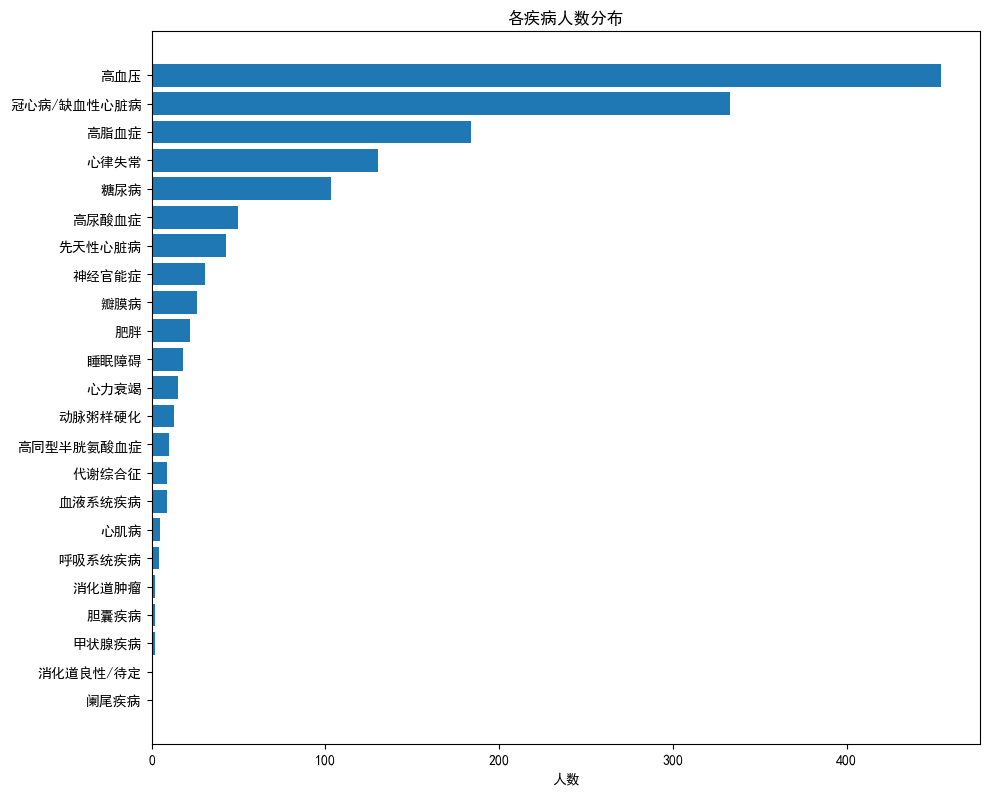

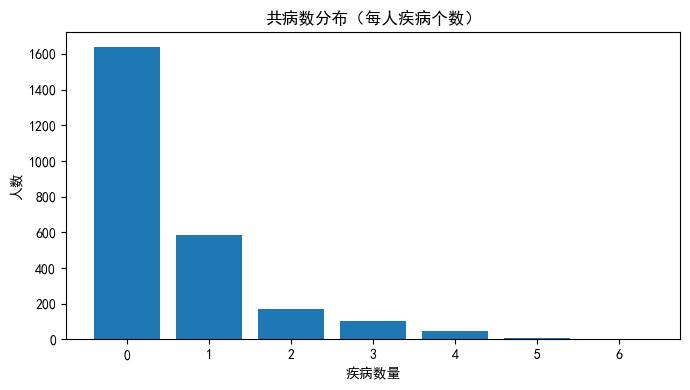

In [6]:
# 各项疾病统计
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===== 字体与显示（避免中文乱码/负号显示）=====
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Heiti TC', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# ========== 选出真正的疾病列（你给的清单）==========
ALL_DISEASE_COLS = [
    "冠心病/缺血性心脏病","心律失常","心力衰竭","瓣膜病","心肌病","先天性心脏病",
    "高血压","糖尿病","高脂血症","高尿酸血症","代谢综合征","高同型半胱氨酸血症",
    "肥胖","动脉粥样硬化","呼吸系统疾病","消化道肿瘤","消化道良性/待定","胆囊疾病",
    "阑尾疾病","甲状腺疾病","血液系统疾病","神经官能症","睡眠障碍"
]

# 1) 只保留 df 里真实存在的列，避免 KeyError
present_cols = [c for c in ALL_DISEASE_COLS if c in df.columns]
missing_cols = [c for c in ALL_DISEASE_COLS if c not in df.columns]
if missing_cols:
    print(f"[警告] 下列列名在 df 中不存在，已自动跳过：{missing_cols}")

if len(present_cols) == 0:
    raise ValueError("在 df 中找不到任何目标疾病列，请检查列名是否一致。")

# 2) 复制出一个只含疾病列的子表，进行二值化清洗（不改动原 df）
X = df[present_cols].copy()

# 2.1 先全部转为数值；非数值→NaN
for c in X.columns:
    X[c] = pd.to_numeric(X[c], errors='coerce')

# 2.2 统计非 0/1 的异常值（排除 NaN），并提示
bad_counts = {}
for c in X.columns:
    mask_non_nan = X[c].notna()
    mask_bad = mask_non_nan & (~X[c].isin([0,1]))
    cnt_bad = int(mask_bad.sum())
    if cnt_bad > 0:
        bad_counts[c] = cnt_bad

if bad_counts:
    print("[提示] 部分“疾病列”包含非 0/1 值，已按 0/1 进行二值化处理（非 0/1 视为缺失→0）。")
    print("  非 0/1 个数（列: 个数）：", bad_counts)

# 2.3 将 NaN 视为 0，并将任何非 0/1 的值安全映射为 0/1（>0 记 1；否则 0）
X = X.fillna(0)
X = (X > 0).astype(int)

# 3) 统计
n_total = len(X)
counts = X.sum(axis=0)                    # 每个疾病人数
props  = (counts / n_total * 100).round(2)  # 占比（%）

disease_stats = (
    pd.DataFrame({"疾病": X.columns, "人数": counts.values, "占比(%)": props.values})
    .sort_values("人数", ascending=False)
    .reset_index(drop=True)
)

print("=== 疾病人数&占比（前几项预览） ===")
print(disease_stats.head(10))

# 4) 可视化 1：疾病人数水平条形图（matplotlib，稳）
if disease_stats["人数"].sum() == 0:
    print("[提示] 所有疾病列的计数均为 0，略过人数分布作图。")
else:
    plt.figure(figsize=(10, max(4, 0.35*len(disease_stats))))
    plt.barh(disease_stats["疾病"], disease_stats["人数"])
    plt.title("各疾病人数分布")
    plt.xlabel("人数")
    plt.ylabel("")
    plt.gca().invert_yaxis()  # 最大值在上
    plt.tight_layout()
    plt.savefig("疾病人数分布.png", dpi=300)
    plt.show()

# 5) 可视化 2：共病数直方图（每人患病个数）
#    注意：这里不在原 df 上写入列，避免链式赋值/副作用
comorbidity_counts = X.sum(axis=1).astype(int)

plt.figure(figsize=(7,4))
# 直方图更稳（类别多时比 countplot 快）
plt.hist(comorbidity_counts, bins=range(int(comorbidity_counts.max())+2), align='left', rwidth=0.8)
plt.title("共病数分布（每人疾病个数）")
plt.xlabel("疾病数量")
plt.ylabel("人数")
plt.xticks(range(int(comorbidity_counts.max())+1))
plt.tight_layout()
plt.savefig("共病分布.png", dpi=300)
plt.show()


In [10]:
# ================== 重叠分组 vs 健康组 · U检验 + Cliffs δ + BH-FDR + 星号 ==================
import numpy as np
import pandas as pd
from math import sqrt
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# ============== 0) 参数区（按需调整） ==============
# 0.1 主要检测指标：按存在自动筛
CAND_Y = ["acAge","cpAge","Age","BMI","卧位心室率","峰值心率","FEV1/FVC","峰值公斤氧耗"]     # 👈 只想看 acAge 就改成 ['acAge']

# 0.2 要比较的疾病分组（重叠分组）：仅保留存在列
DISEASE_GROUPS = ['高血压','冠心病/缺血性心脏病','高脂血症','心律失常','糖尿病',
                  '高尿酸血症','先天性心脏病','神经官能症','瓣膜病','肥胖']

# 0.3 显著性星号依据：'q_BH'（推荐）或 'p_raw'
SIG_BY = 'q_BH'

# 0.4 是否用“健康组残差化 acAge”（强烈建议 True；需要 df 里有 acAge & Age 且健康样本足够）
USE_HEALTH_RESID = True
RESID_COL_NAME   = 'acAge_HR'  # 残差化后的列名

# 0.5 Bootstrap 置信区间（中位数差 & δ），默认关闭；打开会比较慢
DO_BOOTSTRAP   = True
BOOT_B         = 2000
BOOT_CI_LEVEL  = 0.95
RANDOM_STATE   = 2025

# 0.6 多变量线性回归补充（用于“独立关联/交互”验证）
DO_REGRESSION  = True
# 可选协变量候选名（自动按存在取交集）
COVAR_CAND     = ['Age','Sex','BMI','eGFR','Cr','CRP','Smoking','PackYears']
ADD_AGE_INTERACTION = True   # 是否示例性添加 疾病×Age 交互（会迭代所有疾病各加一条）

# ============== 1) 健康 / 缺失 定义（沿用你给的逻辑） ==============
HEALTH_CAND  = [c for c in ["体检/就诊原因","健康查体","健康体检","健康","体检"] if c in df.columns]
MISSING_CAND = [c for c in ["诊断缺失","未识别"] if c in df.columns]
health_mask  = df[HEALTH_CAND].fillna(0).astype(int).any(axis=1) if HEALTH_CAND else pd.Series(False, index=df.index)
missing_mask = df[MISSING_CAND].fillna(0).astype(int).any(axis=1) if MISSING_CAND else pd.Series(False, index=df.index)

if health_mask.sum() < 2:
    raise RuntimeError("健康组样本量过少(<2)。请检查 HEALTH_CAND 定义或数据。")

# 清掉互斥列，避免干扰
if '主组_互斥' in df.columns:
    df = df.drop(columns=['主组_互斥'])

# ============== 2) 准备列：Y 指标、疾病列 ==============
Y_COLS = [c for c in CAND_Y if c in df.columns]
if len(Y_COLS) == 0:
    raise RuntimeError("未找到可用的连续指标列（期望至少有 acAge / cpAge / Age 之一）。")
DISEASE_GROUPS = [c for c in DISEASE_GROUPS if c in df.columns]
if len(DISEASE_GROUPS) == 0:
    raise RuntimeError("给定主组标签在 df.columns 中均不存在。")

# ============== 3) 健康残差化 acAge（可选） ==============
def fit_residual_via_ols(x, y):
    """简易 OLS：y = a + b*x，返回残差"""
    x = np.asarray(x, float); y = np.asarray(y, float)
    m = np.isfinite(x) & np.isfinite(y)
    if m.sum() < 5:  # 健康样本过少
        return None
    x1 = np.c_[np.ones(m.sum()), x[m]]
    beta = np.linalg.lstsq(x1, y[m], rcond=None)[0]  # [a, b]
    y_hat = beta[0] + beta[1]*y.index.to_series().map(lambda i: df.loc[i, 'Age']).values if False else None
    # 我们只需要系数，再统一算残差
    return beta

if USE_HEALTH_RESID and ('acAge' in df.columns) and ('Age' in df.columns):
    xh = pd.to_numeric(df.loc[health_mask,'Age'], errors='coerce')
    yh = pd.to_numeric(df.loc[health_mask,'acAge'], errors='coerce')
    m  = np.isfinite(xh) & np.isfinite(yh)
    if m.sum() >= 30:  # 至少 30 个健康样本更稳一些
        # 拟合健康：acAge ~ Age
        X = np.c_[np.ones(m.sum()), xh[m].values]
        beta = np.linalg.lstsq(X, yh[m].values, rcond=None)[0]  # [a,b]
        # 全体外推残差
        xa = pd.to_numeric(df['Age'], errors='coerce')
        ya = pd.to_numeric(df['acAge'], errors='coerce')
        yhat_all = beta[0] + beta[1]*xa
        df[RESID_COL_NAME] = ya - yhat_all
        # 将残差列加入 Y 列（放在 acAge 后面，便于一起看）
        ins_pos = Y_COLS.index('acAge')+1 if 'acAge' in Y_COLS else len(Y_COLS)
        if RESID_COL_NAME not in df.columns:
            pass
        if RESID_COL_NAME not in Y_COLS:
            Y_COLS.insert(ins_pos, RESID_COL_NAME)
    else:
        print("注意：健康残差化未执行（健康有效样本<30）。")

# ============== 4) 工具函数 ==============
def to_bool_mask(series_like):
    s = pd.Series(series_like).fillna(0)
    try:
        if s.dtype != bool:
            s = s.astype(int) > 0
    except Exception:
        s = s.astype(bool)
    return s

def mw_u_test(x, y):
    x = np.asarray(x, float); x = x[np.isfinite(x)]
    y = np.asarray(y, float); y = y[np.isfinite(y)]
    if x.size < 2 or y.size < 2:
        return np.nan, np.nan
    u, p = mannwhitneyu(x, y, alternative='two-sided', method='auto')
    return float(u), float(p)

def cliffs_delta_from_U(u, nx, ny):
    # SciPy 双侧 U 返回 Umin；恢复 Ux>y = max(Umin, nx*ny - Umin)
    Umin = u
    Uxgy = max(Umin, nx*ny - Umin)
    return float(2.0*Uxgy/(nx*ny) - 1.0)

def calc_cliffs_delta(x, y):
    x = np.asarray(x, float); x = x[np.isfinite(x)]
    y = np.asarray(y, float); y = y[np.isfinite(y)]
    nx, ny = x.size, y.size
    if nx==0 or ny==0: return np.nan
    u, _ = mannwhitneyu(x, y, alternative='two-sided', method='auto')
    return cliffs_delta_from_U(u, nx, ny)

def add_fdr_by_metric(df_long, p_col='p_raw', group_col='指标', out_col='q_BH'):
    df_long = df_long.copy()
    q_all = []
    for metric, sub in df_long.groupby(group_col, sort=False):
        pvals = sub[p_col].values
        if np.isnan(pvals).all() or len(pvals)==0:
            q = np.full_like(pvals, np.nan, dtype=float)
        else:
            mask = np.isfinite(pvals)
            q = np.full_like(pvals, np.nan, dtype=float)
            if mask.sum() > 0:
                _, q_mask, _, _ = multipletests(pvals[mask], alpha=0.05, method='fdr_bh')
                q[mask] = q_mask
        q_all.append(pd.Series(q, index=sub.index))
    df_long[out_col] = pd.concat(q_all).sort_index()
    return df_long

def add_sig_stars(df, p_col='q_BH', out_col='显著性'):
    def _star(p):
        if not np.isfinite(p): return ""
        if p < 0.001: return "***"
        if p < 0.01 : return "**"
        if p < 0.05 : return "*"
        return ""
    df[out_col] = [ _star(p) for p in df[p_col].values ]
    return df

# 可选：Bootstrap 置信区间
rng = np.random.default_rng(RANDOM_STATE)
def bootstrap_ci_stat(x, y, stat_fn, B=2000, ci=0.95):
    x = np.asarray(x, float); x = x[np.isfinite(x)]
    y = np.asarray(y, float); y = y[np.isfinite(y)]
    if x.size < 2 or y.size < 2: return (np.nan, np.nan)
    stats = []
    for _ in range(B):
        xb = rng.choice(x, size=x.size, replace=True)
        yb = rng.choice(y, size=y.size, replace=True)
        stats.append(stat_fn(xb, yb))
    lo = np.quantile(stats, (1-ci)/2)
    hi = np.quantile(stats, 1-(1-ci)/2)
    return float(lo), float(hi)

def stat_median_diff(x, y):
    return float(np.nanmedian(x) - np.nanmedian(y))

def stat_cliffs_delta(x, y):
    u, _ = mannwhitneyu(x, y, alternative='two-sided', method='auto')
    return cliffs_delta_from_U(u, x.size, y.size)

# ============== 5) 逐病种 vs 健康：U检验主表 ==============
rows = []
for grp in DISEASE_GROUPS:
    m_case = to_bool_mask(df[grp])
    n_case = int(m_case.sum())
    n_ctrl = int(health_mask.sum())
    for y in Y_COLS:
        case_vals = pd.to_numeric(df.loc[m_case, y], errors='coerce').values
        ctrl_vals = pd.to_numeric(df.loc[health_mask, y], errors='coerce').values

        med_case = np.nanmedian(case_vals) if np.isfinite(case_vals).any() else np.nan
        med_ctrl = np.nanmedian(ctrl_vals) if np.isfinite(ctrl_vals).any() else np.nan
        diff_med = med_case - med_ctrl if np.all(np.isfinite([med_case, med_ctrl])) else np.nan

        U, p = mw_u_test(case_vals, ctrl_vals)
        delta = calc_cliffs_delta(case_vals, ctrl_vals)

        # 置信区间（可选）
        med_lo=med_hi=delta_lo=delta_hi=np.nan
        if DO_BOOTSTRAP:
            med_lo, med_hi     = bootstrap_ci_stat(case_vals, ctrl_vals, stat_median_diff, B=BOOT_B, ci=BOOT_CI_LEVEL)
            delta_lo, delta_hi = bootstrap_ci_stat(case_vals, ctrl_vals, stat_cliffs_delta, B=BOOT_B, ci=BOOT_CI_LEVEL)

        rows.append({
            '组别': grp, '指标': y,
            'N_病': n_case, 'N_健康': n_ctrl,
            '中位数_病': med_case, '中位数_健康': med_ctrl, '差值(病-健)': diff_med,
            'U': U, 'p_raw': p, 'Cliffs_delta': delta,
            '中位差_CI_low': med_lo, '中位差_CI_high': med_hi,
            'δ_CI_low': delta_lo, 'δ_CI_high': delta_hi
        })

res = pd.DataFrame(rows)
res = add_fdr_by_metric(res, p_col='p_raw', group_col='指标', out_col='q_BH')

# 显著性星号
SIG_BY = 'q_BH' if SIG_BY not in ['q_BH','p_raw'] else SIG_BY
res = add_sig_stars(res, p_col=SIG_BY, out_col='显著性')

# 排序与格式
res = res.sort_values(by=['指标', SIG_BY, 'p_raw', 'Cliffs_delta'],
                      ascending=[True, True, True, False]).reset_index(drop=True)

def fmt_cols(df_in, cols, nd=3):
    df_out = df_in.copy()
    for c in cols:
        if c in df_out.columns:
            df_out[c] = pd.to_numeric(df_out[c], errors='coerce').astype(float).round(nd)
    return df_out

res_pretty = fmt_cols(
    res,
    cols=['中位数_病','中位数_健康','差值(病-健)','U','p_raw','q_BH','Cliffs_delta',
          '中位差_CI_low','中位差_CI_high','δ_CI_low','δ_CI_high'],
    nd=3
)

print("—— U检验（重叠分组 vs 健康）结果 ——")
print(res_pretty.to_string(index=False))
# 可选保存
# res_pretty.to_csv("Utest_overlap_vs_healthy_sig.csv", index=False, encoding='utf-8-sig')

# ============== 6) 多变量回归补充（独立关联 & 交互） ==============
if DO_REGRESSION and ('acAge' in df.columns or RESID_COL_NAME in df.columns):
    import statsmodels.api as sm

    yname = RESID_COL_NAME if (USE_HEALTH_RESID and RESID_COL_NAME in df.columns) else 'acAge'
    y = pd.to_numeric(df[yname], errors='coerce')

    # 疾病哑变量矩阵（重叠分组）
    Xd = df[DISEASE_GROUPS].copy().fillna(0).astype(int).clip(0,1)

    # 协变量
    cov_exist = [c for c in COVAR_CAND if c in df.columns]
    Xcov = pd.DataFrame(index=df.index)
    for c in cov_exist:
        if c == 'Sex':
            # Sex 尝试映射：男/女 -> 1/0；否则尝试直接数值
            s = df['Sex']
            if s.dtype == object:
                Xcov['Sex'] = s.replace({'男':1,'女':0,'M':1,'F':0,'male':1,'female':0}).astype('float')
            else:
                Xcov['Sex'] = pd.to_numeric(s, errors='coerce')
        else:
            Xcov[c] = pd.to_numeric(df[c], errors='coerce')

    Xall = pd.concat([Xd, Xcov], axis=1)
    Xall = sm.add_constant(Xall, has_constant='add')
    m = pd.notna(y) & Xall.notna().all(axis=1)
    y_m = y[m]; X_m = Xall[m]

    # 主效应模型
    model = sm.OLS(y_m, X_m).fit(cov_type='HC3')
    summ = model.summary()
    # 仅提取疾病系数作为主输出
    # coefs = model.params.reindex(['const']+DISEASE_GROUPS, fill_value=np.nan)
    keep_vars = ['const'] + DISEASE_GROUPS + cov_exist
    coefs = model.params.reindex(keep_vars, fill_value=np.nan)
    ses   = model.bse.reindex(keep_vars)
    pvals = model.pvalues.reindex(keep_vars)
    # 这里选择将协变量系数也展示
    ses   = model.bse.reindex(coefs.index)
    pvals = model.pvalues.reindex(coefs.index)
    reg_tab = pd.DataFrame({'term':coefs.index, 'beta':coefs.values, 'se':ses.values, 'p_raw':pvals.values})
    # 对“疾病项”单独做 FDR
    mask_dis = reg_tab['term'].isin(DISEASE_GROUPS)
    q = np.full(reg_tab.shape[0], np.nan, float)
    if mask_dis.sum() > 0:
        _, q_mask, _, _ = multipletests(reg_tab.loc[mask_dis,'p_raw'], method='fdr_bh')
        q[mask_dis] = q_mask
    reg_tab['q_BH'] = q
    reg_tab = add_sig_stars(reg_tab, p_col='q_BH', out_col='显著性')
    reg_tab[['beta','se','p_raw','q_BH']] = reg_tab[['beta','se','p_raw','q_BH']].astype(float).round(4)

    print(f"\n—— 线性回归（因变量：{yname}）主效应：疾病独立关联 ——")
    print(reg_tab.to_string(index=False))

    # 交互：示例性添加每个疾病 × Age（逐个拟合，避免过度共线）
    if ADD_AGE_INTERACTION and ('Age' in Xcov.columns):
        inter_rows = []
        for d in DISEASE_GROUPS:
            Xm = pd.concat([Xd[[d]], Xcov], axis=1)
            # 添加交互
            Xm[f'{d}:Age'] = Xm[d] * Xcov['Age']
            Xm = sm.add_constant(Xm, has_constant='add')
            m2 = pd.notna(y) & Xm.notna().all(axis=1)
            if m2.sum() < 50:  # 太少就跳过
                continue
            fit2 = sm.OLS(y[m2], Xm[m2]).fit(cov_type='HC3')
            if f'{d}:Age' in fit2.params.index:
                inter_rows.append({
                    '交互项': f'{d}×Age',
                    'beta': float(fit2.params[f'{d}:Age']),
                    'se':   float(fit2.bse[f'{d}:Age']),
                    'p_raw':float(fit2.pvalues[f'{d}:Age'])
                })
        if inter_rows:
            inter_df = pd.DataFrame(inter_rows)
            _, qx, _, _ = multipletests(inter_df['p_raw'].values, method='fdr_bh')
            inter_df['q_BH'] = qx
            inter_df = add_sig_stars(inter_df, p_col='q_BH', out_col='显著性')
            inter_df[['beta','se','p_raw','q_BH']] = inter_df[['beta','se','p_raw','q_BH']].astype(float).round(4)
            print("\n—— 交互项检验（疾病×Age 对 acAge_HR/ acAge 的修饰效应）——")
            print(inter_df.sort_values('q_BH').to_string(index=False))
        else:
            print("\n（交互）可用样本不足或缺少 Age 协变量，未输出。")


—— U检验（重叠分组 vs 健康）结果 ——
        组别       指标  N_病  N_健康   中位数_病  中位数_健康  差值(病-健)       U  p_raw  Cliffs_delta  中位差_CI_low  中位差_CI_high  δ_CI_low  δ_CI_high  q_BH 显著性
冠心病/缺血性心脏病      Age  333   138  57.000  46.000   11.000 35249.0  0.000         0.534       7.000       14.000     0.441      0.624 0.000 ***
    先天性心脏病      Age   43   138  33.000  46.000  -13.000  1284.5  0.000         0.567     -18.000       -8.500     0.410      0.704 0.000 ***
       高血压      Age  454   138  53.000  46.000    7.000 41053.5  0.000         0.311       2.000       10.000     0.207      0.409 0.000 ***
      高脂血症      Age  184   138  53.000  46.000    7.000 16870.0  0.000         0.329       2.500       10.000     0.210      0.443 0.000 ***
       糖尿病      Age  103   138  53.000  46.000    7.000  9351.0  0.000         0.316       2.000       12.000     0.172      0.453 0.000 ***
     神经官能症      Age   31   138  34.000  46.000  -12.000  1167.5  0.000         0.454     -16.500       -6.488     0.268      0.633

In [53]:
# ================== acAge_HR 分组 + 正态性检验 + 自适应检验 + FDR + 星号 + 明确带指标名 ==================
import pandas as pd
import numpy as np
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
from statsmodels.stats.multitest import multipletests

# ===== 你需要设置的参数 =====
# df: 已存在的数据框，包含 acAge_HR 以及血液指标列
# blood_vars = ["Hb", "WBC", "CRP", "GLU"]   # ← 换成你实际的指标列名（不中/不增删其余代码）

# ===== 分组：acAge_HR >= 0 为加速，其余为减缓 =====
df = df.copy()
df["Group"] = np.where(df["acAge_HR"] >= 0, "Accelerated", "Decelerated")

def star_from_q(q):
    if q < 0.001: return "***"
    if q < 0.01:  return "**"
    if q < 0.05:  return "*"
    return ""

rows = []
for var in blood_vars:
    g1 = df.loc[df["Group"] == "Accelerated", var].dropna()
    g2 = df.loc[df["Group"] == "Decelerated", var].dropna()
    if len(g1) < 3 or len(g2) < 3:
        # 样本太少，跳过该变量
        continue

    # --- 正态性检验（大样本上限 5000，避免 Shapiro 限制/耗时） ---
    p_norm1 = shapiro(g1.sample(5000, random_state=1))[
        1] if len(g1) > 5000 else shapiro(g1)[1]
    p_norm2 = shapiro(g2.sample(5000, random_state=1))[
        1] if len(g2) > 5000 else shapiro(g2)[1]
    normal = (p_norm1 > 0.05) and (p_norm2 > 0.05)

    # --- 主检验 ---
    if normal:
        stat, pval = ttest_ind(g1, g2, equal_var=False)  # Welch t
        test_used = "t-test"
    else:
        stat, pval = mannwhitneyu(g1, g2, alternative="two-sided")
        test_used = "Mann-Whitney"

    mean1, mean2 = g1.mean(), g2.mean()
    med1,  med2  = g1.median(), g2.median()
    delta_mean   = mean1 - mean2
    delta_median = med1  - med2
    direction = "↑(Accel>Decel)" if delta_median > 0 else "↓(Accel<Decel)" if delta_median < 0 else "="

    rows.append({
        "Variable": var,                 # 👈 明确带上指标名
        "N_Accel": len(g1),
        "N_Decel": len(g2),
        "Test": test_used,
        "p_value": pval,
        "Mean_Accel": mean1,
        "Mean_Decel": mean2,
        "Median_Accel": med1,
        "Median_Decel": med2,
        "Delta_Mean": delta_mean,        # 加速组 - 减缓组
        "Delta_Median": delta_median,
        "Direction": direction
    })

res_df = pd.DataFrame(rows)

# 如果所有变量都被跳过，直接给出提示
if res_df.empty:
    print("无可比较的变量（样本不足或 blood_vars 不存在）。")
else:
    # ===== 多重比较校正（FDR-BH） =====
    _, qvals, _, _ = multipletests(res_df["p_value"], method="fdr_bh")
    res_df["q_value"] = qvals
    res_df["Signif"] = res_df["q_value"].apply(star_from_q)

    # ===== 排序：先按 q_value，再按 |Delta_Median|（便于看强差异） =====
    res_df = res_df.sort_values(["q_value", "Delta_Median"], ascending=[True, False]).reset_index(drop=True)

    # ===== 强制输出列顺序（确保 Variable 一定出现） =====
    cols = ["Variable", "N_Accel", "N_Decel", "Test", "p_value", "q_value", "Signif",
            "Mean_Accel", "Mean_Decel", "Median_Accel", "Median_Decel",
            "Delta_Median", "Direction", "Delta_Mean"]
    res_df = res_df.reindex(columns=cols)

    # 断言，若不在直接报错，避免再次漏列
    assert "Variable" in res_df.columns, "输出缺少 Variable 列"

    display(res_df)
    # res_df.to_csv("acAgeHR_groups_blood_compare.csv", index=False)


,Variable,N_Accel,N_Decel,Test,p_value,q_value,Signif,Mean_Accel,Mean_Decel,Median_Accel,Median_Decel,Delta_Median,Direction,Delta_Mean
0,嗜酸性粒细胞数(EOS#),828,604,Mann-Whitney,0.000011,0.000573,***,0.172475,0.143170,0.130,0.11,0.020,↑(Accel>Decel),0.029305
1,嗜酸粒比率(EOS%),831,603,Mann-Whitney,0.000651,0.012447,*,2.436823,2.131841,1.900,1.60,0.300,↑(Accel>Decel),0.304982
2,单核细胞数(MON#),842,615,Mann-Whitney,0.000996,0.012447,*,0.556357,0.516330,0.520,0.48,0.040,↑(Accel>Decel),0.040027
3,总胆红素[TBIL],581,376,Mann-Whitney,0.000770,0.012447,*,15.156303,16.533266,14.100,15.10,-1.000,↓(Accel<Decel),-1.376963
4,葡萄糖[GLU],569,356,Mann-Whitney,0.001323,0.013226,*,5.982868,5.715787,5.590,5.44,0.150,↑(Accel>Decel),0.267082
5,白蛋白[ALB],624,419,Mann-Whitney,0.002333,0.019442,*,42.796833,43.268516,43.100,44.00,-0.900,↓(Accel<Decel),-0.471682
6,嗜碱性粒细胞数(BAS#),820,599,Mann-Whitney,0.005467,0.039047,*,0.037866,0.034758,0.030,0.03,0.000,=,0.003108
7,乳酸脱氢酶[LDH],500,334,Mann-Whitney,0.009568,0.050773,,166.828420,160.182814,162.000,157.50,4.500,↑(Accel>Decel),6.645606
8,甘油三脂[TG],571,351,Mann-Whitney,0.009272,0.050773,,1.979065,1.795880,1.540,1.35,0.190,↑(Accel>Decel),0.183184
9,间接胆红素[IBIL],403,249,Mann-Whitney,0.010155,0.050773,,10.800861,11.793960,9.800,10.80,-1.000,↓(Accel<Decel),-0.993099


In [67]:
# 在疾病人群内部计算衰老加速组和延缓组的血液指标是否有差异
import pandas as pd
import numpy as np
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
from statsmodels.stats.multitest import multipletests

# ===== 你自己定义 blood_vars =====
# blood_vars = [...]

GROUP_COLS = [
    '冠心病/缺血性心脏病','心律失常','先天性心脏病',
    '高血压','糖尿病','高脂血症','高尿酸血症','Sex'
]

Q_THRESHOLD = 0.05
MIN_PER_ARM = 10   # 每组至少多少例才做检验

def analyze_group(df_all: pd.DataFrame, group_col: str, blood_vars: list) -> pd.DataFrame:
    df = df_all.loc[df_all[group_col] == 1].copy()
    if df.empty:
        print(f"[INFO] {group_col}: 无样本（该列全 0）")
        return pd.DataFrame()

    df["Group"] = np.where(df["acAge"] >= 0, "Accelerated", "Decelerated")
    rows = []
    skipped = []

    for var in blood_vars:
        if var not in df.columns:
            skipped.append(f"{var}: 列不存在")
            continue
        g1 = df.loc[df["Group"] == "Accelerated", var].dropna()
        g2 = df.loc[df["Group"] == "Decelerated", var].dropna()

        if len(g1) < MIN_PER_ARM or len(g2) < MIN_PER_ARM:
            skipped.append(f"{var}: 样本不足 (Accel={len(g1)}, Decel={len(g2)})")
            continue

        # 正态性
        p1 = shapiro(g1.sample(5000, random_state=1))[1] if len(g1) > 5000 else shapiro(g1)[1]
        p2 = shapiro(g2.sample(5000, random_state=1))[1] if len(g2) > 5000 else shapiro(g2)[1]
        normal = (p1 > 0.05) and (p2 > 0.05)

        if normal:
            stat, pval = ttest_ind(g1, g2, equal_var=False)
            test_used = "t-test"
        else:
            stat, pval = mannwhitneyu(g1, g2, alternative="two-sided")
            test_used = "Mann-Whitney"

        mean1, mean2 = g1.mean(), g2.mean()
        med1, med2 = g1.median(), g2.median()
        d_med = med1 - med2
        direction = "↑(Accel>Decel)" if d_med > 0 else "↓(Accel<Decel)" if d_med < 0 else "="

        rows.append({
            "Cohort": group_col,
            "Variable": var,
            "N_Accel": len(g1),
            "N_Decel": len(g2),
            "Test": test_used,
            "p_value": pval,
            "Mean_Accel": mean1, "Mean_Decel": mean2,
            "Median_Accel": med1, "Median_Decel": med2,
            "Delta_Median": d_med, "Direction": direction,
            "Delta_Mean": mean1 - mean2
        })

    if not rows:
        print(f"[INFO] {group_col}: 无可分析变量 → {', '.join(skipped) if skipped else '原因未知'}")
        return pd.DataFrame()

    res = pd.DataFrame(rows)
    # FDR
    _, qvals, _, _ = multipletests(res["p_value"], method="fdr_bh")
    res["q_value"] = qvals

    def stars(q):
        return "***" if q < 0.001 else ("**" if q < 0.01 else ("*" if q < 0.05 else ""))
    res["Signif"] = res["q_value"].apply(stars)

    sig = res.loc[res["q_value"] < Q_THRESHOLD].copy()
    if sig.empty:
        print(f"[INFO] {group_col}: 已分析 {len(res)} 个变量，但无显著结果 (最小 q={res['q_value'].min():.4f})")
    else:
        print(f"\n===== {group_col} · 显著结果(q<{Q_THRESHOLD}) =====")
        print(sig[["Variable","N_Accel","N_Decel","Test","p_value","q_value","Signif",
                   "Median_Accel","Median_Decel","Delta_Median","Direction"]])

    return sig

# ===== 主程序 =====
all_sig = []
for gc in GROUP_COLS:
    sig_tbl = analyze_group(df, gc, blood_vars)
    if not sig_tbl.empty:
        sig_tbl.to_csv(f"acAgeHR_sig_{gc}.csv", index=False, encoding="utf-8-sig")
        all_sig.append(sig_tbl)

if all_sig:
    df_all = pd.concat(all_sig, ignore_index=True)
    df_all.to_csv("acAgeHR_groupwise_significant_all.csv", index=False, encoding="utf-8-sig")


[INFO] 冠心病/缺血性心脏病: 已分析 50 个变量，但无显著结果 (最小 q=0.3299)

===== 心律失常 · 显著结果(q<0.05) =====
   Variable  N_Accel  N_Decel    Test   p_value   q_value Signif  \
24   尿酸[UA]       27       20  t-test  0.001016  0.045704      *   

    Median_Accel  Median_Decel  Delta_Median       Direction  
24         399.2        316.46         82.74  ↑(Accel>Decel)  
[INFO] 先天性心脏病: 无可分析变量 → 白细胞[WBC]: 样本不足 (Accel=7, Decel=8), 红细胞[RBC]: 样本不足 (Accel=12, Decel=8), 血红蛋白(HGB): 样本不足 (Accel=12, Decel=8), 红细胞压积(HCT): 样本不足 (Accel=12, Decel=8), 平均红细胞体积(MCV): 样本不足 (Accel=12, Decel=8), 平均血红蛋白含量(MCH): 样本不足 (Accel=12, Decel=8), 平均血红蛋白浓度(MCHC): 样本不足 (Accel=12, Decel=8), 血小板计数[PLT]: 样本不足 (Accel=12, Decel=8), 平均血小板体积(MPV): 样本不足 (Accel=12, Decel=8), 血小板分布宽度(PDW): 样本不足 (Accel=12, Decel=8), 血小板容积(PCT): 样本不足 (Accel=12, Decel=8), RBC分布宽度CV(RDW-CV): 样本不足 (Accel=12, Decel=8), RBC分布宽度SD(RDW-SD): 样本不足 (Accel=12, Decel=8), 中性粒细胞比率(GRAN%): 样本不足 (Accel=12, Decel=8), 中性粒细胞绝对值(GRAN#): 样本不足 (Accel=12, Decel=8), 淋巴细胞百分比(LYMP%): 样本不足 (Accel=1

In [121]:
# acAge_HR：各患病人群 vs 健康人群 的分布差异 · 统计+可视化（科研口径·美化版）
# 版本：2025-08-30
# 说明：一次性脚本，直接运行。仅修改“参数区”即可。
# 依赖：numpy, pandas, scipy, statsmodels, matplotlib, openpyxl/xlsxwriter（任一）
# ============================================================

import os, math, re, numpy as np, pandas as pd, datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
import statsmodels.api as sm

# ================== 参数区（按需修改） ==================
YCOL                = 'acAge_HR'      # 要比较的指标
OUTDIR              = 'fig_acAgeHR_vs_healthy'
MIN_N_DISEASE       = 30              # 患病组最小样本数
MIN_N_HEALTHY       = 100             # 健康组最小样本数
TOP_K               = 12              # 可视化 Top K（按 q 值或 |Δ中位数| 排序）
SORT_BY             = 'q_BH'          # 'q_BH' 或 'abs_delta_median'
ALPHA_FDR           = 0.05
DO_BOOT_CI          = True            # 是否对 Top K 的 Δ中位数做 bootstrap CI
BOOT_B              = 1000            # 【美化】提升到 1000 次，CI 更稳
RANDOM_SEED         = 20250830

# 协变量校正（可选）：若这些列存在，则回归 acAge_HR ~ group + Age + Sex + BMI（HC3）
DO_ADJUSTED_MODEL   = True
ADJUST_COVARS_CAND  = ['Age','Sex','BMI']

# 主要疾病列（仅从现有列里取交集）
MAJOR_ONLY_CAND = [
    '冠心病/缺血性心脏病','心律失常','先天性心脏病',
    '高血压','糖尿病','高脂血症','高尿酸血症','症状_胸痛','症状_胸闷','症状_心悸'
]

# ================== Matplotlib 全局风格（科研期刊风） ==================
# 【美化】统一字体与负号显示；字号兼顾版式；网格与轴样式统一
def _set_mpl_style():
    # 优先中文字体；若系统无则回退 DejaVu
    font_candidates = ['Microsoft YaHei', 'SimHei', 'PingFang SC', 'Hiragino Sans GB', 'DejaVu Sans']
    for f in font_candidates:
        if f in mpl.font_manager.get_font_names():
            mpl.rcParams['font.sans-serif'] = [f]
            break
    mpl.rcParams['axes.unicode_minus'] = False
    mpl.rcParams['figure.dpi'] = 150
    mpl.rcParams['savefig.dpi'] = 300
    mpl.rcParams['axes.titlesize'] = 12
    mpl.rcParams['axes.labelsize'] = 11
    mpl.rcParams['xtick.labelsize'] = 10
    mpl.rcParams['ytick.labelsize'] = 10
    mpl.rcParams['legend.fontsize'] = 10
    mpl.rcParams['axes.linewidth'] = 1.0
    mpl.rcParams['grid.linestyle'] = '--'
    mpl.rcParams['grid.linewidth'] = 0.6
    mpl.rcParams['grid.alpha'] = 0.6

_set_mpl_style()

# ================== 健康定义（贴合你的口径） ==================
def healthy_mask(df: pd.DataFrame) -> pd.Series:
    has_health_reason = '体检/就诊原因' in df.columns
    has_any_major     = '任何主要疾病' in df.columns
    if has_health_reason and has_any_major:
        m = (pd.to_numeric(df['体检/就诊原因'], errors='coerce').fillna(0).astype(int)==1) & \
            (pd.to_numeric(df['任何主要疾病'], errors='coerce').fillna(0).astype(int)==0)
    elif has_any_major:
        m = (pd.to_numeric(df['任何主要疾病'], errors='coerce').fillna(0).astype(int)==0)
    else:
        majors = [c for c in MAJOR_ONLY_CAND if c in df.columns]
        if len(majors)==0:
            m = pd.Series(False, index=df.index)
        else:
            m = (df[majors].apply(pd.to_numeric, errors='coerce').fillna(0).sum(axis=1)==0)
    return m

# ================== 工具函数 ==================
def iqr(a):
    a = np.asarray(a, dtype=float)
    q1, q3 = np.nanpercentile(a, [25, 75])
    return q1, q3

def stars_from_q(q):
    if pd.isna(q): return ''
    if q < 0.001: return '***'
    if q < 0.01 : return '**'
    if q < 0.05 : return '*'
    return ''

def safe_series_numeric(x):
    """将序列安全转为 float，并剔除 NaN。"""
    return pd.to_numeric(pd.Series(x), errors='coerce').dropna().astype(float)

def cliffs_delta_from_u(U, n1, n2):
    # 与秩二分相关 r_rb 等价：δ = 2U/(n1*n2) - 1
    return (2.0 * U) / (n1 * n2) - 1.0

def bootstrap_ci_delta_median(a, b, B=1000, seed=0):
    """Δ中位数 = median(b) - median(a)；a=healthy, b=disease → 返回 (low, high)"""
    rng = np.random.default_rng(seed)
    a = np.array(a, dtype=float); b = np.array(b, dtype=float)
    na, nb = a.size, b.size
    if na==0 or nb==0:
        return (np.nan, np.nan)
    boots = []
    for _ in range(B):
        sa = a[rng.integers(0, na, na)]
        sb = b[rng.integers(0, nb, nb)]
        boots.append(np.nanmedian(sb) - np.nanmedian(sa))
    return (np.nanpercentile(boots, 2.5), np.nanpercentile(boots, 97.5))

def ensure_dir(p):
    os.makedirs(p, exist_ok=True)

# ================== 数据准备 ==================
assert YCOL in df.columns, f'找不到列：{YCOL}'
df['_Y_'] = pd.to_numeric(df[YCOL], errors='coerce')  # 统一数值化

GROUP_COLS = [c for c in MAJOR_ONLY_CAND if c in df.columns]
assert len(GROUP_COLS)>0, '未找到任何主要疾病列，请确认数据中是否已有二元疾病标签列。'

H_MASK = healthy_mask(df)
H = safe_series_numeric(df.loc[H_MASK, '_Y_'])
assert H.size >= MIN_N_HEALTHY, f'健康组样本过少（{H.size} < {MIN_N_HEALTHY}），请放宽健康定义或降低阈值。'

# ================== 主比较：MWU + Cliff’s δ + BH-FDR ==================
rows = []
for col in GROUP_COLS:
    D_MASK = (pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)==1) & (~H_MASK)
    D = safe_series_numeric(df.loc[D_MASK, '_Y_'])
    if D.size < MIN_N_DISEASE:
        continue

    med_h = float(np.nanmedian(H)) if H.size>0 else np.nan
    med_d = float(np.nanmedian(D)) if D.size>0 else np.nan
    q1h, q3h = iqr(H) if H.size>0 else (np.nan, np.nan)
    q1d, q3d = iqr(D) if D.size>0 else (np.nan, np.nan)
    delta_median = med_d - med_h if (not np.isnan(med_d) and not np.isnan(med_h)) else np.nan

    try:
        if D.size>0 and H.size>0:
            ures = mannwhitneyu(D, H, alternative='two-sided')
            U = float(ures.statistic); p = float(ures.pvalue)
        else:
            U, p = np.nan, np.nan
    except Exception:
        U, p = np.nan, np.nan

    if not (np.isnan(U) or D.size==0 or H.size==0):
        delta = cliffs_delta_from_u(U, D.size, H.size)
        r_rb  = delta
    else:
        delta, r_rb = np.nan, np.nan

    rows.append({
        '分组': col,
        'N_病': int(D.size),
        'N_健': int(H.size),
        '中位数_病': med_d,
        'IQR_病': f'[{q1d:.2f},{q3d:.2f}]' if not np.isnan(q1d) else 'NA',
        '中位数_健': med_h,
        'IQR_健': f'[{q1h:.2f},{q3h:.2f}]' if not np.isnan(q1h) else 'NA',
        'Δ中位数(病-健)': delta_median,
        'U': U,
        'p_raw': p,
        'Cliffs_delta': delta,
        'r_rb': r_rb,
    })

res = pd.DataFrame(rows)
if res.shape[0]==0:
    raise RuntimeError('没有满足样本阈值的分组（请检查 MIN_N_DISEASE/MIN_N_HEALTHY 或标签列）。')

# FDR 与排序列
if res['p_raw'].notna().any():
    ok = res['p_raw'].notna()
    res.loc[ok, 'q_BH'] = multipletests(res.loc[ok, 'p_raw'], method='fdr_bh')[1]
    res['显著性'] = res['q_BH'].map(stars_from_q)
else:
    res['q_BH'] = np.nan
    res['显著性'] = ''
res['abs_delta_median'] = res['Δ中位数(病-健)'].abs()

order_col   = 'q_BH' if SORT_BY=='q_BH' else 'abs_delta_median'
ascending   = True     if SORT_BY=='q_BH' else False
res_sorted  = res.sort_values(order_col, ascending=ascending).reset_index(drop=True)

# ================== 可选：协变量校正（稳健 OLS, HC3） ==================
if DO_ADJUSTED_MODEL:
    covs = [c for c in ADJUST_COVARS_CAND if c in df.columns]
    if 'Sex' in covs:
        if df['Sex'].dtype == object:
            sex_map = {'男':1,'女':0,'M':1,'F':0,'male':1,'female':0,'1':1,'0':0}
            df['_Sex01'] = pd.to_numeric(df['Sex'].map(sex_map).fillna(df['Sex']), errors='coerce')
        else:
            df['_Sex01'] = pd.to_numeric(df['Sex'], errors='coerce')
        covs = [('_Sex01' if c=='Sex' else c) for c in covs]

    betas, ses, pvals, ns = [], [], [], []
    for col in res_sorted['分组']:
        X = pd.DataFrame({'grp': (pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)==1).astype(int)})
        for c in covs:
            X[c] = pd.to_numeric(df[c], errors='coerce')
        X = sm.add_constant(X, has_constant='add')
        y = df['_Y_']
        dd = pd.concat([X, y.rename('y')], axis=1).dropna()
        ns.append(int(dd.shape[0]))
        if dd.shape[0] < (len(X.columns)+10):
            betas.append(np.nan); ses.append(np.nan); pvals.append(np.nan); continue
        try:
            fit = sm.OLS(dd['y'], dd.drop(columns=['y'])).fit(cov_type='HC3')
            betas.append(float(fit.params.get('grp', np.nan)))
            ses.append(float(fit.bse.get('grp', np.nan)))
            pvals.append(float(fit.pvalues.get('grp', np.nan)))
        except Exception:
            betas.append(np.nan); ses.append(np.nan); pvals.append(np.nan)

    res_sorted['N_用于校正'] = ns
    res_sorted['β_adj(HC3)'] = betas
    res_sorted['SE_adj']     = ses
    res_sorted['p_adj']      = pvals
    if res_sorted['p_adj'].notna().any():
        ok2 = res_sorted['p_adj'].notna()
        res_sorted.loc[ok2, 'q_adj_BH'] = multipletests(res_sorted.loc[ok2, 'p_adj'], method='fdr_bh')[1]
        res_sorted['显著性_adj'] = res_sorted['q_adj_BH'].map(stars_from_q)

# ================== Δ中位数 bootstrap CI（Top K） ==================
rng = np.random.default_rng(RANDOM_SEED)
if DO_BOOT_CI and res_sorted.shape[0] > 0:
    res_top = res_sorted.head(TOP_K).copy()
    lows, highs = [], []
    for col in res_top['分组']:
        D_MASK = (pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)==1) & (~H_MASK)
        D = safe_series_numeric(df.loc[D_MASK, '_Y_'])
        low, high = bootstrap_ci_delta_median(H, D, B=BOOT_B, seed=int(rng.integers(1e9)))
        lows.append(low); highs.append(high)
    res_top['Δ中位数_CI_low']  = lows
    res_top['Δ中位数_CI_high'] = highs
else:
    res_top = res_sorted.head(TOP_K).copy()

# ================== 输出：Excel + 速览 ==================
ensure_dir(OUTDIR)
today = dt.date.today().strftime('%Y%m%d')
xlsx_name = f"acAgeHR_vs_healthy__Y-{YCOL}__Top{TOP_K}_{SORT_BY}__Nhealthy{H.size}__{today}.xlsx"
xlsx_path = os.path.join(OUTDIR, xlsx_name)
with pd.ExcelWriter(xlsx_path, engine='openpyxl') as w:
    res_sorted.to_excel(w, sheet_name='all_results', index=False)
    res_top.to_excel(w, sheet_name='top_results', index=False)
print(f'[OK] 结果Excel已保存：{xlsx_path}')

# ================== 可视化（科研标准·轻量美化） ==================
def _format_ax(ax, xgrid=False, ygrid=True):
    """【美化】统一轴与网格样式"""
    if xgrid: ax.xaxis.grid(True)
    if ygrid: ax.yaxis.grid(True)
    for spine in ['top','right']:
        ax.spines[spine].set_visible(False)

# 1) 小提琴+箱线（Top K），带显著性星标与 q 值
def plot_violins(H_vals, df, res_top_df, ycol, out_prefix):
    groups = res_top_df['分组'].tolist()
    K = len(groups)
    fig_h = max(1.8*K + 2.0, 6.0)
    fig, axes = plt.subplots(K, 1, figsize=(8, fig_h), sharex=False)
    if K==1: axes = [axes]

    for ax, g in zip(axes, groups):
        mask_g = (pd.to_numeric(df[g], errors='coerce').fillna(0).astype(int)==1) & (~H_MASK)
        D_vals = safe_series_numeric(df.loc[mask_g, '_Y_']).values
        H_arr  = np.asarray(H_vals, dtype=float)

        data = [H_arr, D_vals]
        # 【美化】小提琴更窄，箱线白面黑框，科研风
        parts = ax.violinplot(data, positions=[1,2], widths=0.8,
                              showmeans=False, showmedians=False, showextrema=False)
        for pc in parts['bodies']:
            pc.set_alpha(0.25)       # 半透明
            pc.set_edgecolor('black')
            pc.set_linewidth(0.6)

        ax.boxplot(data, positions=[1,2], widths=0.25, showfliers=False,
                   boxprops=dict(linewidth=1.0),
                   medianprops=dict(linewidth=1.2),
                   whiskerprops=dict(linewidth=1.0),
                   capprops=dict(linewidth=1.0))

        # 叠加轻微抖动散点（科研期刊常见做法，展示分布离散）
        def _jitter(n, center):
            return center + (np.random.default_rng(123).normal(0, 0.03, size=n))
        ax.scatter(_jitter(len(H_arr), 1), H_arr, s=6, alpha=0.35, edgecolors='none')
        ax.scatter(_jitter(len(D_vals), 2), D_vals, s=6, alpha=0.35, edgecolors='none')

        # y 轴范围与文本位置
        allv = np.concatenate([H_arr, D_vals]) if (H_arr.size>0 and D_vals.size>0) else np.array([0,1])
        ymin, ymax = np.nanpercentile(allv, [2.0, 98.0]) if np.isfinite(allv).all() else (np.nanmin(allv), np.nanmax(allv))
        if not np.isfinite(ymin) or not np.isfinite(ymax) or ymin==ymax:
            ymin, ymax = np.nanmin(allv), np.nanmax(allv)+1
        ax.set_ylim(ymin - 0.02*(ymax-ymin), ymax + 0.15*(ymax-ymin))

        # 样本量
        ax.text(1, ymax + 0.06*(ymax-ymin), f'N={len(H_arr)}', ha='center', va='bottom', fontsize=9)
        ax.text(2, ymax + 0.06*(ymax-ymin), f'N={len(D_vals)}', ha='center', va='bottom', fontsize=9)

        # 显著性星标与 q 值（来自 res_top_df）
        qv   = res_top_df.loc[res_top_df['分组']==g, 'q_BH'].values[0] if 'q_BH' in res_top_df.columns else np.nan
        star = stars_from_q(qv)
        label = f'{g}   {star}  q={qv:.3g}' if pd.notna(qv) else g
        ax.set_ylabel(label)

        ax.set_xticks([1,2]); ax.set_xticklabels(['健康', '患病'])
        _format_ax(ax)

    fig.suptitle(f'{ycol}：患病 vs 健康（Top {K}；小提琴+箱线+散点）', y=0.995)
    fig.tight_layout(rect=[0,0,1,0.98])

    png_path = f'{out_prefix}.png'
    pdf_path = f'{out_prefix}.pdf'
    fig.savefig(png_path)
    fig.savefig(pdf_path)
    plt.close(fig)
    print(f'[OK] 小提琴图已保存：{png_path} / {pdf_path}')

# 2) “森林图”（Top K）：横轴 = Δ中位数（病-健），带 bootstrap 95%CI 端帽
def plot_forest(res_top_df, out_prefix):
    K = res_top_df.shape[0]
    fig_h = max(0.6*K + 1.8, 4.0)
    fig, ax = plt.subplots(1, 1, figsize=(8.6, fig_h))

    y = np.arange(K)
    x  = res_top_df['Δ中位数(病-健)'].values
    labs = res_top_df['分组'].tolist()

    # 误差条（若有CI）
    if {'Δ中位数_CI_low','Δ中位数_CI_high'}.issubset(res_top_df.columns):
        xlow  = res_top_df['Δ中位数_CI_low'].values
        xhigh = res_top_df['Δ中位数_CI_high'].values
        ax.hlines(y, xlow, xhigh, linewidth=1.5)
        # 【美化】端帽
        ax.plot(xlow , y, '|', markersize=10, solid_capstyle='butt')
        ax.plot(xhigh, y, '|', markersize=10, solid_capstyle='butt')

    ax.plot(x, y, 'o', markersize=5)

    # 零线
    ax.axvline(0, ls='--', lw=1, color='0.3')

    # y 轴标签：分组 + 星标 + q
    texts = []
    for i, lab in enumerate(labs):
        qv = res_top_df.iloc[i].get('q_BH', np.nan)
        star = stars_from_q(qv) if pd.notna(qv) else ''
        texts.append(f'{lab}   {star}  q={qv:.3g}' if pd.notna(qv) else f'{lab}')
    ax.set_yticks(y)
    ax.set_yticklabels(texts)

    ax.set_xlabel('Δ中位数 (患病 - 健康)')
    ax.set_title(f'{YCOL}：Δ中位数（Top {K}；bootstrap 95%CI）' if {'Δ中位数_CI_low','Δ中位数_CI_high'}.issubset(res_top_df.columns)
                 else f'{YCOL}：Δ中位数（Top {K}）')

    _format_ax(ax, xgrid=True, ygrid=False)
    fig.tight_layout()

    png_path = f'{out_prefix}.png'
    pdf_path = f'{out_prefix}.pdf'
    fig.savefig(png_path)
    fig.savefig(pdf_path)
    plt.close(fig)
    print(f'[OK] 森林图已保存：{png_path} / {pdf_path}')

# ================== 驱动绘图 ==================
viol_prefix   = os.path.join(OUTDIR, f'violins_top{TOP_K}_{SORT_BY}')
forest_prefix = os.path.join(OUTDIR, f'forest_top{TOP_K}_{SORT_BY}')

plot_violins(H.values, df, res_top, YCOL, viol_prefix)
plot_forest(res_top, forest_prefix)

# ================== 输出摘要（便于快速浏览） ==================
display_cols = ['分组','N_病','N_健','中位数_病','IQR_病','中位数_健','IQR_健',
                'Δ中位数(病-健)','Cliffs_delta','p_raw','q_BH','abs_delta_median']
if DO_ADJUSTED_MODEL:
    display_cols += ['N_用于校正','β_adj(HC3)','SE_adj','p_adj','q_adj_BH','显著性_adj']

print('\n=== 摘要（前20行） ===')
print(res_sorted.sort_values('q_BH', ascending=True, na_position='last').head(20)[display_cols].to_string(index=False))


[OK] 结果Excel已保存：fig_acAgeHR_vs_healthy\acAgeHR_vs_healthy__Y-acAge_HR__Top12_q_BH__Nhealthy134__20250830.xlsx


MERG NOT subset; don't know how to subset; dropped


[OK] 小提琴图已保存：fig_acAgeHR_vs_healthy\violins_top12_q_BH.png / fig_acAgeHR_vs_healthy\violins_top12_q_BH.pdf


MERG NOT subset; don't know how to subset; dropped


[OK] 森林图已保存：fig_acAgeHR_vs_healthy\forest_top12_q_BH.png / fig_acAgeHR_vs_healthy\forest_top12_q_BH.pdf

=== 摘要（前20行） ===
        分组  N_病  N_健     中位数_病        IQR_病     中位数_健        IQR_健  Δ中位数(病-健)  Cliffs_delta        p_raw         q_BH  abs_delta_median  N_用于校正  β_adj(HC3)   SE_adj        p_adj     q_adj_BH 显著性_adj
       高血压  454  134  2.923088 [-0.26,5.83] -0.102981 [-3.35,2.88]   3.026069      0.354297 4.479024e-10 4.479024e-09          3.026069    2548    1.573440 0.257362 9.732667e-10 9.732667e-09     ***
冠心病/缺血性心脏病  333  134  3.005956 [-0.08,5.94] -0.102981 [-3.35,2.88]   3.108937      0.353144 2.340284e-09 1.170142e-08          3.108937    2548    1.379079 0.310211 8.763741e-06 4.381871e-05     ***
      高脂血症  184  134  2.536292 [-0.71,5.77] -0.102981 [-3.35,2.88]   2.639273      0.290639 9.641090e-06 3.213697e-05          2.639273    2548    0.910468 0.391584 2.006702e-02 4.321012e-02       *
     高尿酸血症   50  134  3.005823 [-0.31,6.44] -0.102981 [-3.35,2.88]   3.108804     

In [123]:
# 第二段：相关效度 + 增量效度（acAge_HR 的效用检验·科研口径）
# 版本：2025-08-30
# 说明：一次性脚本，直接运行。仅需在“参数区”设置列名与超参数。
# 依赖：numpy, pandas, scipy, statsmodels, scikit-learn, matplotlib, openpyxl/xlsxwriter（任一）
# 输出：Excel（多Sheet）+ 多张PNG科研风格图（ROC、效应对比）
# ============================================================

import os, math, re, datetime as dt
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

# ================== 参数区（按需修改） ==================
Y_ACAGE        = 'acAge_HR'            # 心肺年龄
COVARS_BASE    = ['Age','Sex','BMI']   # 基线协变量（基准模型）
BLOOD_VARS     = blood_vars            # 连续血液指标列表（外部已定义）
CPET_VARS      = cpet_vars             # CPET 特征列表（外部已定义）
MAJOR_CANDS    = [
    '冠心病/缺血性心脏病','心律失常','先天性心脏病',
    '高血压','糖尿病','高脂血症','高尿酸血症',
    '症状_胸痛','症状_胸闷','症状_心悸'
]                                       # 二元标签：属于=1，否则=0
USE_HEALTHY_DEF = True                  # 是否与“健康组”做二元对照（与前一段保持一致）
MIN_N_POS      = 30                     # 每个疾病模型的最小病例数
MIN_N_NEG      = 100                    # 每个疾病模型的最小对照数
BOOT_B         = 500                    # bootstrap 迭代（ΔAUC/NRI/IDI的置信区间）
RANDOM_SEED    = 20250830
TOPK_ROC       = 8                      # 画 ROC 的疾病TopK（按ΔAUC排序）
OUTDIR         = 'fig_acAgeHR_validity_part2'

# ================== 与第一段一致的“健康”判定（可复用） ==================
def healthy_mask(df: pd.DataFrame, major_cols) -> pd.Series:
    has_health_reason = '体检/就诊原因' in df.columns
    has_any_major     = '任何主要疾病' in df.columns
    if has_health_reason and has_any_major:
        m = (pd.to_numeric(df['体检/就诊原因'], errors='coerce').fillna(0).astype(int)==1) & \
            (pd.to_numeric(df['任何主要疾病'], errors='coerce').fillna(0).astype(int)==0)
    elif has_any_major:
        m = (pd.to_numeric(df['任何主要疾病'], errors='coerce').fillna(0).astype(int)==0)
    else:
        majors = [c for c in major_cols if c in df.columns]
        if len(majors)==0:
            m = pd.Series(False, index=df.index)
        else:
            m = (df[majors].apply(pd.to_numeric, errors='coerce').fillna(0).sum(axis=1)==0)
    return m

# ================== 工具函数 ==================
def ensure_dir(p):
    os.makedirs(p, exist_ok=True)

def to_num(s):
    return pd.to_numeric(s, errors='coerce')

def spearman_table(df, xcol, vars_list, dropna_pairwise=True):
    """Spearman 相关：返回列=变量, 行=[rho, p]"""
    rows = []
    x = to_num(df[xcol])
    for v in vars_list:
        if v not in df.columns: 
            rows.append({'Variable': v, 'rho': np.nan, 'p': np.nan}); continue
        y = to_num(df[v])
        if dropna_pairwise:
            ok = x.notna() & y.notna()
            if ok.sum() < 10:
                rows.append({'Variable': v, 'rho': np.nan, 'p': np.nan}); continue
            r, p = spearmanr(x[ok], y[ok])
        else:
            r, p = spearmanr(x, y, nan_policy='omit')
        rows.append({'Variable': v, 'rho': float(r) if r==r else np.nan, 'p': float(p) if p==p else np.nan})
    res = pd.DataFrame(rows).sort_values('p', na_position='last').reset_index(drop=True)
    return res

def partial_corr(df, x, y, covs):
    """偏相关：残差法（y~covs取残差；x~covs取残差；对残差做Spearman）"""
    # 拟合残差
    cols = [c for c in covs if c in df.columns]
    Xcov = sm.add_constant(pd.concat([to_num(df[c]) for c in cols], axis=1), has_constant='add')
    yv   = to_num(df[y])
    xv   = to_num(df[x])
    dd_y = pd.concat([Xcov, yv.rename('y')], axis=1).dropna()
    dd_x = pd.concat([Xcov, xv.rename('y')], axis=1).dropna()
    if dd_y.shape[0] < len(Xcov.columns)+5 or dd_x.shape[0] < len(Xcov.columns)+5:
        return np.nan, np.nan, 0
    ry = yv.copy()
    rx = xv.copy()
    try:
        fit_y = sm.OLS(dd_y['y'], dd_y.drop(columns=['y'])).fit()
        ry.loc[dd_y.index] = dd_y['y'] - fit_y.fittedvalues
        fit_x = sm.OLS(dd_x['y'], dd_x.drop(columns=['y'])).fit()
        rx.loc[dd_x.index] = dd_x['y'] - fit_x.fittedvalues
    except Exception:
        return np.nan, np.nan, 0
    ok = rx.notna() & ry.notna()
    if ok.sum() < 10: return np.nan, np.nan, int(ok.sum())
    r, p = spearmanr(rx[ok], ry[ok])
    return float(r), float(p), int(ok.sum())

def fit_logistic_auc(df_bin, ycol, xcols):
    """逻辑回归 + AUC；返回拟合器、预测概率、AUC"""
    dd = df_bin[[ycol]+xcols].copy()
    dd = dd.dropna()
    if dd[ycol].nunique() != 2 or dd.shape[0] < 50:
        return None, None, np.nan, dd.shape[0]
    # 逻辑回归：LBFGS，class_weight=None（横断面，不做惩罚）
    try:
        clf = LogisticRegression(max_iter=1000, solver='lbfgs')
        clf.fit(dd[xcols], dd[ycol])
        proba = clf.predict_proba(dd[xcols])[:,1]
        auc = roc_auc_score(dd[ycol], proba)
        return clf, (dd.index, proba), float(auc), dd.shape[0]
    except Exception:
        return None, None, np.nan, dd.shape[0]

def nri_idi(y_true, p_old, p_new):
    """Category-free NRI & IDI"""
    y = np.asarray(y_true).astype(int)
    p1 = np.asarray(p_old)
    p2 = np.asarray(p_new)
    ev  = y==1
    nev = y==0
    # NRI: 向上=概率上升；向下=概率下降
    up_ev   = np.mean((p2[ev] > p1[ev]))   if ev.sum()>0  else np.nan
    down_ev = np.mean((p2[ev] < p1[ev]))   if ev.sum()>0  else np.nan
    up_ne   = np.mean((p2[nev] > p1[nev])) if nev.sum()>0 else np.nan
    down_ne = np.mean((p2[nev] < p1[nev])) if nev.sum()>0 else np.nan
    nri = (up_ev - down_ev) - (up_ne - down_ne)

    # IDI: 事件与非事件的平均预测差的改进
    diff_old = np.mean(p1[ev]) - np.mean(p1[nev]) if (ev.sum()>0 and nev.sum()>0) else np.nan
    diff_new = np.mean(p2[ev]) - np.mean(p2[nev]) if (ev.sum()>0 and nev.sum()>0) else np.nan
    idi = diff_new - diff_old
    return float(nri), float(idi)

def bootstrap_ci_metrics(df_bin, ycol, proba_old, proba_new, B=500, seed=0):
    """对 ΔAUC、NRI、IDI 做 bootstrap CI（同一样本索引抽样）"""
    rng = np.random.default_rng(seed)
    y = df_bin[ycol].values.astype(int)
    p_old = proba_old
    p_new = proba_new
    n = y.size
    auc_old = roc_auc_score(y, p_old)
    auc_new = roc_auc_score(y, p_new)
    delta_auc = auc_new - auc_old
    # 统计 bootstrap
    deltas, nris, idis = [], [], []
    for _ in range(B):
        idx = rng.integers(0, n, n)
        yb = y[idx]; po = p_old[idx]; pn = p_new[idx]
        try:
            auc_o = roc_auc_score(yb, po)
            auc_n = roc_auc_score(yb, pn)
            deltas.append(auc_n - auc_o)
            nri, idi = nri_idi(yb, po, pn)
            nris.append(nri); idis.append(idi)
        except Exception:
            continue
    if len(deltas)==0:
        lo_d, hi_d = (np.nan, np.nan)
        lo_n, hi_n = (np.nan, np.nan)
        lo_i, hi_i = (np.nan, np.nan)
    else:
        lo_d, hi_d = (np.nanpercentile(deltas, 2.5), np.nanpercentile(deltas, 97.5))
        lo_n, hi_n = (np.nanpercentile(nris, 2.5), np.nanpercentile(nris, 97.5))
        lo_i, hi_i = (np.nanpercentile(idis, 2.5), np.nanpercentile(idis, 97.5))
    return float(delta_auc), (lo_d, hi_d), (float(auc_old), float(auc_new)), (lo_n, hi_n), (lo_i, hi_i)

def plot_roc_pair(y, p_old, p_new, title, out_png):
    """科研风格 ROC：Base vs +acAge_HR；不设定特定颜色（简洁风）"""
    fpr_o, tpr_o, _ = roc_curve(y, p_old)
    fpr_n, tpr_n, _ = roc_curve(y, p_new)
    auc_o = roc_auc_score(y, p_old)
    auc_n = roc_auc_score(y, p_new)

    plt.figure(figsize=(5,5))
    plt.plot(fpr_o, tpr_o, lw=2, label=f'Base (AUC={auc_o:.3f})')
    plt.plot(fpr_n, tpr_n, lw=2, label=f'+acAge_HR (AUC={auc_n:.3f})')
    plt.plot([0,1], [0,1], ls='--', lw=1)
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    plt.title(title)
    plt.legend(loc='lower right', frameon=False)
    plt.tight_layout()
    plt.savefig(out_png, dpi=200)
    plt.close()
    print(f'[OK] ROC 已保存：{out_png}')

# ================== 主流程 ==================
assert Y_ACAGE in df.columns, f'找不到列：{Y_ACAGE}'
ensure_dir(OUTDIR)
today = dt.date.today().strftime('%Y%m%d')
xlsx_path = os.path.join(OUTDIR, f'validity_part2__Y-{Y_ACAGE}__TopROC{TOPK_ROC}__{today}.xlsx')

rng = np.random.default_rng(RANDOM_SEED)

# ------ 1) 相关效度：acAge_HR 与血液/CPET 的相关 + 偏相关（控 Age/Sex/BMI）
df['_ac_'] = to_num(df[Y_ACAGE])

blood_in = [v for v in BLOOD_VARS if v in df.columns]
cpet_in  = [v for v in CPET_VARS  if v in df.columns]
covs_in  = [c for c in COVARS_BASE if c in df.columns]

# Spearman
tab_spear_blood = spearman_table(df, '_ac_', blood_in)
tab_spear_cpet  = spearman_table(df, '_ac_', cpet_in)

# Partial Spearman（残差法）
rows_partial = []
for v in blood_in:
    r, p, n = partial_corr(df, '_ac_', v, covs_in)
    rows_partial.append({'Variable': v, 'partial_rho|Age,Sex,BMI': r, 'p_partial': p, 'N_used': n})
tab_partial_blood = pd.DataFrame(rows_partial).sort_values('p_partial', na_position='last').reset_index(drop=True)

# ------ 2) 增量效度：每个疾病标签二分类（病例 vs 健康）→ Base vs +acAge_HR
major_cols = [c for c in MAJOR_CANDS if c in df.columns]
assert len(major_cols)>0, '未找到任何疾病标签列。'

if USE_HEALTHY_DEF:
    H_MASK = healthy_mask(df, major_cols)
else:
    # 不用健康定义则以“该病=1 vs 该病=0”做全体对比（更宽松，但混有共病）
    H_MASK = pd.Series(False, index=df.index)

summary_rows = []
roc_store = []   # 存储画图所需数据
for disease in major_cols:
    y_label = disease
    lab = to_num(df[y_label]).fillna(0).astype(int)

    if USE_HEALTHY_DEF:
        # 只用“该病=1”与“健康组=1”样本
        idx = (lab==1) | (H_MASK==True)
        y = (lab[idx]==1).astype(int).values
    else:
        # 全体：该病=1 vs 该病=0
        idx = lab.notna()
        y = (lab[idx]==1).astype(int).values

    # 组建设计矩阵
    X_base_cols = [c for c in COVARS_BASE if c in df.columns]
    X_base = pd.concat([to_num(df.loc[idx, c]).rename(c) for c in X_base_cols], axis=1)
    # Sex 转 0/1
    if 'Sex' in X_base.columns and (X_base['Sex'].dtype==object):
        sex_map = {'男':1,'女':0,'M':1,'F':0,'male':1,'female':0,'1':1,'0':0}
        X_base['Sex'] = to_num(X_base['Sex'].map(sex_map).fillna(X_base['Sex']))

    X_plus = X_base.copy()
    X_plus['acAge_HR'] = to_num(df.loc[idx, Y_ACAGE])

    # 病/健样本量
    n_pos = int(y.sum()); n_neg = int((1-y).sum())
    if n_pos < MIN_N_POS or n_neg < MIN_N_NEG:
        summary_rows.append({
            '疾病': disease, 'N_pos': n_pos, 'N_neg': n_neg,
            'AUC_base': np.nan, 'AUC_plus': np.nan, 'ΔAUC': np.nan,
            'ΔAUC_CI_low': np.nan, 'ΔAUC_CI_high': np.nan,
            'NRI': np.nan, 'NRI_CI_low': np.nan, 'NRI_CI_high': np.nan,
            'IDI': np.nan, 'IDI_CI_low': np.nan, 'IDI_CI_high': np.nan,
            'N_used': int(X_plus.dropna().shape[0])
        })
        continue

    # 拟合 + 评估
    # Base
    clf_b, proba_b, auc_b, n_used_b = fit_logistic_auc(pd.concat([pd.Series(y, index=X_base.index, name='Y'), X_base], axis=1), 'Y', X_base.columns.tolist())
    # +acAge_HR
    clf_p, proba_p, auc_p, n_used_p = fit_logistic_auc(pd.concat([pd.Series(y, index=X_plus.index, name='Y'), X_plus], axis=1), 'Y', X_plus.columns.tolist())

    if clf_b is None or clf_p is None or (proba_b is None) or (proba_p is None):
        summary_rows.append({
            '疾病': disease, 'N_pos': n_pos, 'N_neg': n_neg,
            'AUC_base': np.nan, 'AUC_plus': np.nan, 'ΔAUC': np.nan,
            'ΔAUC_CI_low': np.nan, 'ΔAUC_CI_high': np.nan,
            'NRI': np.nan, 'NRI_CI_low': np.nan, 'NRI_CI_high': np.nan,
            'IDI': np.nan, 'IDI_CI_low': np.nan, 'IDI_CI_high': np.nan,
            'N_used': min(n_used_b, n_used_p)
        })
        continue

    # 对齐索引
    idx_b, pb = proba_b
    idx_p, pp = proba_p
    # 只在交集上比较
    common_idx = np.intersect1d(idx_b, idx_p)
    y_common  = (pd.Series(y, index=X_base.index).loc[common_idx]).values
    pb_common = pd.Series(pb, index=idx_b).loc[common_idx].values
    pp_common = pd.Series(pp, index=idx_p).loc[common_idx].values

    # Bootstrap 置信区间
    delta_auc, (lo_d, hi_d), (auc_old, auc_new), (lo_nri, hi_nri), (lo_idi, hi_idi) = \
        bootstrap_ci_metrics(pd.DataFrame({'Y': y_common}), 'Y', pb_common, pp_common, B=BOOT_B, seed=int(rng.integers(1e9)))

    summary_rows.append({
        '疾病': disease, 'N_pos': n_pos, 'N_neg': n_neg,
        'AUC_base': auc_old, 'AUC_plus': auc_new, 'ΔAUC': delta_auc,
        'ΔAUC_CI_low': lo_d, 'ΔAUC_CI_high': hi_d,
        'NRI': nri_idi(y_common, pb_common, pp_common)[0], 'NRI_CI_low': lo_nri, 'NRI_CI_high': hi_nri,
        'IDI': nri_idi(y_common, pb_common, pp_common)[1], 'IDI_CI_low': lo_idi, 'IDI_CI_high': hi_idi,
        'N_used': int(len(common_idx))
    })

    roc_store.append({
        '疾病': disease,
        'y': y_common,
        'p_old': pb_common,
        'p_new': pp_common,
        'AUC_base': auc_old,
        'AUC_plus': auc_new,
        'ΔAUC': delta_auc
    })

summary = pd.DataFrame(summary_rows).sort_values('ΔAUC', ascending=False, na_position='last').reset_index(drop=True)

# ------ 3) 导出 Excel（多Sheet）
with pd.ExcelWriter(xlsx_path, engine='openpyxl') as w:
    tab_spear_blood.to_excel(w, sheet_name='Spearman_blood', index=False)
    tab_spear_cpet.to_excel(w,  sheet_name='Spearman_cpet',  index=False)
    tab_partial_blood.to_excel(w, sheet_name='PartialCorr_blood', index=False)
    summary.to_excel(w, sheet_name='Incremental_AUC_NRI_IDI', index=False)
print(f'[OK] 结果Excel已保存：{xlsx_path}')

# ------ 4) 可视化（科研标准·简洁风）
# 4.1 ROC：选 ΔAUC TopK 的疾病绘制 Base vs +acAge_HR
top_for_plot = [r for r in roc_store if not np.isnan(r['ΔAUC'])]
top_for_plot = sorted(top_for_plot, key=lambda d: d['ΔAUC'], reverse=True)[:TOPK_ROC]

for item in top_for_plot:
    disease = item['疾病']
    title = f'{disease}：Base vs +acAge_HR'
    out_png = os.path.join(OUTDIR, f'ROC_{disease.replace("/", "_")}.png')
    plot_roc_pair(item['y'], item['p_old'], item['p_new'], title, out_png)

# 4.2 ΔAUC 森林图（含95%CI）
def plot_delta_auc_forest(df_sum, out_png, topk=20):
    dd = df_sum.dropna(subset=['ΔAUC']).head(topk).copy()
    K = dd.shape[0]
    if K==0: return
    y = np.arange(K)
    x = dd['ΔAUC'].values
    lo = dd['ΔAUC_CI_low'].values
    hi = dd['ΔAUC_CI_high'].values
    labs = dd['疾病'].tolist()

    plt.figure(figsize=(8, max(0.6*K + 1.5, 4.0)))
    # 误差条
    for i in range(K):
        if not (np.isnan(lo[i]) or np.isnan(hi[i])):
            plt.hlines(y[i], lo[i], hi[i])
    plt.plot(x, y, 'o')
    plt.axvline(0, ls='--', lw=1)
    plt.yticks(y, [f'{labs[i]} (ΔAUC={x[i]:.3f})' for i in range(K)])
    plt.xlabel('ΔAUC  (+acAge_HR  vs  Base)')
    plt.title('增量效度：ΔAUC（前{}项；误差条为bootstrap 95%CI）'.format(K))
    plt.tight_layout()
    plt.savefig(out_png, dpi=200)
    plt.close()
    print(f'[OK] ΔAUC 森林图已保存：{out_png}')

plot_delta_auc_forest(summary, os.path.join(OUTDIR, f'forest_deltaAUC_top{min(20, summary.shape[0])}.png'), topk=min(20, summary.shape[0]))

# 4.3 NRI/IDI 条形图（可选）
def plot_bar_metric(df_sum, metric, out_png, topk=20):
    dd = df_sum.dropna(subset=[metric]).head(topk).copy()
    K = dd.shape[0]
    if K==0: return
    y = np.arange(K)
    x = dd[metric].values
    plt.figure(figsize=(8, max(0.6*K+1.5, 4.0)))
    plt.hlines(y, 0, x)
    plt.plot(x, y, 'o')
    plt.axvline(0, ls='--', lw=1)
    plt.yticks(y, [f"{dd.iloc[i]['疾病']} ({metric}={x[i]:.3f})" for i in range(K)])
    plt.xlabel(metric)
    plt.title(f'增量效度：{metric}（前{K}项）')
    plt.tight_layout()
    plt.savefig(out_png, dpi=200)
    plt.close()
    print(f'[OK] {metric} 图已保存：{out_png}')

plot_bar_metric(summary, 'NRI', os.path.join(OUTDIR, f'bar_NRI_top{min(20, summary.shape[0])}.png'), topk=min(20, summary.shape[0]))
plot_bar_metric(summary, 'IDI', os.path.join(OUTDIR, f'bar_IDI_top{min(20, summary.shape[0])}.png'), topk=min(20, summary.shape[0]))

# ------ 5) 终端摘要
print('\n=== 相关效度（Spearman·blood 前15项） ===')
print(tab_spear_blood.head(15).to_string(index=False))
print('\n=== 偏相关（控Age/Sex/BMI·blood 前15项） ===')
print(tab_partial_blood.head(15).to_string(index=False))
print('\n=== 增量效度 ΔAUC（前15项） ===')
cols_disp = ['疾病','N_pos','N_neg','AUC_base','AUC_plus','ΔAUC','ΔAUC_CI_low','ΔAUC_CI_high','NRI','IDI','N_used']
print(summary.head(15)[cols_disp].to_string(index=False))


[OK] 结果Excel已保存：fig_acAgeHR_validity_part2\validity_part2__Y-acAge_HR__TopROC8__20250830.xlsx
[OK] ROC 已保存：fig_acAgeHR_validity_part2\ROC_高尿酸血症.png
[OK] ROC 已保存：fig_acAgeHR_validity_part2\ROC_高血压.png
[OK] ROC 已保存：fig_acAgeHR_validity_part2\ROC_心律失常.png
[OK] ROC 已保存：fig_acAgeHR_validity_part2\ROC_高脂血症.png
[OK] ROC 已保存：fig_acAgeHR_validity_part2\ROC_冠心病_缺血性心脏病.png
[OK] ROC 已保存：fig_acAgeHR_validity_part2\ROC_糖尿病.png
[OK] ROC 已保存：fig_acAgeHR_validity_part2\ROC_症状_胸闷.png
[OK] ROC 已保存：fig_acAgeHR_validity_part2\ROC_症状_胸痛.png
[OK] ΔAUC 森林图已保存：fig_acAgeHR_validity_part2\forest_deltaAUC_top10.png
[OK] NRI 图已保存：fig_acAgeHR_validity_part2\bar_NRI_top10.png
[OK] IDI 图已保存：fig_acAgeHR_validity_part2\bar_IDI_top10.png

=== 相关效度（Spearman·blood 前15项） ===
         Variable       rho        p
    嗜酸性粒细胞数(EOS#)  0.116649 0.000010
         白蛋白[ALB] -0.132734 0.000017
      嗜酸粒比率(EOS%)  0.098607 0.000184
      间接胆红素[IBIL] -0.145928 0.000185
       总胆红素[TBIL] -0.117099 0.000283
       乳酸脱氢酶[LDH]  0.118394 0.

In [137]:
# 第三段（修正版）：连续暴露剂量–反应 + OR 梯度（Age / cpAge / acAge_HR 三者对比）
# 版本：2025-08-31
# 说明：对每个主要疾病，使用逻辑回归 + 限制性三次样条（RCS, df=4）
#       暴露为连续变量：Age / cpAge / acAge_HR；协变量统一：Sex, BMI
#       输出：
#         1) OR/SD（线性趋势）+ 非线性检验（RCS vs 线性）的汇总表
#         2) 剂量–反应曲线（OR 相对中位数，含95%CI）
#         3) 一页多图：每疾病一行，左=三曝光曲线；右=三曝光OR/SD森林小图
# 依赖：numpy, pandas, patsy, statsmodels, matplotlib, openpyxl/xlsxwriter（任一）
# ============================================================

import os, re, numpy as np, pandas as pd, datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrix, build_design_matrices
from scipy.stats import chi2

# ================== 参数区（按需修改） ==================
EXPOSURE_CANDS   = ['Age','cpAge','acAge_HR']  # 实际仅保留存在列
COVARS_ADJ       = ['Sex','BMI']               # 统一协变量（尽量轻，避免与 Age 高共线）
MAJOR_CANDS      = [
    '冠心病/缺血性心脏病','心律失常','先天性心脏病','高血压','糖尿病',
    '高脂血症','高尿酸血症','症状_胸痛','症状_胸闷','症状_心悸'
]  # 二元标签 1/0
USE_HEALTHY_DEF  = True    # 病例 vs 健康（与前两段一致）
SPLINE_DF        = 4       # RCS 自由度（常用 3–5）
GRID_PERC        = (5,95)  # 曲线绘制范围（按暴露分位数）
GRID_N           = 50      # 曲线采样点数
MIN_N_POS        = 30      # 每病最小病例数
MIN_N_NEG        = 100     # 每病最小对照数
TOPK_FIG         = 6       # 一页多图展示的疾病数（按病例数排序优先）
OUTDIR           = 'fig_acAgeHR_validity_part3'

# ============== 健康定义（与前两段一致，尽量稳定） ==============
def healthy_mask(df: pd.DataFrame, major_cols) -> pd.Series:
    has_health_reason = '体检/就诊原因' in df.columns
    has_any_major     = '任何主要疾病' in df.columns
    if has_health_reason and has_any_major:
        m = (pd.to_numeric(df['体检/就诊原因'], errors='coerce').fillna(0).astype(int)==1) & \
            (pd.to_numeric(df['任何主要疾病'], errors='coerce').fillna(0).astype(int)==0)
    elif has_any_major:
        m = (pd.to_numeric(df['任何主要疾病'], errors='coerce').fillna(0).astype(int)==0)
    else:
        majors = [c for c in major_cols if c in df.columns]
        if len(majors)==0:
            m = pd.Series(False, index=df.index)
        else:
            m = (df[majors].apply(pd.to_numeric, errors='coerce').fillna(0).sum(axis=1)==0)
    return m

# ================== 工具函数 ==================
def ensure_dir(p): os.makedirs(p, exist_ok=True)
def to_num(s): return pd.to_numeric(s, errors='coerce')

def map_sex01(s):
    if s.dtype==object:
        m = {'男':1,'女':0,'M':1,'F':0,'male':1,'female':0,'1':1,'0':0}
        return to_num(s.map(m).fillna(s))
    return to_num(s)

# 【修复】Excel sheet 名称清洗：替换非法字符，限长31，并确保唯一
def excel_safe_sheet_name(name, used_set, prefix='Curves_'):
    # Excel 禁止 : \ / ? * [ ]
    s = re.sub(r'[:\\/?*\[\]]', '_', str(name))
    s = f'{prefix}{s}'
    base = s[:31]  # 截断到31字符
    cand = base
    i = 1
    while cand in used_set:
        suf = f'_{i}'
        cand = (base[:31-len(suf)]) + suf
        i += 1
    used_set.add(cand)
    return cand

def fit_logit_linear(df_bin, y, x, covs):
    """线性趋势：标准化x为z，GLM-Binomial，返回 OR/SD 与 95%CI、p值"""
    dd = pd.DataFrame({'Y': to_num(df_bin[y])})
    dd['x'] = to_num(df_bin[x])
    for c in covs:
        dd[c] = map_sex01(df_bin[c]) if c=='Sex' else to_num(df_bin[c])
    dd = dd.dropna()
    if dd['Y'].nunique()!=2 or dd.shape[0] < 50: return None
    mu, sd = dd['x'].mean(), dd['x'].std(ddof=0)
    if sd==0 or np.isnan(sd): return None
    dd['z'] = (dd['x'] - mu) / sd
    X = sm.add_constant(dd[['z'] + covs], has_constant='add')
    fit = sm.GLM(dd['Y'], X, family=sm.families.Binomial()).fit()
    b = fit.params['z']; se = fit.bse['z']
    OR = float(np.exp(b)); lo = float(np.exp(b-1.96*se)); hi = float(np.exp(b+1.96*se))
    p  = float(fit.pvalues['z'])
    return {'fit':fit, 'OR_SD':OR, 'OR_SD_CI_low':lo, 'OR_SD_CI_high':hi, 'p_linear':p,
            'mu':mu,'sd':sd,'n':int(dd.shape[0])}

def fit_logit_rcs(df_bin, y, x, covs, df_spline=4):
    """RCS：GLM-Binomial + patsy.bs；返回拟合对象及设计信息"""
    dd = pd.DataFrame({'Y': to_num(df_bin[y])})
    dd[x] = to_num(df_bin[x])
    for c in covs:
        dd[c] = map_sex01(df_bin[c]) if c=='Sex' else to_num(df_bin[c])
    dd = dd.dropna()
    if dd['Y'].nunique()!=2 or dd.shape[0] < 50: return None
    Xs = dmatrix(f"bs({x}, df={df_spline}, include_intercept=False)", dd, return_type='dataframe')
    X = pd.concat([Xs, dd[covs]], axis=1)
    X = sm.add_constant(X, has_constant='add')
    fit = sm.GLM(dd['Y'], X, family=sm.families.Binomial()).fit()
    # 线性版用于非线性LR检验
    Xlin = sm.add_constant(pd.concat([dd[[x]], dd[covs]], axis=1), has_constant='add')
    fit_lin = sm.GLM(dd['Y'], Xlin, family=sm.families.Binomial()).fit()
    ll_diff = 2*(fit.llf - fit_lin.llf)
    df_diff = X.shape[1] - Xlin.shape[1]
    p_nl = float(1 - chi2.cdf(ll_diff, df_diff)) if df_diff>0 else np.nan
    return {'fit':fit, 'fit_linear':fit_lin, 'p_nonlin':p_nl,
            'design_df':dd, 'design_info':Xs.design_info, 'covs':covs, 'x':x}

def pred_or_curve_rcs(model_dict, grid_vals, ref_val, covs_ref=None):
    """OR 曲线：OR(x) = exp(η(x) - η(ref))，95%CI 用 Var(Δη)=d^T Covβ d"""
    fit = model_dict['fit']
    covs = model_dict['covs']; x = model_dict['x']
    dd = model_dict['design_df']
    if covs_ref is None:
        covs_ref = {}
        for c in covs:
            if c=='Sex':
                v = map_sex01(dd[c]).dropna()
                covs_ref[c] = 1.0 if v.mean()>=0.5 else 0.0
            else:
                covs_ref[c] = float(dd[c].median())
    def make_X(val):
        tmp = pd.DataFrame({x:[val]})
        for c in covs:
            tmp[c] = covs_ref[c]
        Xs = build_design_matrices([model_dict['design_info']], tmp)[0]
        X = pd.concat([pd.DataFrame(Xs, columns=Xs.design_info.column_names), tmp[covs]], axis=1)
        X = sm.add_constant(X, has_constant='add')
        X = X.reindex(columns=fit.params.index, fill_value=0.0)
        return X.values.reshape(-1, X.shape[1])
    X_ref = make_X(ref_val)
    beta  = fit.params.values
    cov   = fit.cov_params().values
    ors, lo, hi = [], [], []
    for v in grid_vals:
        X_v = make_X(v)
        d = (X_v - X_ref).ravel()
        eta = float(d @ beta)
        se  = float(np.sqrt(d @ cov @ d))
        ors.append(np.exp(eta))
        lo.append(np.exp(eta - 1.96*se))
        hi.append(np.exp(eta + 1.96*se))
    return np.array(ors), np.array(lo), np.array(hi)

# ================== 主流程 ==================
ensure_dir(OUTDIR)
today = dt.date.today().strftime('%Y%m%d')
xlsx_path = os.path.join(OUTDIR, f'validity_part3__Age_vs_cpAge_vs_acAgeHR__RCS{SPLINE_DF}__{today}.xlsx')

EXPOSURES = [v for v in EXPOSURE_CANDS if v in df.columns]
if len(EXPOSURES)==0: raise RuntimeError('未找到 Age/cpAge/acAge_HR 中的任一列。')
COVS_USED = [c for c in COVARS_ADJ if c in df.columns]
MAJORS    = [m for m in MAJOR_CANDS if m in df.columns]
if len(MAJORS)==0: raise RuntimeError('未找到任何疾病标签列。')

H_MASK = healthy_mask(df, MAJORS) if USE_HEALTHY_DEF else pd.Series(False, index=df.index)

summary_rows, size_rows = [], []
curves_store = {}  # {disease: {exposure: {...}}}

for dis in MAJORS:
    y_label = dis
    lab = to_num(df[y_label]).fillna(0).astype(int)
    if USE_HEALTHY_DEF:
        idx_pool = (lab==1) | (H_MASK==True)
        y = (lab[idx_pool]==1).astype(int)
    else:
        idx_pool = lab.notna()
        y = (lab[idx_pool]==1).astype(int)

    n_pos = int((y==1).sum()); n_neg = int((y==0).sum())
    size_rows.append({'疾病':dis, 'N_pos':n_pos, 'N_neg':n_neg})
    if n_pos < MIN_N_POS or n_neg < MIN_N_NEG:
        continue

    curves_store[dis] = {}
    df_bin = df.loc[idx_pool].copy()
    df_bin['Y_bin'] = y.values

    for x in EXPOSURES:
        # 1) 线性趋势 OR/SD
        lin = fit_logit_linear(df_bin, 'Y_bin', x, COVS_USED)
        if lin is None:
            summary_rows.append({'疾病':dis,'Exposure':x,'N_pos':n_pos,'N_neg':n_neg,
                                 'OR_perSD':np.nan,'OR_perSD_CI_low':np.nan,'OR_perSD_CI_high':np.nan,
                                 'p_linear':np.nan,'p_nonlin':np.nan,'N_used':np.nan})
            continue
        # 2) RCS 非线性 + 曲线
        rcs = fit_logit_rcs(df_bin, 'Y_bin', x, COVS_USED, df_spline=SPLINE_DF)
        if rcs is None:
            summary_rows.append({'疾病':dis,'Exposure':x,'N_pos':n_pos,'N_neg':n_neg,
                                 'OR_perSD':lin['OR_SD'],'OR_perSD_CI_low':lin['OR_SD_CI_low'],
                                 'OR_perSD_CI_high':lin['OR_SD_CI_high'],'p_linear':lin['p_linear'],
                                 'p_nonlin':np.nan,'N_used':lin['n']})
            continue
        xv = to_num(df_bin[x]).dropna()
        qlo, qhi = np.nanpercentile(xv, [GRID_PERC[0], GRID_PERC[1]])
        grid = np.linspace(qlo, qhi, GRID_N)
        ref  = np.nanmedian(xv)
        OR, L, H = pred_or_curve_rcs(rcs, grid, ref)
        curves_store[dis][x] = {'grid':grid, 'ref':ref, 'OR':OR, 'LO':L, 'HI':H,
                                'OR_perSD':lin['OR_SD'], 'OR_perSD_CI_low':lin['OR_SD_CI_low'],
                                'OR_perSD_CI_high':lin['OR_SD_CI_high']}
        summary_rows.append({'疾病':dis,'Exposure':x,'N_pos':n_pos,'N_neg':n_neg,
                             'OR_perSD':lin['OR_SD'],'OR_perSD_CI_low':lin['OR_SD_CI_low'],
                             'OR_perSD_CI_high':lin['OR_SD_CI_high'],'p_linear':lin['p_linear'],
                             'p_nonlin':rcs['p_nonlin'],'N_used':lin['n']})

summary = pd.DataFrame(summary_rows)
sizes   = pd.DataFrame(size_rows).sort_values(['N_pos','N_neg'], ascending=False)

# ============== 导出 Excel（修复 sheet 名非法字符） ==============
ensure_dir(OUTDIR)
with pd.ExcelWriter(xlsx_path, engine='openpyxl') as w:
    sizes.to_excel(w,    sheet_name='SampleSizes', index=False)
    summary.to_excel(w,  sheet_name='OR_SD_and_pvals', index=False)
    top_dis_for_curve = sizes.dropna().head(TOPK_FIG)['疾病'].tolist()
    used_sheets = set()
    for dis in top_dis_for_curve:
        if dis not in curves_store: continue
        rows = []
        for x in EXPOSURES:
            if x not in curves_store[dis]: continue
            cur = curves_store[dis][x]
            for g, orv, lo, hi in zip(cur['grid'], cur['OR'], cur['LO'], cur['HI']):
                rows.append({'Exposure':x,'grid_value':g,'ref':cur['ref'],'OR':orv,'LO':lo,'HI':hi})
        if len(rows)>0:
            safe_sheet = excel_safe_sheet_name(dis, used_sheets, prefix='Curves_')  # 【修复】
            pd.DataFrame(rows).to_excel(w, sheet_name=safe_sheet, index=False)
print(f'[OK] 结果Excel已保存：{xlsx_path}')

# ============== 一页多图（科研习惯：每病一行） ==============
def plot_multi_page(curves_store, sizes, exposures, topk=6, outfile='page_curves_ORSD.png'):
    diseases = [d for d in sizes['疾病'].tolist() if d in curves_store][:topk]
    if len(diseases)==0:
        print('[WARN] 无可绘制疾病（样本量或拟合失败）。'); return
    nrow = len(diseases); ncol = 2
    fig = plt.figure(figsize=(12, 3.2*nrow))
    gs = fig.add_gridspec(nrow, ncol, width_ratios=[2.2, 1.0], wspace=0.25, hspace=0.45)

    for i, dis in enumerate(diseases):
        # 左：三曝光叠加曲线
        axL = fig.add_subplot(gs[i,0])
        ymins, ymaxs = [], []
        for x in exposures:
            if x not in curves_store[dis]: continue
            cur = curves_store[dis][x]
            x_perc = 100*(cur['grid'] - cur['grid'].min())/(cur['grid'].max()-cur['grid'].min() + 1e-9)
            axL.plot(x_perc, cur['OR'], lw=2, label=f'{x}')
            axL.fill_between(x_perc, cur['LO'], cur['HI'], alpha=0.15, linewidth=0)
            ymins.append(np.nanmin(cur['LO'])); ymaxs.append(np.nanmax(cur['HI']))
        axL.axhline(1.0, ls='--', lw=1)
        axL.set_ylabel('OR vs median (95%CI)')
        axL.set_title(dis)
        axL.set_xlabel('Exposure percentile (within panel)')
        if len(ymins)>0 and len(ymaxs)>0:
            lo, hi = max(0.2, np.min(ymins)), min(5.0, np.max(ymaxs))
            axL.set_ylim(lo, hi)
        axL.legend(loc='upper left', frameon=False, ncol=3 if len(exposures)>=3 else 2, fontsize=9)

        # 右：三曝光 OR/SD 小型森林图
        axR = fig.add_subplot(gs[i,1])
        y = np.arange(len(exposures))
        xs = []; xlo = []; xhi = []; labs = []
        for j, x in enumerate(exposures):
            labs.append(x)
            if x in curves_store[dis]:
                cur = curves_store[dis][x]
                xs.append(cur['OR_perSD']); xlo.append(cur['OR_perSD_CI_low']); xhi.append(cur['OR_perSD_CI_high'])
            else:
                xs.append(np.nan); xlo.append(np.nan); xhi.append(np.nan)
        for j in range(len(exposures)):
            if not (np.isnan(xlo[j]) or np.isnan(xhi[j])):
                axR.hlines(y[j], xlo[j], xhi[j])
        axR.plot(xs, y, 'o')
        axR.axvline(1.0, ls='--', lw=1)
        axR.set_yticks(y); axR.set_yticklabels(labs)
        axR.set_xlabel('OR per 1 SD')
        right_lim = max(1.5, np.nanmax([v for v in xhi if not np.isnan(v)]) if any([not np.isnan(v) for v in xhi]) else 2.0)
        axR.set_xlim(left=0.2, right=right_lim)
        for j in range(len(exposures)):
            if not (np.isnan(xs[j]) or np.isnan(xlo[j]) or np.isnan(xhi[j])):
                axR.text(xhi[j]*1.02, y[j], f'{xs[j]:.2f} [{xlo[j]:.2f},{xhi[j]:.2f}]', va='center', fontsize=8)

    fig.suptitle('连续暴露剂量–反应（左）与 OR/SD 梯度（右）：Age / cpAge / acAge_HR', y=0.995)
    fig.tight_layout(rect=[0,0,1,0.98])
    fig.savefig(outfile, dpi=220)
    plt.close(fig)
    print(f'[OK] 一页多图已保存：{outfile}')

top_sizes = sizes.sort_values(['N_pos','N_neg'], ascending=False).head(TOPK_FIG)
page_png = os.path.join(OUTDIR, f'page_curves_ORSD__Top{TOPK_FIG}__RCS{SPLINE_DF}.png')
plot_multi_page(curves_store, top_sizes, EXPOSURES, topk=TOPK_FIG, outfile=page_png)

# ============== 终端摘要（前若干行） ==============
print('\n=== OR per SD & p-values（前20行） ===')
disp_cols = ['疾病','Exposure','N_pos','N_neg','OR_perSD','OR_perSD_CI_low','OR_perSD_CI_high','p_linear','p_nonlin','N_used']
if summary.shape[0] > 0:
    print(summary.sort_values(['疾病','Exposure']).head(20)[disp_cols].to_string(index=False))
else:
    print('[WARN] 无结果（可能样本量不足或列缺失）。')


[OK] 结果Excel已保存：fig_acAgeHR_validity_part3\validity_part3__Age_vs_cpAge_vs_acAgeHR__RCS4__20250831.xlsx


C:\Users\小舒同学\AppData\Local\Temp\ipykernel_46564\2230590201.py:294: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.98])


[OK] 一页多图已保存：fig_acAgeHR_validity_part3\page_curves_ORSD__Top6__RCS4.png

=== OR per SD & p-values（前20行） ===
        疾病 Exposure  N_pos  N_neg  OR_perSD  OR_perSD_CI_low  OR_perSD_CI_high     p_linear  p_nonlin  N_used
    先天性心脏病      Age     43    134  0.356746         0.226138          0.562788 9.357359e-06  0.648003     177
    先天性心脏病 acAge_HR     43    134  1.270282         0.861623          1.872764 2.270567e-01  0.081099     177
    先天性心脏病    cpAge     43    134  0.406138         0.254808          0.647343 1.516309e-04  0.410049     177
冠心病/缺血性心脏病      Age    333    134  3.300918         2.502439          4.354175 2.865299e-17  0.995745     467
冠心病/缺血性心脏病 acAge_HR    333    134  1.876111         1.496301          2.352328 4.984813e-08  0.425766     467
冠心病/缺血性心脏病    cpAge    333    134  3.862896         2.855851          5.225049 1.795957e-18  0.999512     467
      心律失常      Age    130    134  0.916110         0.716832          1.170788 4.838616e-01  0.002822     264
      心律失常 

In [139]:
# ============================================================
# 第四段：校准（Calibration）+ 决策曲线分析（DCA）
# 版本：2025-08-31
# 说明：
#   - 以每个主要疾病作为二元结局（病例=1，对照=健康定义），比较：
#       Base = Age + Sex + BMI
#       Plus = Age + Sex + BMI + acAge_HR
#   - 输出：Brier 分数、校准斜率/截距、Hosmer–Lemeshow p、AUC、ΔBrier、ΔAUC
#   - 可视化：一页多图（每病一行：左=校准曲线，右=DCA净获益曲线）
# 依赖：numpy, pandas, statsmodels, scikit-learn, matplotlib, openpyxl/xlsxwriter（任一）
# ============================================================

import os, re, numpy as np, pandas as pd, datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, brier_score_loss
from sklearn.calibration import calibration_curve

# ================== 参数区（按需修改） ==================
AC_COL          = 'acAge_HR'  # acAge_HR 列名
BASE_COVARS     = ['Age','Sex','BMI']
MAJOR_CANDS     = [
    '冠心病/缺血性心脏病','心律失常','先天性心脏病','高血压','糖尿病',
    '高脂血症','高尿酸血症','症状_胸痛','症状_胸闷','症状_心悸'
]
USE_HEALTHY_DEF = True    # 病例 vs 健康（与前几段一致）
MIN_N_POS       = 30      # 每病最小病例数
MIN_N_NEG       = 100     # 每病最小对照数
N_BINS_CAL      = 10      # 校准曲线分箱（分位法）
PT_RANGE        = (0.05, 0.50)  # DCA 阈值范围
PT_STEP         = 0.01
TOPK_FIG        = 6       # 多图页中展示的疾病数（按病例数/有效性优先）
OUTDIR          = 'fig_acAgeHR_validity_part4'

# ================== 与前几段一致的健康定义 ==================
def healthy_mask(df: pd.DataFrame, major_cols) -> pd.Series:
    has_health_reason = '体检/就诊原因' in df.columns
    has_any_major     = '任何主要疾病' in df.columns
    if has_health_reason and has_any_major:
        m = (pd.to_numeric(df['体检/就诊原因'], errors='coerce').fillna(0).astype(int)==1) & \
            (pd.to_numeric(df['任何主要疾病'], errors='coerce').fillna(0).astype(int)==0)
    elif has_any_major:
        m = (pd.to_numeric(df['任何主要疾病'], errors='coerce').fillna(0).astype(int)==0)
    else:
        majors = [c for c in major_cols if c in df.columns]
        if len(majors)==0:
            m = pd.Series(False, index=df.index)
        else:
            m = (df[majors].apply(pd.to_numeric, errors='coerce').fillna(0).sum(axis=1)==0)
    return m

# ================== 工具函数 ==================
def ensure_dir(p): os.makedirs(p, exist_ok=True)
def to_num(s): return pd.to_numeric(s, errors='coerce')

def map_sex01(series):
    if series.dtype==object:
        m = {'男':1,'女':0,'M':1,'F':0,'male':1,'female':0,'1':1,'0':0}
        return to_num(series.map(m).fillna(series))
    return to_num(series)

def excel_safe_sheet_name(name, used_set, prefix='Data_'):
    s = re.sub(r'[:\\/?*\[\]]', '_', str(name))
    s = f'{prefix}{s}'
    base = s[:31]
    cand = base; i = 1
    while cand in used_set:
        suf = f'_{i}'
        cand = (base[:31-len(suf)]) + suf
        i += 1
    used_set.add(cand)
    return cand

def fit_logit_and_proba(X, y):
    """sklearn 逻辑回归 → 概率；返回 proba 与 AUC"""
    clf = LogisticRegression(max_iter=1000, solver='lbfgs')
    clf.fit(X, y)
    p = clf.predict_proba(X)[:,1]
    auc = roc_auc_score(y, p)
    return p, float(auc)

def calib_metrics(y, p):
    """Brier、校准斜率/截距（logit(p)）、HL检验（分位10箱）"""
    eps = 1e-8
    p_clip = np.clip(p, eps, 1-eps)
    # Brier
    brier = float(brier_score_loss(y, p))
    # 斜率/截距（logit(p)作为自变量，GLM Binomial）
    lp = np.log(p_clip/(1-p_clip))
    X = sm.add_constant(pd.Series(lp, name='lp'), has_constant='add')
    fit = sm.GLM(pd.Series(y, name='Y'), X, family=sm.families.Binomial()).fit()
    intercept = float(fit.params['const'])
    slope     = float(fit.params['lp'])
    # HL（分位10箱）
    q = pd.qcut(p, q=N_BINS_CAL, labels=False, duplicates='drop')
    df_hl = pd.DataFrame({'y':y, 'p':p, 'g':q})
    hl_rows = []
    stat = 0.0; df_hl_k = df_hl['g'].nunique()
    for gid, sub in df_hl.groupby('g'):
        n = sub.shape[0]
        if n==0: continue
        o = sub['y'].sum()
        phat = sub['p'].mean()
        e = n*phat
        var = n*phat*(1-phat) + 1e-12
        stat += (o - e)**2 / var
        hl_rows.append({'bin': int(gid), 'n': int(n), 'obs': float(o/n), 'pred': float(phat)})
    df_hl_tab = pd.DataFrame(hl_rows).sort_values('bin')
    df_hl_tab['abs_diff'] = (df_hl_tab['obs'] - df_hl_tab['pred']).abs()
    df_hl_tab['sq_diff']  = (df_hl_tab['obs'] - df_hl_tab['pred'])**2
    df_hl = max(df_hl_k-2, 1)
    p_hl = float(1 - chi2.cdf(stat, df_hl))
    return {
        'brier': brier, 'slope': slope, 'intercept': intercept,
        'HL_stat': float(stat), 'HL_df': int(df_hl), 'HL_p': p_hl,
        'HL_table': df_hl_tab
    }

def calibration_points(y, p, n_bins=10):
    """返回分位分箱的 (mean_pred, frac_pos)"""
    x, yhat = calibration_curve(y, p, n_bins=n_bins, strategy='quantile')
    return x, yhat

def dca_net_benefit(y, p, pt_grid):
    """无类别阈值 DCA 净获益：NB = TP/n - FP/n * (pt/(1-pt))"""
    y = np.asarray(y).astype(int); p = np.asarray(p)
    n = y.size
    prev = y.mean() if n>0 else np.nan
    nb_base = []
    for pt in pt_grid:
        pred_pos = p >= pt
        TP = (pred_pos & (y==1)).sum()
        FP = (pred_pos & (y==0)).sum()
        nb = (TP/n) - (FP/n) * (pt/(1-pt))
        nb_base.append(nb)
    nb_all  = [prev - (1-prev)*(pt/(1-pt)) for pt in pt_grid]  # Treat-all
    nb_none = [0.0 for _ in pt_grid]                           # Treat-none
    return np.array(nb_base), np.array(nb_all), np.array(nb_none)

# ================== 主流程 ==================
assert AC_COL in df.columns, f'找不到列：{AC_COL}'
ensure_dir(OUTDIR)
today = dt.date.today().strftime('%Y%m%d')
xlsx_path = os.path.join(OUTDIR, f'validity_part4__Calibration_DCA__{today}.xlsx')

majors = [c for c in MAJOR_CANDS if c in df.columns]
assert len(majors)>0, '未找到任何疾病标签列。'
base_covs = [c for c in BASE_COVARS if c in df.columns]
assert len(base_covs)==3, '需要 Age, Sex, BMI 三列。'

# 健康掩码
H_MASK = healthy_mask(df, majors) if USE_HEALTHY_DEF else pd.Series(False, index=df.index)

summary_rows = []
calib_bins_long = []  # 校准分箱长表
dca_long = []         # DCA 长表
sizes = []

for disease in majors:
    lab = to_num(df[disease]).fillna(0).astype(int)
    if USE_HEALTHY_DEF:
        idx = (lab==1) | (H_MASK==True)
        y = (lab[idx]==1).astype(int).values
    else:
        idx = lab.notna()
        y = (lab[idx]==1).astype(int).values

    # 设计矩阵
    Xb = pd.DataFrame(index=df.loc[idx].index)
    for c in base_covs:
        Xb[c] = map_sex01(df.loc[idx, c]) if c=='Sex' else to_num(df.loc[idx, c])
    Xp = Xb.copy()
    Xp[AC_COL] = to_num(df.loc[idx, AC_COL])

    # 样本量阈值
    n_pos = int((y==1).sum()); n_neg = int((y==0).sum())
    sizes.append({'疾病': disease, 'N_pos': n_pos, 'N_neg': n_neg})
    if n_pos < MIN_N_POS or n_neg < MIN_N_NEG:
        continue

    # 拟合 & 概率
    try:
        pb, auc_b = fit_logit_and_proba(Xb.dropna(), pd.Series(y, index=Xb.index).loc[Xb.dropna().index].values)
        idx_used_b = Xb.dropna().index
    except Exception:
        auc_b = np.nan; pb = None; idx_used_b = None
    try:
        xp_ok = Xp.dropna()
        yp = pd.Series(y, index=Xp.index).loc[xp_ok.index].values
        pp, auc_p = fit_logit_and_proba(xp_ok, yp)
        idx_used_p = xp_ok.index
    except Exception:
        auc_p = np.nan; pp = None; idx_used_p = None

    # 对齐（以 Plus 模型为主）
    if (pp is None) or (idx_used_p is None):
        continue
    y_use = pd.Series(y, index=Xp.index).loc[idx_used_p].values
    p_plus = pp
    # Base 概率对齐到相同样本
    if (pb is not None) and (idx_used_b is not None):
        p_base = pd.Series(pb, index=idx_used_b).reindex(idx_used_p).values
        # 若 base 有缺口，则剔除缺口
        ok = ~np.isnan(p_base)
        y_use  = y_use[ok]
        p_plus = p_plus[ok]
        p_base = p_base[ok]
    else:
        # 无法获取 base 概率 → 仅 plus 可用
        p_base = None

    # 评估：AUC
    auc_plus = float(roc_auc_score(y_use, p_plus))
    auc_base = float(roc_auc_score(y_use, p_base)) if p_base is not None else np.nan
    delta_auc = (auc_plus - auc_base) if p_base is not None else np.nan

    # 校准指标
    met_plus = calib_metrics(y_use, p_plus)
    if p_base is not None:
        met_base = calib_metrics(y_use, p_base)
    else:
        met_base = {'brier': np.nan, 'slope': np.nan, 'intercept': np.nan, 'HL_p': np.nan,
                    'HL_stat': np.nan, 'HL_df': np.nan, 'HL_table': pd.DataFrame()}

    # 分箱点用于绘图（量化分箱）
    x_b, y_b = (calibration_points(y_use, p_base, N_BINS_CAL) if p_base is not None else (np.array([]), np.array([])))
    x_p, y_p = calibration_points(y_use, p_plus, N_BINS_CAL)

    # DCA
    pt_grid = np.arange(PT_RANGE[0], PT_RANGE[1]+1e-9, PT_STEP)
    nb_p, nb_all, nb_none = dca_net_benefit(y_use, p_plus, pt_grid)
    if p_base is not None:
        nb_b, _, _ = dca_net_benefit(y_use, p_base, pt_grid)
    else:
        nb_b = np.full_like(nb_p, np.nan, dtype=float)

    # 汇总
    summary_rows.append({
        '疾病': disease, 'N_pos': n_pos, 'N_neg': n_neg,
        'AUC_base': auc_base, 'AUC_plus': auc_plus, 'ΔAUC': delta_auc,
        'Brier_base': met_base['brier'], 'Brier_plus': met_plus['brier'],
        'ΔBrier': (met_plus['brier'] - met_base['brier']) if p_base is not None else np.nan,
        'CalSlope_base': met_base['slope'], 'CalInt_base': met_base['intercept'],
        'HLp_base': met_base['HL_p'],
        'CalSlope_plus': met_plus['slope'], 'CalInt_plus': met_plus['intercept'],
        'HLp_plus': met_plus['HL_p'],
        'N_used': int(y_use.size)
    })

    # 长表：校准分箱
    if p_base is not None:
        for xi, yi in zip(x_b, y_b):
            calib_bins_long.append({'疾病':disease,'Model':'Base','mean_pred':float(xi),'frac_pos':float(yi)})
    for xi, yi in zip(x_p, y_p):
        calib_bins_long.append({'疾病':disease,'Model':'Plus','mean_pred':float(xi),'frac_pos':float(yi)})

    # 长表：DCA
    for pt, nb1, nb0, nba in zip(pt_grid, nb_p, nb_b, nb_all):
        dca_long.append({'疾病':disease,'pt':float(pt),'NB_Plus':float(nb1),
                         'NB_Base':float(nb0),'NB_TreatAll':float(nba),'NB_TreatNone':0.0})

# 转表
summary = pd.DataFrame(summary_rows).sort_values(['ΔAUC','ΔBrier'], ascending=[False, True], na_position='last')
sizes_df = pd.DataFrame(sizes).sort_values(['N_pos','N_neg'], ascending=False)
calib_bins_df = pd.DataFrame(calib_bins_long)
dca_df = pd.DataFrame(dca_long)

# ================== 导出 Excel ==================
ensure_dir(OUTDIR)
with pd.ExcelWriter(xlsx_path, engine='openpyxl') as w:
    sizes_df.to_excel(w, sheet_name='SampleSizes', index=False)
    summary.to_excel(w,   sheet_name='Calibration_Summary', index=False)
    if calib_bins_df.shape[0]>0:
        calib_bins_df.to_excel(w, sheet_name='Calibration_Bins', index=False)
    if dca_df.shape[0]>0:
        dca_df.to_excel(w, sheet_name='DCA_Data', index=False)
print(f'[OK] 结果Excel已保存：{xlsx_path}')

# ================== 一页多图（每病一行：左=校准，右=DCA） ==================
def plot_multi_page_calib_dca(summary, calib_bins_df, dca_df, topk=6, outfile='page_calib_dca.png'):
    diseases = summary['疾病'].dropna().tolist()
    diseases = diseases[:topk]
    if len(diseases)==0:
        print('[WARN] 无可绘制疾病。'); return

    nrow = len(diseases); ncol = 2
    fig = plt.figure(figsize=(12, 3.2*nrow))
    gs = fig.add_gridspec(nrow, ncol, width_ratios=[1.2, 1.2], wspace=0.25, hspace=0.45)

    for i, dis in enumerate(diseases):
        # --- 左：校准 ---
        axL = fig.add_subplot(gs[i,0])
        # 45度参考线
        axL.plot([0,1],[0,1], ls='--', lw=1)
        # Base & Plus 分箱点
        sub = calib_bins_df[calib_bins_df['疾病']==dis]
        if sub.shape[0]>0:
            for model_name, ddd in sub.groupby('Model'):
                axL.plot(ddd['mean_pred'], ddd['frac_pos'], marker='o', lw=1.5, label=model_name)
        axL.set_xlim(0,1); axL.set_ylim(0,1)
        axL.set_xlabel('Predicted risk'); axL.set_ylabel('Observed risk')
        # 标题含 AUC / Brier 简要
        row = summary[summary['疾病']==dis].iloc[0]
        ttl = f"{dis} | AUC: base={row['AUC_base']:.3f} / plus={row['AUC_plus']:.3f} | ΔBrier={row['ΔBrier']:.4f}" \
              if pd.notna(row['AUC_base']) else f"{dis} | AUC: plus={row['AUC_plus']:.3f}"
        axL.set_title(ttl)
        axL.legend(loc='upper left', frameon=False, fontsize=9)

        # --- 右：DCA ---
        axR = fig.add_subplot(gs[i,1])
        subd = dca_df[dca_df['疾病']==dis]
        if subd.shape[0]>0:
            axR.plot(subd['pt'], subd['NB_TreatNone'], lw=1, label='Treat None')
            axR.plot(subd['pt'], subd['NB_TreatAll'],  lw=1, label='Treat All')
            if 'NB_Base' in subd.columns and subd['NB_Base'].notna().any():
                axR.plot(subd['pt'], subd['NB_Base'], lw=2, label='Base')
            axR.plot(subd['pt'], subd['NB_Plus'], lw=2, label='Plus (+acAge_HR)')
        axR.axhline(0, ls='--', lw=1)
        axR.set_xlabel('Threshold probability (pt)')
        axR.set_ylabel('Net benefit')
        axR.set_title('Decision Curve Analysis')
        axR.legend(loc='upper right', frameon=False, fontsize=9)

    fig.suptitle('校准（左）与 决策曲线DCA（右）：Base vs +acAge_HR', y=0.995)
    fig.tight_layout(rect=[0,0,1,0.98])
    fig.savefig(outfile, dpi=220)
    plt.close(fig)
    print(f'[OK] 一页多图已保存：{outfile}')

# 选择展示的疾病（优先 ΔAUC 大、样本足）
summary_for_fig = summary.dropna(subset=['AUC_plus'])
summary_for_fig = summary_for_fig.sort_values(['ΔAUC','N_pos','N_neg'], ascending=[False, False, False])
page_png = os.path.join(OUTDIR, f'page_calib_dca__Top{min(TOPK_FIG, summary_for_fig.shape[0])}.png')
plot_multi_page_calib_dca(summary_for_fig, calib_bins_df, dca_df, topk=min(TOPK_FIG, summary_for_fig.shape[0]), outfile=page_png)

# ================== 终端摘要 ==================
disp_cols = ['疾病','N_pos','N_neg','AUC_base','AUC_plus','ΔAUC','Brier_base','Brier_plus','ΔBrier','CalSlope_plus','CalInt_plus','HLp_plus','N_used']
print('\n=== 校准 & DCA 摘要（前15行） ===')
if summary.shape[0] > 0:
    print(summary.head(15)[disp_cols].to_string(index=False))
else:
    print('[WARN] 无结果（可能样本量不足或列缺失）。')


[OK] 结果Excel已保存：fig_acAgeHR_validity_part4\validity_part4__Calibration_DCA__20250831.xlsx


C:\Users\小舒同学\AppData\Local\Temp\ipykernel_46564\3823138368.py:327: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0,0,1,0.98])


[OK] 一页多图已保存：fig_acAgeHR_validity_part4\page_calib_dca__Top6.png

=== 校准 & DCA 摘要（前15行） ===
        疾病  N_pos  N_neg  AUC_base  AUC_plus      ΔAUC  Brier_base  Brier_plus    ΔBrier  CalSlope_plus  CalInt_plus  HLp_plus  N_used
     高尿酸血症     50    134  0.734925  0.792239  0.057313    0.173099    0.159660 -0.013440       1.035595     0.026636  0.275306     184
       高血压    454    134  0.713977  0.754675  0.040697    0.158905    0.150000 -0.008905       1.003804    -0.003965  0.538997     585
      心律失常    130    134  0.558869  0.595580  0.036711    0.246610    0.243304 -0.003306       1.017267     0.000532  0.766308     264
      高脂血症    184    134  0.705934  0.737305  0.031372    0.211561    0.203442 -0.008119       1.002419    -0.000681  0.448678     318
冠心病/缺血性心脏病    333    134  0.784019  0.806710  0.022691    0.159348    0.153640 -0.005707       1.000919    -0.000664  0.226946     467
       糖尿病    103    134  0.719823  0.742356  0.022533    0.211362    0.203790 -0.007572       1.0

In [101]:
# ===== 字体设置（科研口径）========================================
import matplotlib as mpl
from matplotlib import font_manager as fm

def _set_font(base_size=12, prefer_serif=False, extra_font_paths=()):
    """
    base_size: 统一基准字号（axes.labelsize 等随之联动）
    prefer_serif: True=衬线（论文风格，Times系）；False=无衬线（屏显友好）
    extra_font_paths: 可传入本地 .ttf/.otf 路径以临时注册
    """
    # 1) 可选：注册额外字体文件（未安装系统字体时使用）
    for p in extra_font_paths:
        try:
            fm.fontManager.addfont(p)
        except Exception:
            pass
    avail = {f.name for f in fm.fontManager.ttflist}

    # 2) 候选清单（按常见操作系统优先）
    zh_sans  = ['Microsoft YaHei', 'PingFang SC', 'Noto Sans CJK SC', 'Source Han Sans SC', 'WenQuanYi Micro Hei', 'SimHei', 'Arial Unicode MS', 'DejaVu Sans']
    zh_serif = ['Songti SC', 'Noto Serif CJK SC', 'Source Han Serif SC', 'SimSun', 'STSong', 'DejaVu Serif']
    en_sans  = ['Arial', 'Helvetica', 'DejaVu Sans']
    en_serif = ['Times New Roman', 'Nimbus Roman', 'STIX Two Text', 'DejaVu Serif']

    def first_ok(cands):
        for n in cands:
            if n in avail:
                return n
        return None

    zh_pick = first_ok(zh_serif if prefer_serif else zh_sans) or ('DejaVu Serif' if prefer_serif else 'DejaVu Sans')
    en_pick = first_ok(en_serif if prefer_serif else en_sans) or ('DejaVu Serif' if prefer_serif else 'DejaVu Sans')

    # 3) 全局 rc 参数
    mpl.rcParams['font.family'] = 'serif' if prefer_serif else 'sans-serif'
    if prefer_serif:
        mpl.rcParams['font.serif'] = [zh_pick, en_pick, 'Times New Roman', 'STIX Two Text', 'DejaVu Serif']
    else:
        mpl.rcParams['font.sans-serif'] = [zh_pick, en_pick, 'Microsoft YaHei', 'PingFang SC',
                                           'Noto Sans CJK SC', 'SimHei', 'DejaVu Sans']

    # 数学公式与减号/负号显示
    mpl.rcParams['mathtext.fontset'] = 'stix' if prefer_serif else 'dejavusans'
    mpl.rcParams['axes.unicode_minus'] = False  # 负号正常显示

    # 输出为 Type 42（TrueType），避免期刊拒绝 Type 3
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype']  = 42

    # 4) 统一字号与分辨率
    mpl.rcParams.update({
        'figure.dpi': 120,       # 交互查看
        'savefig.dpi': 300,      # 论文导出
        'savefig.bbox': 'tight',
        'axes.titlesize': base_size + 2,
        'axes.labelsize': base_size,
        'xtick.labelsize': base_size - 1,
        'ytick.labelsize': base_size - 1,
        'legend.fontsize': base_size - 1,
        'figure.titlesize': base_size + 3,
    })

    print(f"[Font] zh='{zh_pick}', en='{en_pick}', serif={prefer_serif}, base={base_size}")

# === 用法：在绘图前调用一次 ===
_set_font(base_size=12, prefer_serif=False)  # 屏显、报告
_set_font(base_size=11, prefer_serif=True)   # 论文风（Times系）


[Font] zh='Microsoft YaHei', en='Arial', serif=False, base=12
[Font] zh='SimSun', en='Times New Roman', serif=True, base=11


In [105]:
# ============ 男女分布差异统计表（导出Excel·关键词文件名·一键运行） ============
import re, numpy as np, pandas as pd
from datetime import datetime
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# ====== 参数（只改这里）======
compare_vars = [c for c in ['Age', 'BMI',
 '白细胞[WBC]', '红细胞[RBC]', '血红蛋白(HGB)', '红细胞压积(HCT)', '平均红细胞体积(MCV)', '平均血红蛋白含量(MCH)', '平均血红蛋白浓度(MCHC)', '血小板计数[PLT]',
            '平均血小板体积(MPV)', '血小板分布宽度(PDW)', '血小板容积(PCT)', 'RBC分布宽度CV(RDW-CV)', 'RBC分布宽度SD(RDW-SD)', '中性粒细胞比率(GRAN%)', '中性粒细胞绝对值(GRAN#)', 
            '淋巴细胞百分比(LYMP%)', '淋巴细胞绝对值(LYMP#)', '单核细胞比率(MON%)', '单核细胞数(MON#)', '嗜酸粒比率(EOS%)', '嗜酸性粒细胞数(EOS#)', '嗜碱粒比率(BASO%)', '嗜碱性粒细胞数(BAS#)',
            '幼稚粒细胞(IG%)', '幼稚粒细胞绝对值(IG#)', '尿酸[UA]', '肌酐[Cr]', '尿素[Urea]', '丙氨酸氨基转移酶[ALT]', '天门冬氨酸氨基转移酶[AST]', 'γ-谷氨酰转肽酶[GGT]', '碱性磷酸酶[ALP]',
            '总胆红素[TBIL]', '直接胆红素[DBIL]', '间接胆红素[IBIL]', '总蛋白[TP]', '白蛋白[ALB]', '球蛋白[GLB]', '白球比[A/G]', '葡萄糖[GLU]', '甘油三脂[TG]', '总胆固醇[CHO]', 
            '高密度脂蛋白胆固醇[HDL-C]', '低密度脂蛋白胆固醇[LDL-C]', '总胆汁酸[TBA]', '乳酸脱氢酶[LDH]', '肌酸激酶[CK]', 'α-羟丁酸脱氢酶[HBDH]', '酸碱度(PH)', '比重(SG)',
    '卧位心室率',
       '峰值心率', '峰值功率', '峰值氧脉', 'VE/VCO2斜率.1', '静息血压-收缩压', '静息血压-舒张压', 'FVC',
       'VCmax', 'FEV1', 'FEV1/FVC', 'MVV', '运动中最高收缩压', '运动终止后3分钟收缩压',
       '运动中最高舒张压', '运动终止后3分钟舒张压', '运动终止后1分钟心率', '运动终止后2分钟心率', '运动终止后3分钟心率',
       '峰值氧耗', '峰值公斤氧耗', '峰值分钟通气量', '呼吸商', '每分钟通气量(毫升)', 'load-maxload',
       'VO2-AT', 'VCO2-AT', 'VCO2-Max.Load', 'VCO2/kg-AT', 'VCO2/kg-Max.Load',
       'HR-AT', 'HR-Max.Load', 'BPsys-AT', 'BPsys-Max.Load', 'BPdia_AT',
       'BPdia-Max.Load', 'VE-AT', 'VT-AT', 'f-ergo-AT', 'BR-AT',
       'EQO2-Max.Load', 'EQCO2-Max.Load', 'PETO2-AT', 'PETO2-Max.Load',
       'PETCO2-AT', 'PETCO2-Max.Load', 'MAX BP*HR', 'Threshold Power'
] if c in df.columns]  # 你要横向统计的变量
ALPHA = 0.05

# ====== 性别列识别与标准化 ======
SEX_CAND = [c for c in ['Sex','性别','SEX','sex'] if c in df.columns]
assert SEX_CAND, '找不到性别列（期望列名：Sex/性别）。'
sex_col = SEX_CAND[0]
def _sex_to_mf(x):
    if pd.isna(x): return np.nan
    x0 = str(x).strip().lower()
    if x0 in {'1','男','m','male','man','boy','male(1)'} or x==1: return '男'
    if x0 in {'0','2','女','f','female','woman','girl','female(2)'} or x in (0,2): return '女'
    return np.nan
sex_std = df[sex_col].map(_sex_to_mf)
mask_m, mask_f = (sex_std=='男'), (sex_std=='女')
n_m_all, n_f_all = int(mask_m.sum()), int(mask_f.sum())
assert n_m_all>0 and n_f_all>0, f'男女样本不足：男={n_m_all}，女={n_f_all}'

# 如果 compare_vars 未指定，自动选择数值列（排除性别本身）
if not compare_vars:
    compare_vars = [c for c in df.columns
                    if c not in SEX_CAND and pd.api.types.is_numeric_dtype(df[c])]

# ====== 工具 ======
def _iqr(a):
    a = pd.to_numeric(pd.Series(a), errors='coerce').dropna().values
    if a.size==0: return (np.nan,np.nan,np.nan)
    q1, med, q3 = np.percentile(a, [25,50,75])
    return (q1, med, q3)
def _fmt_med_iqr(arr):
    q1, med, q3 = _iqr(arr)
    if np.isnan(med): return ''
    return f'{med:.2f} [{q1:.2f},{q3:.2f}]'
def _stars(q):
    if pd.isna(q): return ''
    return '***' if q<0.001 else ('**' if q<0.01 else ('*' if q<0.05 else ''))
def _cliffs_from_u(U, n1, n2):
    return (2.0*U)/(n1*n2) - 1.0  # 男-女方向
def _slug_vars(vars, max_k=6, max_len_each=24):
    parts=[]
    for v in vars[:max_k]:
        v2 = re.sub(r'[^0-9A-Za-z_\u4e00-\u9fff]+','',str(v))[:max_len_each]
        parts.append(v2)
    if len(vars)>max_k:
        parts.append(f'等{len(vars)-max_k}项')
    return '+'.join(parts)

# ====== 逐变量统计 ======
rows, p_list = [], []
for var in compare_vars:
    y = pd.to_numeric(df[var], errors='coerce')
    if y.notna().sum()==0: 
        continue
    m_nonmiss = int((mask_m & y.notna()).sum())
    f_nonmiss = int((mask_f & y.notna()).sum())
    m_miss, f_miss = n_m_all - m_nonmiss, n_f_all - f_nonmiss
    m_miss_pct = (m_miss/n_m_all*100.0) if n_m_all>0 else np.nan
    f_miss_pct = (f_miss/n_f_all*100.0) if n_f_all>0 else np.nan

    m_vals = y[mask_m].dropna().values
    f_vals = y[mask_f].dropna().values
    if m_nonmiss>0 and f_nonmiss>0:
        try:
            ures = mannwhitneyu(m_vals, f_vals, alternative='two-sided')
            U = float(ures.statistic); p = float(ures.pvalue)
            delta = _cliffs_from_u(U, m_nonmiss, f_nonmiss)
        except Exception:
            U, p, delta = np.nan, np.nan, np.nan
    else:
        U, p, delta = np.nan, np.nan, np.nan

    rows.append({
        '指标': var,
        '男_N(非缺失)': m_nonmiss,
        '男_缺失(%)': f"{m_miss} ({m_miss_pct:.1f}%)" if not np.isnan(m_miss_pct) else "",
        '男_中位数[IQR]': _fmt_med_iqr(m_vals),
        '女_N(非缺失)': f_nonmiss,
        '女_缺失(%)': f"{f_miss} ({f_miss_pct:.1f}%)" if not np.isnan(f_miss_pct) else "",
        '女_中位数[IQR]': _fmt_med_iqr(f_vals),
        'Δ中位数(男-女)': (np.median(m_vals)-np.median(f_vals)) if (m_nonmiss>0 and f_nonmiss>0) else np.nan,
        "Cliff's δ(男-女)": delta,
        'U统计量': U,
        'p_raw': p
    })
    p_list.append(p)

res = pd.DataFrame(rows)
if res.shape[0]>0 and res['p_raw'].notna().any():
    ok = res['p_raw'].notna()
    res.loc[ok, 'q_BH'] = multipletests(res.loc[ok,'p_raw'], method='fdr_bh')[1]
    res['显著性'] = res['q_BH'].map(_stars)
else:
    res['q_BH'] = np.nan
    res['显著性'] = ''
res = res.sort_values(['q_BH','p_raw'], na_position='last', ascending=[True,True]).reset_index(drop=True)

# ====== 导出为 .xlsx（关键词文件名） ======
var_slug = _slug_vars(compare_vars)
date_str = datetime.now().strftime('%Y%m%d')
fname = f"性别比较_男女_U检验_BH-FDR_{var_slug}_男{n_m_all}_女{n_f_all}_{date_str}.xlsx"

def _export_xlsx(df_out, path, sheet='性别比较'):
    try:
        # 尝试用 openpyxl，若不可用再退回 pandas 内置
        with pd.ExcelWriter(path, engine='openpyxl') as writer:
            df_out.to_excel(writer, index=False, sheet_name=sheet)
            # 冻结首行，便于查看
            ws = writer.book[sheet]
            ws.freeze_panes = 'A2'
        print(f'[OK] 已导出Excel：{path}')
    except Exception as e:
        # 兜底（仍为xlsx，但不做冻结）
        try:
            df_out.to_excel(path, index=False)
            print(f'[OK] 已导出Excel（简化写入）：{path}')
        except Exception as e2:
            fallback = path.replace('.xlsx','.csv')
            df_out.to_csv(fallback, index=False, encoding='utf-8-sig')
            print(f'[WARN] Excel 导出失败：{e2}；已回退为 CSV：{fallback}')

_export_xlsx(res, fname)

# （可选）打印前20行以便快速查看
print(res.head(20).to_string(index=False))


[OK] 已导出Excel：性别比较_男女_U检验_BH-FDR_Age+BMI+白细胞WBC+红细胞RBC+血红蛋白HGB+红细胞压积HCT+等94项_男1468_女1084_20250830.xlsx
             指标  男_N(非缺失)     男_缺失(%)             男_中位数[IQR]  女_N(非缺失)     女_缺失(%)             女_中位数[IQR]  Δ中位数(男-女)  Cliff's δ(男-女)      U统计量         p_raw          q_BH 显著性
           峰值功率      1464    4 (0.3%) 129.00 [106.00,152.00]      1079    5 (0.5%)    79.00 [64.50,94.00]     50.000        0.770881 1398691.5 9.645890e-243 4.822945e-241 ***
   load-maxload      1464    4 (0.3%) 129.00 [106.00,152.00]      1079    5 (0.5%)    79.00 [64.50,94.00]     50.000        0.770881 1398691.5 9.645890e-243 4.822945e-241 ***
           峰值氧脉      1464    4 (0.3%)     11.70 [9.90,13.50]      1079    5 (0.5%)       7.90 [6.70,9.00]      3.800        0.769514 1397611.5 6.764285e-242 2.254762e-240 ***
Threshold Power      1427   41 (2.8%)    78.00 [65.00,95.00]      1032   52 (4.8%)    50.00 [42.00,60.00]     28.000        0.751047 1289352.0 2.391379e-222 5.978446e-221 ***
          VCmax      1

In [109]:
# ============== 诊断缺失==1 · acAge_HR 分布（散点图+统计导出xlsx） ==============
import os, re, numpy as np, pandas as pd, matplotlib as mpl, matplotlib.pyplot as plt
from datetime import datetime

# ===== 1) 参数 =====
YCOL = 'acAge_HR'
COND_COL, COND_VAL = '健康人群', 1
OUTDIR = 'fig_acAgeHR_diag_missing'
os.makedirs(OUTDIR, exist_ok=True)

# ===== 2) 数据筛选 =====
assert YCOL in df.columns, f'缺少列：{YCOL}'
assert COND_COL in df.columns, f'缺少列：{COND_COL}'

mask_grp = (pd.to_numeric(df[COND_COL], errors='coerce') == COND_VAL)
sub = df.loc[mask_grp, [YCOL] + ([c for c in ['Age'] if c in df.columns])].copy()

# 目标变量数值化
sub[YCOL] = pd.to_numeric(sub[YCOL], errors='coerce')
n_all = sub.shape[0]
n_nonmiss = int(sub[YCOL].notna().sum())
n_miss = n_all - n_nonmiss
miss_pct = (n_miss / n_all * 100.0) if n_all>0 else np.nan
assert n_nonmiss > 0, f'{COND_COL}=={COND_VAL} 中 {YCOL} 全部缺失，无法绘图/统计。'

# ===== 3) 统计量（科研口径）=====
y = sub[YCOL].dropna().astype(float).values
mean = float(np.mean(y))
std  = float(np.std(y, ddof=1)) if y.size>1 else np.nan
q1, med, q3 = np.percentile(y, [25,50,75])
p5, p95 = np.percentile(y, [5,95])
mn, mx = float(np.min(y)), float(np.max(y))
skew = float(pd.Series(y).skew())

stats_df = pd.DataFrame([{
    '筛选条件': f'{COND_COL}=={COND_VAL}',
    '样本量_N': n_all,
    f'{YCOL}_非缺失': n_nonmiss,
    f'{YCOL}_缺失(%)': f'{n_miss} ({miss_pct:.1f}%)',
    f'{YCOL}_均值±SD': f'{mean:.2f} ± {std:.2f}' if not np.isnan(std) else f'{mean:.2f}',
    f'{YCOL}_中位数[IQR]': f'{med:.2f} [{q1:.2f},{q3:.2f}]',
    f'{YCOL}_P5-P95': f'[{p5:.2f},{p95:.2f}]',
    f'{YCOL}_最小-最大': f'[{mn:.2f},{mx:.2f}]',
    f'{YCOL}_偏度': f'{skew:.3f}',
}])

# ===== 4) 散点图（优先 vs Age；若无Age，则按样本序号）=====
if 'Age' in sub.columns and sub['Age'].notna().any():
    x = pd.to_numeric(sub.loc[sub[YCOL].notna(), 'Age'], errors='coerce')
    xlab = 'Age'
else:
    x = pd.Series(np.arange(n_nonmiss), index=sub.loc[sub[YCOL].notna()].index)
    xlab = '样本序号'

y_plot = sub.loc[sub[YCOL].notna(), YCOL].astype(float)

fig, ax = plt.subplots(figsize=(7.5, 5.0))
ax.scatter(x.values, y_plot.values, s=16)  # 不指定颜色，遵循科研默认
ax.set_xlabel(xlab)
ax.set_ylabel(YCOL)
ax.set_title(f'{YCOL} 分布散点图｜{COND_COL}=={COND_VAL}（N={n_all}，非缺失={n_nonmiss}）')
# 参考线：中位数
ax.axhline(med, linestyle='--', linewidth=1)
fig.tight_layout()

date_str = datetime.now().strftime('%Y%m%d')
png_name = f"{YCOL}_散点图_{COND_COL}=={COND_VAL}_{xlab}轴_N{n_all}_非缺失{n_nonmiss}_{date_str}.png"
png_path = os.path.join(OUTDIR, png_name)
fig.savefig(png_path, dpi=300)
plt.close(fig)
print(f'[OK] 已保存散点图：{png_path}')

# ===== 5) 导出Excel（统计+明细）=====
def _slug(s): return re.sub(r'[\\/:*?"<>|]+','_', str(s))
xlsx_name = f"{YCOL}_分布统计_散点图_{COND_COL}=={COND_VAL}_{xlab}轴_N{n_all}_非缺失{n_nonmiss}_{date_str}.xlsx"
xlsx_path = os.path.join(OUTDIR, _slug(xlsx_name))

try:
    with pd.ExcelWriter(xlsx_path, engine='openpyxl') as writer:
        stats_df.to_excel(writer, index=False, sheet_name='统计')
        # 明细表（仅非缺失，以便复核/复现图）
        detail = sub.loc[sub[YCOL].notna(), [c for c in ['Age'] if c in sub.columns] + [YCOL]].reset_index(drop=True)
        detail.to_excel(writer, index=False, sheet_name='明细')
        # 冻结首行
        ws1 = writer.book['统计']; ws1.freeze_panes = 'A2'
        ws2 = writer.book['明细']; ws2.freeze_panes = 'A2'
    print(f'[OK] 已导出统计Excel：{xlsx_path}')
except Exception as e:
    # 兜底：导出CSV
    fallback_csv = xlsx_path.replace('.xlsx','.csv')
    stats_df.to_csv(fallback_csv, index=False, encoding='utf-8-sig')
    print(f'[WARN] Excel 导出失败（{e}），已回退CSV：{fallback_csv}')

# ===== 6) 控制台摘要 =====
print('\n=== 统计摘要 ===')
print(stats_df.to_string(index=False))


[OK] 已保存散点图：fig_acAgeHR_diag_missing\acAge_HR_散点图_健康人群==1_Age轴_N137_非缺失137_20250830.png
[OK] 已导出统计Excel：fig_acAgeHR_diag_missing\acAge_HR_分布统计_散点图_健康人群==1_Age轴_N137_非缺失137_20250830.xlsx

=== 统计摘要 ===
   筛选条件  样本量_N  acAge_HR_非缺失 acAge_HR_缺失(%) acAge_HR_均值±SD  acAge_HR_中位数[IQR] acAge_HR_P5-P95 acAge_HR_最小-最大 acAge_HR_偏度
健康人群==1    137           137       0 (0.0%)   -0.14 ± 4.50 -0.21 [-3.36,2.93]    [-7.27,8.15]   [-9.97,9.43]       0.073


In [151]:
# ================== acAge_HR 结果组图 · A4一页多图（主图1/2/3 + 总PDF） ==================
# 版本：2025-08-31
# 依赖：numpy, pandas, matplotlib, pillow(PIL), openpyxl（读Excel）
# 用法：直接运行；会在 OUTDIR_MERGED 下生成：
#   MASTER_FIG1_discriminant_incremental_{date}.png/.pdf
#   MASTER_FIG2_doseresp_{date}.png/.pdf
#   MASTER_FIG3_calibration_dca_{date}.png/.pdf
#   MASTER_ALL_{date}.pdf   （合并上面三页）

import os, glob, datetime as dt
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.backends.backend_pdf import PdfPages

# ================== 参数区（按需修改） ==================
DIR_F1 = 'fig_acAgeHR_vs_healthy'
DIR_F2 = 'fig_acAgeHR_validity_part2'
DIR_F3 = 'fig_acAgeHR_validity_part3'
DIR_F4 = 'fig_acAgeHR_validity_part4'
OUTDIR_MERGED = 'fig_acAgeHR_MASTER'
A4_INCH = (8.27, 11.69)   # A4竖版；保存时 dpi=300
ROC_TOPK = 4              # 主图1的ROC小面板数量（默认4）
EXCEL_PREFIX = 'validity_part2__Y-'  # 第二段导出的Excel名前缀

# ================== 工具函数 ==================
def ensure_dir(p): os.makedirs(p, exist_ok=True)
def latest_file(patterns):
    """从多个glob模式中选出 mtime 最新的文件；找不到返回None"""
    cand = []
    for pat in patterns:
        cand.extend(glob.glob(pat))
    if not cand: return None
    cand.sort(key=lambda p: os.path.getmtime(p), reverse=True)
    return cand[0]

def load_img(path, fallback_text='MISSING'):
    if (path is None) or (not os.path.exists(path)):
        # 生成占位图（白底）
        W, H = 1600, 1000
        fig, ax = plt.subplots(figsize=(W/100, H/100))
        ax.text(0.5, 0.5, fallback_text, ha='center', va='center', fontsize=24)
        ax.axis('off')
        fig.canvas.draw()
        # 将绘制的画布转成PIL图像
        w, h = fig.canvas.get_width_height()
        img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8).reshape(h, w, 3)
        plt.close(fig)
        return Image.fromarray(img)
    try:
        return Image.open(path)
    except:
        return load_img(None, fallback_text=f'ERROR\n{os.path.basename(path)}')

def add_panel_label(ax, letter):
    ax.text(0.01, 0.99, letter, transform=ax.transAxes,
            ha='left', va='top', fontsize=13, fontweight='bold')

def imshow_img(ax, pil_img):
    ax.imshow(pil_img)
    ax.axis('off')

def save_both(fig, out_png, dpi=300):
    fig.savefig(out_png, dpi=dpi, bbox_inches='tight')
    fig.savefig(out_png.replace('.png', '.pdf'), dpi=dpi, bbox_inches='tight')
    plt.close(fig)

def find_latest_validity_excel(dir_f2, prefix):
    files = sorted(glob.glob(os.path.join(dir_f2, f'{prefix}*.xlsx')),
                   key=lambda p: os.path.getmtime(p), reverse=True)
    return files[0] if files else None

def disease_to_roc_path(disease, dir_f2):
    # 第二段保存的命名：ROC_{disease.replace("/", "_")}.png
    fname = f'ROC_{str(disease).replace("/", "_")}.png'
    path = os.path.join(dir_f2, fname)
    return path if os.path.exists(path) else None

# ================== 主图1：区分效度 + 增量效度 ==================
def build_master_fig1():
    # A: 小提琴图（第一段）
    path_A = latest_file([os.path.join(DIR_F1, 'violins_top*_.png'),
                          os.path.join(DIR_F1, 'violins_top*.png')])
    # B: Δ中位数森林图（第一段）
    path_B = latest_file([os.path.join(DIR_F1, 'forest_top*_.png'),
                          os.path.join(DIR_F1, 'forest_top*.png')])
    # C: ΔAUC 森林图（第二段）
    path_C = latest_file([os.path.join(DIR_F2, 'forest_deltaAUC_top*.png')])

    # D: ROC 四宫格（从第二段Excel里取 ΔAUC TopK）
    roc_imgs = []
    xlsx = find_latest_validity_excel(DIR_F2, EXCEL_PREFIX)
    if xlsx and os.path.exists(xlsx):
        try:
            df_sum = pd.read_excel(xlsx, sheet_name='Incremental_AUC_NRI_IDI')
            df_sum = df_sum.dropna(subset=['ΔAUC']).sort_values('ΔAUC', ascending=False)
            for dis in df_sum['疾病'].head(ROC_TOPK):
                p = disease_to_roc_path(dis, DIR_F2)
                roc_imgs.append(load_img(p, fallback_text=f'ROC\n{dis}'))
        except Exception:
            pass
    if not roc_imgs:
        # 回退：按时间取最新的 ROC_*.png
        for p in sorted(glob.glob(os.path.join(DIR_F2, 'ROC_*.png')),
                        key=lambda q: os.path.getmtime(q), reverse=True)[:ROC_TOPK]:
            roc_imgs.append(load_img(p))

    # 画布
    fig = plt.figure(figsize=A4_INCH)
    gs = fig.add_gridspec(2, 2, height_ratios=[1,1], width_ratios=[1,1], wspace=0.12, hspace=0.16)

    # A
    axA = fig.add_subplot(gs[0,0]); add_panel_label(axA, 'A'); imshow_img(axA, load_img(path_A, 'violins'))
    # B
    axB = fig.add_subplot(gs[0,1]); add_panel_label(axB, 'B'); imshow_img(axB, load_img(path_B, 'forest Δmedian'))
    # C
    axC = fig.add_subplot(gs[1,0]); add_panel_label(axC, 'C'); imshow_img(axC, load_img(path_C, 'forest ΔAUC'))

    # D：内嵌2x2网格
    sub = gs[1,1].subgridspec(2, 2, wspace=0.05, hspace=0.05)
    add_letter_once = False
    for i in range(2):
        for j in range(2):
            ax = fig.add_subplot(sub[i,j])
            k = i*2 + j
            if (not add_letter_once):
                add_panel_label(ax, 'D'); add_letter_once = True
            if k < len(roc_imgs):
                imshow_img(ax, roc_imgs[k])
            else:
                ax.axis('off')

    today = dt.date.today().strftime('%Y%m%d')
    ensure_dir(OUTDIR_MERGED)
    out_png = os.path.join(OUTDIR_MERGED, f'MASTER_FIG1_discriminant_incremental_{today}.png')
    save_both(fig, out_png, dpi=300)
    return out_png

# ================== 主图2：剂量–反应 + OR/SD 一页多图（第三段产物直接上） ==================
def build_master_fig2():
    path_page = latest_file([os.path.join(DIR_F3, 'page_curves_ORSD__Top*.png')])
    fig = plt.figure(figsize=A4_INCH)
    ax = fig.add_subplot(1,1,1)
    add_panel_label(ax, 'A'); imshow_img(ax, load_img(path_page, 'Dose–Response & OR/SD'))
    today = dt.date.today().strftime('%Y%m%d')
    ensure_dir(OUTDIR_MERGED)
    out_png = os.path.join(OUTDIR_MERGED, f'MASTER_FIG2_doseresp_{today}.png')
    save_both(fig, out_png, dpi=300)
    return out_png

# ================== 主图3：校准 + DCA 一页多图（第四段产物直接上） ==================
def build_master_fig3():
    path_page = latest_file([os.path.join(DIR_F4, 'page_calib_dca__Top*.png')])
    fig = plt.figure(figsize=A4_INCH)
    ax = fig.add_subplot(1,1,1)
    add_panel_label(ax, 'A'); imshow_img(ax, load_img(path_page, 'Calibration & DCA'))
    today = dt.date.today().strftime('%Y%m%d')
    ensure_dir(OUTDIR_MERGED)
    out_png = os.path.join(OUTDIR_MERGED, f'MASTER_FIG3_calibration_dca_{today}.png')
    save_both(fig, out_png, dpi=300)
    return out_png

# ================== 合并PDF（主图1/2/3 → MASTER_ALL.pdf） ==================
def merge_to_pdf(png_list, out_pdf):
    with PdfPages(out_pdf) as pdf:
        for p in png_list:
            img = load_img(p, 'MISSING')
            fig = plt.figure(figsize=A4_INCH)
            ax = fig.add_subplot(1,1,1)
            imshow_img(ax, img)
            pdf.savefig(fig, bbox_inches='tight', dpi=300)
            plt.close(fig)

# ================== 一键运行 ==================
if __name__ == '__main__':
    ensure_dir(OUTDIR_MERGED)
    p1 = build_master_fig1()
    p2 = build_master_fig2()
    p3 = build_master_fig3()
    all_pdf = os.path.join(OUTDIR_MERGED, f'MASTER_ALL_{dt.date.today().strftime("%Y%m%d")}.pdf')
    merge_to_pdf([p1, p2, p3], all_pdf)
    print('[OK] 主图拼版完成：')
    print(' -', p1.replace('.png', '.pdf'))
    print(' -', p2.replace('.png', '.pdf'))
    print(' -', p3.replace('.png', '.pdf'))
    print(' -', all_pdf)


MERG NOT subset; don't know how to subset; dropped
MERG NOT subset; don't know how to subset; dropped
MERG NOT subset; don't know how to subset; dropped


[OK] 主图拼版完成：
 - fig_acAgeHR_MASTER\MASTER_FIG1_discriminant_incremental_20250831.pdf
 - fig_acAgeHR_MASTER\MASTER_FIG2_doseresp_20250831.pdf
 - fig_acAgeHR_MASTER\MASTER_FIG3_calibration_dca_20250831.pdf
 - fig_acAgeHR_MASTER\MASTER_ALL_20250831.pdf


In [155]:
# 用 openpyxl 写 Excel（Anaconda 通常自带）
with pd.ExcelWriter(xlsx_path, engine="openpyxl") as w:
    df_shap.to_excel(w, sheet_name="SHAP_per_sample", index=False)
    summary_tab.to_excel(w, sheet_name="SHAP_summary", index=False)

print("Saved to:", xlsx_path)


Saved to: shap_outputs\SHAP_cpAge_N2552_p40_20250831.xlsx


In [157]:
# ================== SHAP 图一键出图（无需重算） ==================
# 依赖：numpy, pandas, matplotlib, openpyxl（写Excel）
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import datetime as dt
rng = np.random.default_rng(20250831)

# -------- 参数 --------
OUTDIR = 'fig_shap'
TOPK_IMPORTANCE = 20     # 全局重要性/Beeswarm 展示前K特征
TOPK_DEP = 4             # 依赖图展示前K特征
EXCEL_PATH = os.path.join(OUTDIR, f"shap_results_{dt.date.today().strftime('%Y%m%d')}.xlsx")

# -------- 准备与健壮性处理 --------
os.makedirs(OUTDIR, exist_ok=True)

# df_shap: 每行=样本，每列=特征（SHAP值）
assert 'df_shap' in globals(), "缺少 df_shap（每样本×每特征的SHAP值）"
assert isinstance(df_shap, pd.DataFrame), "df_shap 必须是 DataFrame"

# summary_tab：如果你已算过就用已有的；否则这里即时计算
if 'summary_tab' not in globals() or not isinstance(summary_tab, pd.DataFrame):
    mean_abs = df_shap.abs().mean().rename('mean_abs_SHAP')
    mean_signed = df_shap.mean().rename('mean_signed_SHAP')
    summary_tab = pd.concat([mean_abs, mean_signed], axis=1).sort_values('mean_abs_SHAP', ascending=False)
    summary_tab['rank'] = range(1, len(summary_tab)+1)

# 尝试自动找到与 df_shap 列一致的特征矩阵 X（用于依赖图着色/横轴）
X_FOR_DEP = None
for cand in ['X', 'X_test', 'X_val', 'X_model', 'X_train', 'df', 'dfX']:
    if cand in globals():
        _tmp = globals()[cand]
        if isinstance(_tmp, pd.DataFrame):
            if set(df_shap.columns).issubset(set(_tmp.columns)):
                X_FOR_DEP = _tmp[df_shap.columns]
                break

# -------- 导出 Excel（openpyxl，避免 xlsxwriter 依赖） --------
with pd.ExcelWriter(EXCEL_PATH, engine='openpyxl') as w:
    df_shap.to_excel(w, sheet_name='SHAP_per_sample', index=False)
    summary_tab.reset_index(names='feature').to_excel(w, sheet_name='SHAP_summary', index=False)
print('[OK] Excel 已写入:', EXCEL_PATH)

# -------- 图1：全局重要性（横向柱状图） --------
topk_feats = summary_tab.sort_values('mean_abs_SHAP', ascending=False).head(TOPK_IMPORTANCE)
fig1_h = max(4, 0.35*len(topk_feats)+1.5)
fig1, ax1 = plt.subplots(figsize=(7.5, fig1_h))
y = np.arange(len(topk_feats))
ax1.barh(y, topk_feats['mean_abs_SHAP'].values)
ax1.set_yticks(y)
ax1.set_yticklabels(topk_feats.index.tolist())
ax1.invert_yaxis()
ax1.set_xlabel('Mean |SHAP|')
ax1.set_title(f'Global importance (Top {len(topk_feats)})')
fig1.tight_layout()
p1 = os.path.join(OUTDIR, f'shap_global_importance_top{len(topk_feats)}.png')
fig1.savefig(p1, dpi=300); plt.close(fig1)
print('[OK] 保存：', p1)

# -------- 图2：Beeswarm（TopK特征） --------
def plot_beeswarm(df_vals, features, out_png):
    K = len(features)
    fig_h = max(4, 0.4*K + 1.5)
    fig, ax = plt.subplots(figsize=(7.5, fig_h))
    for i, feat in enumerate(features[::-1]):  # 自下而上
        v = pd.to_numeric(df_vals[feat], errors='coerce').dropna().values
        if v.size==0: continue
        jj = rng.normal(0, 0.08, size=v.size)
        ax.scatter(v, np.full(v.shape, i)+jj, s=6, alpha=0.6)
    ax.axvline(0, ls='--', lw=1)
    ax.set_yticks(np.arange(K))
    ax.set_yticklabels(features[::-1])
    ax.set_xlabel('SHAP value')
    ax.set_title(f'SHAP beeswarm (Top {K})')
    fig.tight_layout()
    fig.savefig(out_png, dpi=300); plt.close(fig)

top_feats_list = topk_feats.index.tolist()
p2 = os.path.join(OUTDIR, f'shap_beeswarm_top{len(top_feats_list)}.png')
plot_beeswarm(df_shap, top_feats_list, p2)
print('[OK] 保存：', p2)

# -------- 图3：依赖图（Top4；若无 X 则跳过） --------
def plot_dependence_grid(df_shap, X_feat, feats, out_png):
    r = int(np.ceil(len(feats)/2))
    c = 2
    fig = plt.figure(figsize=(7.5, 3.2*r))
    gs = fig.add_gridspec(r, c, wspace=0.25, hspace=0.35)
    for k, feat in enumerate(feats):
        ax = fig.add_subplot(gs[k//2, k%2])
        sh = pd.to_numeric(df_shap[feat], errors='coerce')
        xv = pd.to_numeric(X_feat[feat], errors='coerce') if X_feat is not None and feat in X_feat.columns else None
        ok = sh.notna() & (xv.notna() if xv is not None else True)
        if ok.sum()==0:
            ax.text(0.5,0.5,'NA',ha='center',va='center'); ax.axis('off'); continue
        if xv is not None:
            ax.scatter(xv[ok].values, sh[ok].values, s=6, alpha=0.6)
            ax.set_xlabel(feat)
        else:
            # 没有 X，用索引代替横轴
            ax.scatter(np.arange(ok.sum()), sh[ok].values, s=6, alpha=0.6)
            ax.set_xlabel('samples (index)')
        ax.axhline(0, ls='--', lw=1)
        ax.set_ylabel('SHAP')
        ax.set_title(f'Dependence: {feat}')
    fig.tight_layout()
    fig.savefig(out_png, dpi=300); plt.close(fig)

if X_FOR_DEP is not None:
    dep_feats = top_feats_list[:TOPK_DEP]
    p3 = os.path.join(OUTDIR, f'shap_dependence_top{len(dep_feats)}.png')
    plot_dependence_grid(df_shap, X_FOR_DEP, dep_feats, p3)
    print('[OK] 保存：', p3)
else:
    p3 = None
    print('[WARN] 未找到与 df_shap 列匹配的特征矩阵（X）；依赖图跳过。')

# -------- 图4：A4 一页多图（重要性 + beeswarm + 依赖图） --------
from PIL import Image

def _load_img(path, fallback_text):
    if path and os.path.exists(path):
        return Image.open(path)
    # 占位白板
    fig, ax = plt.subplots(figsize=(6,3))
    ax.text(0.5,0.5,fallback_text,ha='center',va='center',fontsize=16)
    ax.axis('off'); fig.canvas.draw()
    w,h = fig.canvas.get_width_height()
    arr = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8).reshape(h,w,3)
    plt.close(fig)
    return Image.fromarray(arr)

A4_INCH = (8.27, 11.69)
figM = plt.figure(figsize=A4_INCH)
gs = figM.add_gridspec(3, 1, hspace=0.06)
axA = figM.add_subplot(gs[0,0]); axB = figM.add_subplot(gs[1,0]); axC = figM.add_subplot(gs[2,0])
for ax, letter in [(axA,'A'),(axB,'B'),(axC,'C')]:
    ax.text(0.01,0.99,letter, transform=ax.transAxes, ha='left', va='top', fontsize=13, fontweight='bold')
    ax.axis('off')

axA.imshow(_load_img(p1, 'Global importance'))
axB.imshow(_load_img(p2, 'Beeswarm'))
if p3:
    axC.imshow(_load_img(p3, 'Dependence'))
else:
    axC.imshow(_load_img(None, 'Dependence (skipped)'))

master_png = os.path.join(OUTDIR, f'SHAP_MASTER_{dt.date.today().strftime("%Y%m%d")}.png')
figM.savefig(master_png, dpi=300, bbox_inches='tight')
figM.savefig(master_png.replace('.png','.pdf'), dpi=300, bbox_inches='tight')
plt.close(figM)
print('[OK] 一页多图：', master_png)


[OK] Excel 已写入: fig_shap\shap_results_20250831.xlsx


KeyError: 'mean_abs_SHAP'